In [553]:
import pandas as pd
pd.set_option('display.max_columns', 500)

import time
import numpy as np
from numpy import array
import re
%matplotlib inline
from shapely.geometry import Polygon
np.nan
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import rcParams
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
pp = PdfPages('multipage.pdf')
import pylab as plot
import datetime
import seaborn as sns


# Opening and checking our datasets

In [543]:
df_complete = pd.read_excel('Complete_TR.xls')
df_complete.shape

FileNotFoundError: [Errno 2] No such file or directory: 'Complete_TR.xls'

In [ ]:
df_complete.head()

In [4]:
df_finance = pd.read_excel('finance_interest.xls')
df_finance.shape

(4052, 49)

In [18]:
countries = [i for i in df_complete['Head office country'].value_counts().index]



# Working on all interests dataset

Usefull code: 

df1 = pd.read_excel('../datasets/export-2.xls')

df1['date'] = pd.to_datetime(df1['Registration date:'], format="%d/%m/%Y")

df_countries = df1[df1['Head office country'].str.contains('Germany|United Kingdom|France|Belgium|Ireland|Netherlands' )]

df_countries = df_countries[['Registration date:', 'Section', 'Head office country', 'Fields of interest', 'Number of persons involved:']]

df_countries['date'] = pd.to_datetime(df_countries['Registration date:'], format="%d/%m/%Y")

df_countries['year'] = df_countries['date'].apply(lambda x: x.strftime('%Y')) 

df_new = df_countries.groupby(['year', 'Head office country'])['Number of persons involved:'].sum().reset_index()

pd.DataFrame(df_new)

df_new['Number of persons involved:'] = df_new['Number of persons involved:'].astype(np.int64)

df_new = df_new.pivot_table(index=('year'), columns='Head office country', values='Number of persons involved:')



In [5]:
# df_complete = df_complete[['Registration date:', 'Section', 'Head office country', 'Fields of interest', 'Number of persons involved:']]
df_complete['date'] = pd.to_datetime(df_complete['Registration date:'], format="%d/%m/%Y")
df_complete['year'] = df_complete['date'].apply(lambda x: x.strftime('%Y')) 





In [72]:
df_finance['date'] = pd.to_datetime(df_finance['Registration date:'], format="%d/%m/%Y")
df_finance['year'] = df_finance['date'].apply(lambda x: x.strftime('%Y')) 



# Calculate number of persons involved in df_complete

In [6]:
df_complete_persons = df_complete.groupby(['year', 'Head office country'])['Number of persons involved:'].sum().reset_index()

pd.DataFrame(df_complete_persons)

df_complete_persons['Number of persons involved:'] = df_complete_persons['Number of persons involved:'].astype(np.int64)

df_complete_persons = df_complete_persons.pivot_table(index=('year'), columns='Head office country', values='Number of persons involved:')

df_complete_persons.replace('NaN', np.nan, inplace=True)
df_complete_persons.replace(np.nan, 0,  inplace=True)

Calculate cummulative tables of persons

In [7]:

df_complete_persons.loc['2009'] = df_complete_persons.loc['2009'] + df_complete_persons.loc['2008']   
df_complete_persons.loc['2010'] = df_complete_persons.loc['2010'] + df_complete_persons.loc['2009']   
df_complete_persons.loc['2011'] = df_complete_persons.loc['2011'] + df_complete_persons.loc['2010']
df_complete_persons.loc['2012'] = df_complete_persons.loc['2012'] + df_complete_persons.loc['2011']
df_complete_persons.loc['2013'] = df_complete_persons.loc['2013'] + df_complete_persons.loc['2012']
df_complete_persons.loc['2014'] = df_complete_persons.loc['2014'] + df_complete_persons.loc['2013']
df_complete_persons.loc['2015'] = df_complete_persons.loc['2015'] + df_complete_persons.loc['2014']
df_complete_persons.loc['2016'] = df_complete_persons.loc['2016'] + df_complete_persons.loc['2015']
df_complete_persons.loc['2017'] = df_complete_persons.loc['2017'] + df_complete_persons.loc['2016']


In [56]:
df_complete_persons.head()

Head office country,Austria,Belgium,Bulgaria,China,Croatia,Cyprus,Czech Republic,Denmark,Estonia,Finland,France,Germany,Greece,Hungary,Ireland,Italy,Latvia,Lithuania,Luxembourg,Malta,Netherlands,Poland,Portugal,Romania,"Russia, Federation Of",Slovakia,Slovenia,Spain,Sweden,Turkey,United Kingdom,United States
year,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2008,175.0,844.0,0.0,0.0,0.0,0.0,5.0,60.0,0.0,33.0,105.0,521.0,0.0,70.0,4.0,42.0,1.0,226.0,29.0,0.0,57.0,2.0,6.0,4.0,0.0,0.0,0.0,47.0,63.0,0.0,170.0,44.0
2009,213.0,2262.0,48.0,0.0,0.0,10.0,7.0,87.0,0.0,55.0,466.0,949.0,51.0,178.0,37.0,159.0,1.0,226.0,70.0,0.0,207.0,31.0,9.0,7.0,0.0,1.0,2.0,97.0,88.0,5.0,438.0,193.0
2010,325.0,3021.0,76.0,0.0,6.0,12.0,32.0,124.0,0.0,84.0,569.0,1298.0,61.0,202.0,49.0,256.0,1.0,226.0,78.0,0.0,323.0,46.0,26.0,37.0,0.0,1.0,23.0,275.0,119.0,5.0,727.0,315.0
2011,429.0,4417.0,130.0,0.0,43.0,12.0,54.0,171.0,0.0,204.0,1023.0,1980.0,72.0,346.0,72.0,1677.0,5.0,228.0,178.0,7.0,460.0,168.0,62.0,41.0,2.0,1.0,23.0,402.0,231.0,16.0,1168.0,398.0
2012,476.0,5224.0,143.0,0.0,56.0,16.0,58.0,215.0,0.0,224.0,1321.0,2336.0,101.0,368.0,128.0,2254.0,5.0,229.0,188.0,10.0,638.0,176.0,157.0,89.0,3.0,2.0,32.0,923.0,276.0,16.0,1634.0,481.0


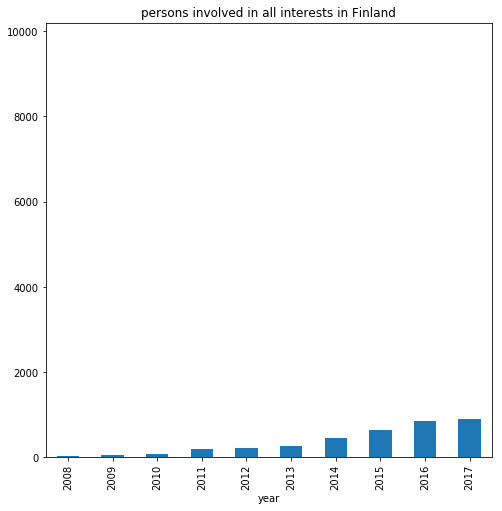

In [617]:

df_complete_persons["Finland"].plot(kind='bar', figsize =(8,8)).set_ylim([0,10200])
plt.title("ersons involved in all interests in " + "Finland")
plt.savefig("Finland" + ".pdf")



In [ ]:
fig, axes = plt.subplots(8, 11, figsize=(20, 12), sharex=True, sharey=True)



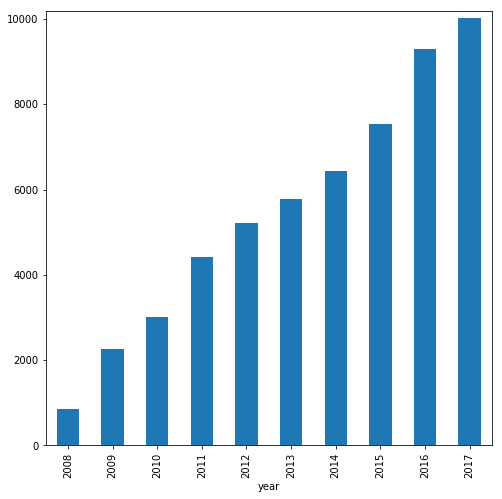

In [44]:
for i in range(len(countries)):
  #  plt.figure()
    df_complete_persons[countries[i]].plot(kind='bar', figsize =(8,8)).set_ylim([0,10200])



/Users/ioannisantypas/Desktop/data-studios/Data_projects/data_project_2/Code/test


In [57]:
with PdfPages('multipage_pdf.pdf') as pdf:
    for i in countries:
        plt.figure()
        df_complete_persons[i].plot(kind='bar', figsize =(8,8)).set_ylim([0,10200])
        plt.title("Persons involved in all interest fields in " + i)
        pdf.savefig()


        plt.close()



In [84]:
df_complete_persons.to_csv("persons_all_interest_all_countries.csv")




In [73]:
# # def plot(i):
# #     df_complete_persons[i].plot(kind='bar', figsize =(8,8)).set_ylim([0,10200])
# #     plt.title("persons involved in " + i)
# #     plt.savefig(i + ".pdf")
# #     print("worked on " + i)
    
# # df_complete_persons.apply(plot, axis=0)



# for i in range(len(countries)):
#   #  plt.figure()
#     df_complete_persons[countries[i]].plot(kind='bar', figsize =(8,8)).set_ylim([0,10200])
#     plt.title("persons involved in " + df_complete_persons[countries[i]])
#     plt.savefig(df_complete_persons[countries[i]] + ".pdf")
#     print("worked on " + df_complete_persons[countries[i]])


# Calculate number of entities involved in df_complete

In [58]:
df_complete['number'] = 1

In [59]:
df_complete.head()

,Identification number:,Registration date:,Section,Subsection,(Organisation) name,Legal status:,Website address:,Head office country,Head office address,Head office city,Head office post code,Head office post box,Head office phone,Belgium office address,Belgium office city,Belgium office post code,Belgium office post box,Belgium office phone,Person with legal responsibility,Position:,Person in charge of EU relations,Position:.1,Goals / remit,Level of interest,EU initiatives,Relevant communication,High-level groups,Consultative committees,Expert groups,Inter groups,Industry forums,Number of persons involved:,Full time equivalent (FTE),Number of EP accredited persons,Persons accredited for access to European Parliament premises,Fields of interest,Membership,Member organisations,Financial year: Start Date,Financial year: End Date,Estimate of costs (absolute amount),Estimate of costs (as a range),Turnover (absolute amount),Turnover (as a range),Customers,Procurement:,Source,Grants:,Source.1,date,year,number
0,034724827057-41,05/05/2017,"IV - Think tanks, research and academic instit...",Academic institutions,University of Brighton (UoB),Higher Education Corporation,http://www.brighton.ac.uk,United Kingdom,Mithras House Lewes Road,Brighton,BN2 4AT,NaN,(+44)1273600900,NaN,NaN,NaN,NaN,NaN,Debra Humphris,Vice-Chancellor,Francesca Anderson,European Research Development Manager,The University of Brighton (UoB) is a communit...,regional/local,"Research & Innovation; Education, Training & Y...",NaN,NaN,NaN,NaN,NaN,NaN,1,0.25,NaN,NaN,"Economic and Financial Affairs, Agriculture an...",University Alliance http://www.unialliance.ac....,The University of Brighton is not a membership...,01/08/2015,01/07/2016,20000.0,NaN,1887600.0,NaN,NaN,NaN,NaN,1887600.0,H2020,2017-05-05,2017,1
1,900614526817-59,19/04/2017,III - Non-governmental organisations,"Non-governmental organisations, platforms and ...",Asociatia JUNII (JUNII),Asociatie,http://www.organizatiajunii.eu/,Romania,"Str Borșa, nr. 16, bl. 2J, ap. 1, sc. 1, sector 1",Bucuresti,060042,"bl. 2J, ap. 1",(+40)726519727,NaN,NaN,NaN,NaN,NaN,Mihail Miron,Presedinte,Florin Ciobanu,Presedinte Executiv,Scopul organizatiei il constituie identificare...,"European, national, regional/local",Crearea unui mediu favorabil pentru dezvoltare...,Crearea unui mediu favorabil pentru dezvoltare...,NaN,NaN,NaN,NaN,NaN,9,4.50,NaN,NaN,"Development, Education, Youth, Communication",http://www.organizatiajunii.eu/index.php/colab...,NaN,01/01/2016,01/12/2016,2200.0,NaN,2200.0,NaN,NaN,NaN,NaN,NaN,NaN,2017-04-19,2017,1
2,995798526815-32,20/04/2017,III - Non-governmental organisations,"Non-governmental organisations, platforms and ...",European Network of Living Labs (ENoLL),Non-Profit Association,http://www.openlivinglabs.eu/,Belgium,9 Pleinlaan,Brussels,1050,NaN,(+32)26291613,NaN,NaN,NaN,NaN,NaN,Pieter Ballon,Secretary General,Zsuzsanna Bodi,Association Manager,Description \n \n \nThe European Network of Li...,global,-3Os \n-OSPP \n-OISPG \n-Citizen Driven Innov...,ENoLL also participates in projects to help co...,OSPP- Open Science Policy Platform,NaN,OISPG Group - Open Innovation and Science Poli...,NaN,NaN,6,5.00,NaN,NaN,"Agriculture and Rural Development, Consumer Af...",http://www.openlivinglabs.eu/become_a_member \...,http://www.openlivinglabs.eu/livinglabs,01/01/2015,01/12/2015,508025.0,NaN,525685.0,NaN,NaN,NaN,NaN,389785.0,"H2020,CIP",2017-04-20,2017,1
3,639320826922-11,26/04/2017,II - In-house lobbyists and trade/business/pro...,Trade and business associations,Krajowe Forum Chłodnictwa - Związek Pracodawcó...,związek pracodawców,http://kfch.pl,Poland,Ostrobramska 75C lok. 5.18.2,Warszawa,04-175,NaN,(+48)660538933,NaN,NaN,NaN,NaN,NaN,Robert Grejcz,Prezes Zarządu,Grzegorz Michalski,Wiceprezes Zarządu,Par. 24 Statutu KFCh - dostępny na stronie www...,"European, national","1. Legislacja dotycząca branży chłodnictwa, kl...",NaN,NaN,NaN,NaN,NaN,NaN,6,1.50,NaN,NaN,"Trade, Competition, Consumer Affairs, Customs,...","1. 

In [60]:
df_complete_entities = df_complete.groupby(['year', 'Head office country'])['number'].sum().reset_index()

pd.DataFrame(df_complete_entities)

df_complete_entities = df_complete_entities.pivot_table(index=('year'), columns='Head office country', values='number')


df_complete_entities.replace('NaN', np.nan, inplace=True)
df_complete_entities.replace(np.nan, 0,  inplace=True)

Calculate cummulative tables of entities

In [61]:
df_complete_entities.loc['2009'] = df_complete_entities.loc['2009'] + df_complete_entities.loc['2008']   
df_complete_entities.loc['2010'] = df_complete_entities.loc['2010'] + df_complete_entities.loc['2009']   
df_complete_entities.loc['2011'] = df_complete_entities.loc['2011'] + df_complete_entities.loc['2010']
df_complete_entities.loc['2012'] = df_complete_entities.loc['2012'] + df_complete_entities.loc['2011']
df_complete_entities.loc['2013'] = df_complete_entities.loc['2013'] + df_complete_entities.loc['2012']
df_complete_entities.loc['2014'] = df_complete_entities.loc['2014'] + df_complete_entities.loc['2013']
df_complete_entities.loc['2015'] = df_complete_entities.loc['2015'] + df_complete_entities.loc['2014']
df_complete_entities.loc['2016'] = df_complete_entities.loc['2016'] + df_complete_entities.loc['2015']
df_complete_entities.loc['2017'] = df_complete_entities.loc['2017'] + df_complete_entities.loc['2016']

In [62]:
df_complete_entities.tail()

Head office country,Austria,Belgium,Bulgaria,China,Croatia,Cyprus,Czech Republic,Denmark,Estonia,Finland,France,Germany,Greece,Hungary,Ireland,Italy,Latvia,Lithuania,Luxembourg,Malta,Netherlands,Poland,Portugal,Romania,"Russia, Federation Of",Slovakia,Slovenia,Spain,Sweden,Turkey,United Kingdom,United States
year,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2013,96.0,1035.0,12.0,1.0,8.0,4.0,17.0,58.0,2.0,53.0,373.0,537.0,21.0,23.0,33.0,226.0,5.0,4.0,23.0,4.0,185.0,35.0,30.0,21.0,2.0,2.0,5.0,173.0,54.0,7.0,349.0,97.0
2014,124.0,1235.0,14.0,2.0,13.0,5.0,29.0,76.0,3.0,83.0,470.0,660.0,31.0,26.0,51.0,337.0,6.0,6.0,31.0,7.0,232.0,55.0,52.0,31.0,5.0,5.0,7.0,239.0,81.0,8.0,465.0,132.0
2015,163.0,1545.0,29.0,5.0,29.0,8.0,50.0,112.0,7.0,136.0,671.0,903.0,56.0,43.0,86.0,465.0,20.0,8.0,46.0,14.0,352.0,88.0,92.0,50.0,7.0,16.0,14.0,391.0,126.0,10.0,738.0,238.0
2016,224.0,1904.0,46.0,8.0,48.0,18.0,81.0,160.0,36.0,189.0,914.0,1235.0,101.0,78.0,135.0,684.0,29.0,29.0,61.0,25.0,527.0,165.0,147.0,88.0,12.0,40.0,38.0,574.0,208.0,18.0,1011.0,320.0
2017,240.0,2089.0,59.0,10.0,56.0,26.0,108.0,192.0,54.0,208.0,1059.0,1409.0,138.0,100.0,170.0,856.0,40.0,42.0,73.0,30.0,634.0,223.0,190.0,115.0,16.0,62.0,56.0,716.0,249.0,26.0,1158.0,363.0


In [66]:
with PdfPages('multipage_pdf.pdf') as pdf:
    for i in countries:
        plt.figure()
        df_complete_entities[i].plot(kind='bar', figsize =(8,8)).set_ylim([0,2300])
        plt.title("Total entities from all interest fields in " + i)
        pdf.savefig()
        plt.close()



In [83]:
df_complete_entities.to_csv("entities_all_interest_all_countries.csv")



# Working on finance interest dataset

In [70]:
df_finance.shape

(4052, 49)

# Calculate number of persons in finance

In [75]:
df_finance_persons = df_finance.groupby(['year', 'Head office country'])['Number of persons involved:'].sum().reset_index()

pd.DataFrame(df_finance_persons)

df_finance_persons['Number of persons involved:'] = df_finance_persons['Number of persons involved:'].astype(np.int64)

df_finance_persons = df_finance_persons.pivot_table(index=('year'), columns='Head office country', values='Number of persons involved:')

df_finance_persons.replace('NaN', np.nan, inplace=True)
df_finance_persons.replace(np.nan, 0,  inplace=True)

In [76]:
df_finance_persons.loc['2009'] = df_finance_persons.loc['2009'] + df_finance_persons.loc['2008']   
df_finance_persons.loc['2010'] = df_finance_persons.loc['2010'] + df_finance_persons.loc['2009']   
df_finance_persons.loc['2011'] = df_finance_persons.loc['2011'] + df_finance_persons.loc['2010']
df_finance_persons.loc['2012'] = df_finance_persons.loc['2012'] + df_finance_persons.loc['2011']
df_finance_persons.loc['2013'] = df_finance_persons.loc['2013'] + df_finance_persons.loc['2012']
df_finance_persons.loc['2014'] = df_finance_persons.loc['2014'] + df_finance_persons.loc['2013']
df_finance_persons.loc['2015'] = df_finance_persons.loc['2015'] + df_finance_persons.loc['2014']
df_finance_persons.loc['2016'] = df_finance_persons.loc['2016'] + df_finance_persons.loc['2015']
df_finance_persons.loc['2017'] = df_finance_persons.loc['2017'] + df_finance_persons.loc['2016']

In [89]:
df_finance_persons.tail()

Head office country,Austria,Belgium,Bulgaria,China,Croatia,Cyprus,Czech Republic,Denmark,Estonia,Finland,France,Germany,Greece,Hungary,Ireland,Italy,Latvia,Lithuania,Luxembourg,Malta,Netherlands,Poland,Portugal,Romania,"Russia, Federation Of",Slovakia,Slovenia,Spain,Sweden,Turkey,United Kingdom,United States
year,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2013,561.0,3447.0,57.0,0.0,51.0,14.0,27.0,127.0,0.0,183.0,745.0,1794.0,135.0,197.0,66.0,1018.0,1.0,226.0,152.0,3.0,355.0,77.0,101.0,126.0,2.0,0.0,0.0,4847.0,218.0,13.0,1123.0,358.0
2014,578.0,3688.0,57.0,2.0,52.0,14.0,44.0,133.0,0.0,204.0,1025.0,1926.0,155.0,199.0,114.0,1764.0,1.0,236.0,164.0,4.0,377.0,109.0,291.0,339.0,19.0,5.0,2.0,4992.0,255.0,14.0,1264.0,416.0
2015,621.0,4074.0,106.0,7.0,70.0,21.0,56.0,179.0,1.0,259.0,1266.0,2176.0,301.0,205.0,181.0,1994.0,30.0,241.0,189.0,8.0,622.0,181.0,409.0,456.0,21.0,21.0,6.0,5308.0,324.0,14.0,1905.0,606.0
2016,681.0,4673.0,142.0,11.0,95.0,35.0,85.0,209.0,12.0,333.0,1517.0,2706.0,379.0,276.0,259.0,2412.0,38.0,258.0,216.0,15.0,894.0,342.0,598.0,485.0,22.0,34.0,20.0,5565.0,425.0,34.0,2285.0,701.0
2017,736.0,4894.0,189.0,11.0,107.0,67.0,124.0,250.0,16.0,375.0,1829.0,2905.0,497.0,317.0,292.0,2765.0,58.0,273.0,232.0,29.0,977.0,441.0,677.0,527.0,23.0,76.0,41.0,5889.0,472.0,52.0,3258.0,791.0


In [78]:
with PdfPages('multipage_pdf.pdf') as pdf:
    for i in countries:
        plt.figure()
        df_finance_persons[i].plot(kind='bar', figsize =(8,8)).set_ylim([0,5000])
        plt.title("Persons involved in all interest fields in " + i)
        pdf.savefig()
        plt.close()




In [82]:

df_finance_persons.to_csv("finance_persons.csv")



# Calculate number of entities in finance

In [74]:
df_finance['number'] = 1

In [86]:
df_finance_entities = df_finance.groupby(['year', 'Head office country'])['number'].sum().reset_index()

pd.DataFrame(df_finance_entities)

df_finance_entities = df_finance_entities.pivot_table(index=('year'), columns='Head office country', values='number')


df_finance_entities.replace('NaN', np.nan, inplace=True)
df_finance_entities.replace(np.nan, 0,  inplace=True)

In [87]:
df_finance_entities.loc['2009'] = df_finance_entities.loc['2009'] + df_finance_entities.loc['2008']   
df_finance_entities.loc['2010'] = df_finance_entities.loc['2010'] + df_finance_entities.loc['2009']   
df_finance_entities.loc['2011'] = df_finance_entities.loc['2011'] + df_finance_entities.loc['2010']
df_finance_entities.loc['2012'] = df_finance_entities.loc['2012'] + df_finance_entities.loc['2011']
df_finance_entities.loc['2013'] = df_finance_entities.loc['2013'] + df_finance_entities.loc['2012']
df_finance_entities.loc['2014'] = df_finance_entities.loc['2014'] + df_finance_entities.loc['2013']
df_finance_entities.loc['2015'] = df_finance_entities.loc['2015'] + df_finance_entities.loc['2014']
df_finance_entities.loc['2016'] = df_finance_entities.loc['2016'] + df_finance_entities.loc['2015']
df_finance_entities.loc['2017'] = df_finance_entities.loc['2017'] + df_finance_entities.loc['2016']

In [90]:
df_finance_entities.tail()

Head office country,Austria,Belgium,Bulgaria,China,Croatia,Cyprus,Czech Republic,Denmark,Estonia,Finland,France,Germany,Greece,Hungary,Ireland,Italy,Latvia,Lithuania,Luxembourg,Malta,Netherlands,Poland,Portugal,Romania,"Russia, Federation Of",Slovakia,Slovenia,Spain,Sweden,Turkey,United Kingdom,United States
year,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2013,45.0,458.0,4.0,0.0,6.0,3.0,9.0,22.0,0.0,25.0,181.0,297.0,7.0,10.0,16.0,79.0,1.0,1.0,13.0,2.0,65.0,20.0,14.0,12.0,1.0,0.0,0.0,61.0,24.0,4.0,169.0,46.0
2014,52.0,522.0,4.0,1.0,7.0,3.0,11.0,25.0,0.0,32.0,213.0,337.0,11.0,11.0,26.0,119.0,1.0,2.0,17.0,3.0,78.0,26.0,23.0,16.0,4.0,1.0,1.0,85.0,34.0,5.0,213.0,62.0
2015,63.0,630.0,10.0,3.0,15.0,4.0,14.0,35.0,1.0,46.0,276.0,416.0,23.0,14.0,40.0,166.0,5.0,3.0,27.0,4.0,120.0,39.0,42.0,27.0,5.0,5.0,3.0,146.0,46.0,5.0,330.0,103.0
2016,77.0,735.0,14.0,4.0,22.0,6.0,23.0,46.0,7.0,62.0,351.0,538.0,38.0,23.0,54.0,258.0,7.0,10.0,34.0,7.0,185.0,72.0,64.0,37.0,6.0,10.0,9.0,211.0,68.0,7.0,408.0,136.0
2017,87.0,791.0,18.0,4.0,25.0,13.0,33.0,58.0,11.0,66.0,405.0,589.0,52.0,31.0,66.0,308.0,12.0,16.0,38.0,11.0,211.0,93.0,76.0,44.0,7.0,18.0,15.0,260.0,78.0,12.0,452.0,152.0


In [94]:
with PdfPages('multipage_pdf.pdf') as pdf:
    for i in countries:
        plt.figure()
        df_finance_entities[i].plot(kind='bar', figsize =(8,8)).set_ylim([0,800])
        plt.title("Total entities from finance related interest fields in " + i)
        pdf.savefig()


        plt.close()
df_finance_entities.to_csv("entities_finance_interests.csv")




SyntaxError: invalid syntax (<ipython-input-94-0b858b30a7c2>, line 10)

In [85]:
df_finance_entities.tail()

NameError: name 'df_finance_entities' is not defined

# Examination of sections

# Part 1a sections as a whole - total entities

In [96]:
df_complete.head()

,Registration date:,Section,Head office country,Fields of interest,Number of persons involved:,date,year,number
0,05/05/2017,"IV - Think tanks, research and academic instit...",United Kingdom,"Economic and Financial Affairs, Agriculture an...",1,2017-05-05,2017,1
1,19/04/2017,III - Non-governmental organisations,Romania,"Development, Education, Youth, Communication",9,2017-04-19,2017,1
2,20/04/2017,III - Non-governmental organisations,Belgium,"Agriculture and Rural Development, Consumer Af...",6,2017-04-20,2017,1
3,26/04/2017,II - In-house lobbyists and trade/business/pro...,Poland,"Trade, Competition, Consumer Affairs, Customs,...",6,2017-04-26,2017,1
4,21/04/2017,I - Professional consultancies/law firms/self-...,Spain,"General and Institutional Affairs, Economic an...",1,2017-04-21,2017,1


In [99]:
df_sections_entities = df_complete.groupby(['year', 'Section'])['number'].sum().reset_index()

pd.DataFrame(df_sections_entities)

df_sections_entities = df_sections_entities.pivot_table(index=('year'), columns='Section', values='number')


df_sections_entities.replace('NaN', np.nan, inplace=True)
df_sections_entities.replace(np.nan, 0,  inplace=True)

In [100]:
df_sections_entities.loc['2009'] = df_sections_entities.loc['2009'] + df_sections_entities.loc['2008']   
df_sections_entities.loc['2010'] = df_sections_entities.loc['2010'] + df_sections_entities.loc['2009']   
df_sections_entities.loc['2011'] = df_sections_entities.loc['2011'] + df_sections_entities.loc['2010']
df_sections_entities.loc['2012'] = df_sections_entities.loc['2012'] + df_sections_entities.loc['2011']
df_sections_entities.loc['2013'] = df_sections_entities.loc['2013'] + df_sections_entities.loc['2012']
df_sections_entities.loc['2014'] = df_sections_entities.loc['2014'] + df_sections_entities.loc['2013']
df_sections_entities.loc['2015'] = df_sections_entities.loc['2015'] + df_sections_entities.loc['2014']
df_sections_entities.loc['2016'] = df_sections_entities.loc['2016'] + df_sections_entities.loc['2015']
df_sections_entities.loc['2017'] = df_sections_entities.loc['2017'] + df_sections_entities.loc['2016']

In [101]:
df_sections_entities.tail()

Section,I - Professional consultancies/law firms/self-employed consultants,II - In-house lobbyists and trade/business/professional associations,III - Non-governmental organisations,"IV - Think tanks, research and academic institutions",V - Organisations representing churches and religious communities,"VI - Organisations representing local, regional and municipal authorities, other public or mixed entities, etc."
year,,,,,,
2013,305.0,1969.0,874.0,194.0,22.0,131.0
2014,441.0,2453.0,1151.0,262.0,26.0,188.0
2015,683.0,3469.0,1624.0,427.0,32.0,283.0
2016,1040.0,4660.0,2323.0,657.0,42.0,431.0
2017,1280.0,5336.0,2783.0,813.0,47.0,508.0


In [368]:
sections = [i for i in df_complete['Section'].value_counts().index]
sections

['II - In-house lobbyists and trade/business/professional associations',
 'III - Non-governmental organisations',
 'I - Professional consultancies/law firms/self-employed consultants',
 'IV - Think tanks, research and academic institutions',
 'VI - Organisations representing local, regional and municipal authorities, other public or mixed entities, etc.',
 'V - Organisations representing churches and religious communities']

In [103]:
with PdfPages('Section_total_entities_all_EU_member_states.pdf') as pdf:
    for i in sections:
        plt.figure()
        df_sections_entities[i].plot(kind='bar', figsize =(8,8)).set_ylim([0,5500])
        plt.title("Total entities EU wide - " + i)
        pdf.savefig()


        plt.close()
df_sections_entities.to_csv("Section_total_entities_all_EU_member_states.csv")





In [104]:
df_sections_entities.tail()

Section,I - Professional consultancies/law firms/self-employed consultants,II - In-house lobbyists and trade/business/professional associations,III - Non-governmental organisations,"IV - Think tanks, research and academic institutions",V - Organisations representing churches and religious communities,"VI - Organisations representing local, regional and municipal authorities, other public or mixed entities, etc."
year,,,,,,
2013,305.0,1969.0,874.0,194.0,22.0,131.0
2014,441.0,2453.0,1151.0,262.0,26.0,188.0
2015,683.0,3469.0,1624.0,427.0,32.0,283.0
2016,1040.0,4660.0,2323.0,657.0,42.0,431.0
2017,1280.0,5336.0,2783.0,813.0,47.0,508.0


# Part 1b sections as a whole - number of persons

In [105]:
df_sections_persons = df_complete.groupby(['year', 'Section'])['Number of persons involved:'].sum().reset_index()

pd.DataFrame(df_sections_persons)

df_sections_persons = df_sections_persons.pivot_table(index=('year'), columns='Section', values='Number of persons involved:')


df_sections_persons.replace('NaN', np.nan, inplace=True)
df_sections_persons.replace(np.nan, 0,  inplace=True)

In [106]:
df_sections_persons.loc['2009'] = df_sections_persons.loc['2009'] + df_sections_persons.loc['2008']   
df_sections_persons.loc['2010'] = df_sections_persons.loc['2010'] + df_sections_persons.loc['2009']   
df_sections_persons.loc['2011'] = df_sections_persons.loc['2011'] + df_sections_persons.loc['2010']
df_sections_persons.loc['2012'] = df_sections_persons.loc['2012'] + df_sections_persons.loc['2011']
df_sections_persons.loc['2013'] = df_sections_persons.loc['2013'] + df_sections_persons.loc['2012']
df_sections_persons.loc['2014'] = df_sections_persons.loc['2014'] + df_sections_persons.loc['2013']
df_sections_persons.loc['2015'] = df_sections_persons.loc['2015'] + df_sections_persons.loc['2014']
df_sections_persons.loc['2016'] = df_sections_persons.loc['2016'] + df_sections_persons.loc['2015']
df_sections_persons.loc['2017'] = df_sections_persons.loc['2017'] + df_sections_persons.loc['2016']

In [109]:
with PdfPages('Sections_persons_EU.pdf') as pdf:
    for i in sections:
        plt.figure()
        df_sections_persons[i].plot(kind='bar', figsize =(8,8)).set_ylim([0,23000])
        plt.title("Total persons EU wide - " + i)
        pdf.savefig()


        plt.close()
df_sections_persons.to_csv("Sections_persons_EU.csv")






In [107]:
df_sections_persons.tail()

Section,I - Professional consultancies/law firms/self-employed consultants,II - In-house lobbyists and trade/business/professional associations,III - Non-governmental organisations,"IV - Think tanks, research and academic institutions",V - Organisations representing churches and religious communities,"VI - Organisations representing local, regional and municipal authorities, other public or mixed entities, etc."
year,,,,,,
2013,1687.0,9098.0,11035.0,2459.0,106.0,1051.0
2014,2161.0,10945.0,13376.0,3155.0,116.0,1946.0
2015,2869.0,14580.0,15782.0,5427.0,143.0,2651.0
2016,3877.0,19154.0,19404.0,7237.0,191.0,3707.0
2017,4741.0,21670.0,22267.0,9015.0,208.0,4427.0


# Part 2a sections per country - number of persons

In [110]:
df_sections_countries = df_complete.groupby(['Head office country', 'Section','year' ]).sum().reset_index()


pd.DataFrame(df_sections_countries)

# df_sections_countries_entities = df_sections_countries_entities.pivot_table(index=('year'), columns='Section', values='Number of persons involved:')


df_sections_countries.replace('NaN', np.nan, inplace=True)
df_sections_countries.replace(np.nan, 0,  inplace=True)

In [158]:
df_sections_countries

,Head office country,Section,year,Number of persons involved:,Full time equivalent (FTE),Number of EP accredited persons,Estimate of costs (absolute amount),Turnover (absolute amount),Procurement:,Grants:,number
0,Austria,I - Professional consultancies/law firms/self-...,2010,1,1.00,0.0,0.0,0.000000e+00,0.0,0.0,1
1,Austria,I - Professional consultancies/law firms/self-...,2011,4,3.50,4.0,0.0,0.000000e+00,0.0,0.0,1
2,Austria,I - Professional consultancies/law firms/self-...,2012,2,1.25,0.0,500.0,5.000000e+02,0.0,0.0,2
3,Austria,I - Professional consultancies/law firms/self-...,2013,2,1.25,0.0,4000.0,1.500000e+04,0.0,0.0,2
4,Austria,I - Professional consultancies/law firms/self-...,2014,3,0.75,0.0,0.0,0.000000e+00,0.0,0.0,2
5,Austria,I - Professional consultancies/law firms/self-...,2015,8,2.75,1.0,20000.0,4.000000e+04,50000.0,0.0,5
6,Austria,I - Professional consultancies/law firms/self-...,2016,14,5.75,0.0,500.0,1.000000e+03,110000.0,98000.0,9
7,Austria,I - Professional consultancies/law firms/self-...,2017,1,1.00,0.0,0.0,0.000000e+00,0.0,0.0,1
8,Austria,II - In-house lobbyists and trade/business/pro...,2008,4,3.25,2.0,0.0,0.000000e+00,0.0,0.0,2
9,Austria,II - In-house lobbyists and trade/business/pro...,2009,35,18.50,5.0,0.0,0.000000e+00,86000303.0,887119.0,9


In [111]:
df_sections_countries.to_csv('countries_entities.csv', encoding='utf-8')

# Austria

In [112]:
df_sections_austria = df_sections_countries[df_sections_countries['Head office country'].str.contains('Austria' )]
df_sections_austria = df_sections_austria.pivot_table(index=('year'), columns='Section', values='Number of persons involved:')
df_sections_austria.replace('NaN', np.nan, inplace=True)
df_sections_austria.replace(np.nan, 0,  inplace=True)

df_sections_austria.loc['2009'] = df_sections_austria.loc['2009'] + df_sections_austria.loc['2008']   
df_sections_austria.loc['2010'] = df_sections_austria.loc['2010'] + df_sections_austria.loc['2009']   
df_sections_austria.loc['2011'] = df_sections_austria.loc['2011'] + df_sections_austria.loc['2010']
df_sections_austria.loc['2012'] = df_sections_austria.loc['2012'] + df_sections_austria.loc['2011']
df_sections_austria.loc['2013'] = df_sections_austria.loc['2013'] + df_sections_austria.loc['2012']
df_sections_austria.loc['2014'] = df_sections_austria.loc['2014'] + df_sections_austria.loc['2013']
df_sections_austria.loc['2015'] = df_sections_austria.loc['2015'] + df_sections_austria.loc['2014']
df_sections_austria.loc['2016'] = df_sections_austria.loc['2016'] + df_sections_austria.loc['2015']
df_sections_austria.loc['2017'] = df_sections_austria.loc['2017'] + df_sections_austria.loc['2016']

df_sections_austria.tail()

Section,I - Professional consultancies/law firms/self-employed consultants,II - In-house lobbyists and trade/business/professional associations,III - Non-governmental organisations,"IV - Think tanks, research and academic institutions",V - Organisations representing churches and religious communities,"VI - Organisations representing local, regional and municipal authorities, other public or mixed entities, etc."
year,,,,,,
2013,9.0,146.0,487.0,5.0,6.0,90.0
2014,12.0,170.0,521.0,7.0,8.0,98.0
2015,20.0,225.0,570.0,11.0,8.0,101.0
2016,34.0,288.0,615.0,219.0,8.0,105.0
2017,35.0,317.0,623.0,245.0,8.0,113.0


In [124]:
with PdfPages('Sections_persons_Austria.pdf') as pdf:
    for i in sections:
        plt.figure()
        df_sections_austria[i].plot(kind='bar', figsize =(8,8)).set_ylim([0,4500])
        plt.title("Total persons Austria - " + i)
        pdf.savefig()


        plt.close()
df_sections_austria.to_csv("Sections_persons_Austria.csv")







In [116]:
df_sections_austria_entities = df_sections_countries[df_sections_countries['Head office country'].str.contains('Austria' )]
df_sections_austria_entities = df_sections_austria_entities.pivot_table(index=('year'), columns='Section', values='number')
df_sections_austria_entities.replace('NaN', np.nan, inplace=True)
df_sections_austria_entities.replace(np.nan, 0,  inplace=True)

df_sections_austria_entities.loc['2009'] = df_sections_austria_entities.loc['2009'] + df_sections_austria_entities.loc['2008']   
df_sections_austria_entities.loc['2010'] = df_sections_austria_entities.loc['2010'] + df_sections_austria_entities.loc['2009']   
df_sections_austria_entities.loc['2011'] = df_sections_austria_entities.loc['2011'] + df_sections_austria_entities.loc['2010']
df_sections_austria_entities.loc['2012'] = df_sections_austria_entities.loc['2012'] + df_sections_austria_entities.loc['2011']
df_sections_austria_entities.loc['2013'] = df_sections_austria_entities.loc['2013'] + df_sections_austria_entities.loc['2012']
df_sections_austria_entities.loc['2014'] = df_sections_austria_entities.loc['2014'] + df_sections_austria_entities.loc['2013']
df_sections_austria_entities.loc['2015'] = df_sections_austria_entities.loc['2015'] + df_sections_austria_entities.loc['2014']
df_sections_austria_entities.loc['2016'] = df_sections_austria_entities.loc['2016'] + df_sections_austria_entities.loc['2015']
df_sections_austria_entities.loc['2017'] = df_sections_austria_entities.loc['2017'] + df_sections_austria_entities.loc['2016']

df_sections_austria_entities.tail()

Section,I - Professional consultancies/law firms/self-employed consultants,II - In-house lobbyists and trade/business/professional associations,III - Non-governmental organisations,"IV - Think tanks, research and academic institutions",V - Organisations representing churches and religious communities,"VI - Organisations representing local, regional and municipal authorities, other public or mixed entities, etc."
year,,,,,,
2013,6.0,46.0,34.0,3.0,3.0,4.0
2014,8.0,58.0,43.0,4.0,4.0,7.0
2015,13.0,77.0,54.0,6.0,4.0,9.0
2016,22.0,97.0,70.0,20.0,4.0,11.0
2017,23.0,106.0,72.0,22.0,4.0,13.0


In [120]:
with PdfPages('Sections_entities_Austria.pdf') as pdf:
    for i in sections:
        plt.figure()
        df_sections_austria_entities[i].plot(kind='bar', figsize =(8,8)).set_ylim([0,1000])
        plt.title("Total entities Austria - " + i)
        pdf.savefig()


        plt.close()
df_sections_austria_entities.to_csv("Sections_entities_Austria.csv")








# Belgium

In [121]:
df_sections_belgium = df_sections_countries[df_sections_countries['Head office country'].str.contains('Belgium' )]
df_sections_belgium = df_sections_belgium.pivot_table(index=('year'), columns='Section', values='Number of persons involved:')
df_sections_belgium.replace('NaN', np.nan, inplace=True)
df_sections_belgium.replace(np.nan, 0,  inplace=True)

df_sections_belgium.loc['2009'] = df_sections_belgium.loc['2009'] + df_sections_belgium.loc['2008']   
df_sections_belgium.loc['2010'] = df_sections_belgium.loc['2010'] + df_sections_belgium.loc['2009']   
df_sections_belgium.loc['2011'] = df_sections_belgium.loc['2011'] + df_sections_belgium.loc['2010']
df_sections_belgium.loc['2012'] = df_sections_belgium.loc['2012'] + df_sections_belgium.loc['2011']
df_sections_belgium.loc['2013'] = df_sections_belgium.loc['2013'] + df_sections_belgium.loc['2012']
df_sections_belgium.loc['2014'] = df_sections_belgium.loc['2014'] + df_sections_belgium.loc['2013']
df_sections_belgium.loc['2015'] = df_sections_belgium.loc['2015'] + df_sections_belgium.loc['2014']
df_sections_belgium.loc['2016'] = df_sections_belgium.loc['2016'] + df_sections_belgium.loc['2015']
df_sections_belgium.loc['2017'] = df_sections_belgium.loc['2017'] + df_sections_belgium.loc['2016']

df_sections_belgium.tail()

Section,I - Professional consultancies/law firms/self-employed consultants,II - In-house lobbyists and trade/business/professional associations,III - Non-governmental organisations,"IV - Think tanks, research and academic institutions",V - Organisations representing churches and religious communities,"VI - Organisations representing local, regional and municipal authorities, other public or mixed entities, etc."
year,,,,,,
2013,670.0,2690.0,1868.0,380.0,52.0,127.0
2014,775.0,2887.0,2104.0,412.0,56.0,212.0
2015,925.0,3206.0,2550.0,522.0,59.0,284.0
2016,1062.0,4085.0,3057.0,655.0,75.0,373.0
2017,1177.0,4283.0,3338.0,752.0,89.0,388.0


In [126]:
with PdfPages('Sections_persons_Belgium.pdf') as pdf:
    for i in sections:
        plt.figure()
        df_sections_belgium[i].plot(kind='bar', figsize =(8,8)).set_ylim([0,4500])
        plt.title("Total persons Belgium - " + i)
        pdf.savefig()


        plt.close()
df_sections_belgium.to_csv("Sections_persons_Belgium.csv")








In [125]:
df_sections_belgium_entities = df_sections_countries[df_sections_countries['Head office country'].str.contains('Belgium' )]
df_sections_belgium_entities = df_sections_belgium_entities.pivot_table(index=('year'), columns='Section', values='number')
df_sections_belgium_entities.replace('NaN', np.nan, inplace=True)
df_sections_belgium_entities.replace(np.nan, 0,  inplace=True)

df_sections_belgium_entities.loc['2009'] = df_sections_belgium_entities.loc['2009'] + df_sections_belgium_entities.loc['2008']   
df_sections_belgium_entities.loc['2010'] = df_sections_belgium_entities.loc['2010'] + df_sections_belgium_entities.loc['2009']   
df_sections_belgium_entities.loc['2011'] = df_sections_belgium_entities.loc['2011'] + df_sections_belgium_entities.loc['2010']
df_sections_belgium_entities.loc['2012'] = df_sections_belgium_entities.loc['2012'] + df_sections_belgium_entities.loc['2011']
df_sections_belgium_entities.loc['2013'] = df_sections_belgium_entities.loc['2013'] + df_sections_belgium_entities.loc['2012']
df_sections_belgium_entities.loc['2014'] = df_sections_belgium_entities.loc['2014'] + df_sections_belgium_entities.loc['2013']
df_sections_belgium_entities.loc['2015'] = df_sections_belgium_entities.loc['2015'] + df_sections_belgium_entities.loc['2014']
df_sections_belgium_entities.loc['2016'] = df_sections_belgium_entities.loc['2016'] + df_sections_belgium_entities.loc['2015']
df_sections_belgium_entities.loc['2017'] = df_sections_belgium_entities.loc['2017'] + df_sections_belgium_entities.loc['2016']

df_sections_belgium_entities.tail()

Section,I - Professional consultancies/law firms/self-employed consultants,II - In-house lobbyists and trade/business/professional associations,III - Non-governmental organisations,"IV - Think tanks, research and academic institutions",V - Organisations representing churches and religious communities,"VI - Organisations representing local, regional and municipal authorities, other public or mixed entities, etc."
year,,,,,,
2013,110.0,559.0,295.0,35.0,13.0,23.0
2014,146.0,633.0,363.0,46.0,14.0,33.0
2015,204.0,753.0,460.0,65.0,16.0,47.0
2016,268.0,861.0,598.0,85.0,21.0,71.0
2017,299.0,924.0,661.0,104.0,25.0,76.0


In [136]:
with PdfPages('Sections_entities_Belgium.pdf') as pdf:
    for i in sections:
        plt.figure()
        df_sections_belgium_entities[i].plot(kind='bar', figsize =(8,8)).set_ylim([0,1000])
        plt.title("Total entities Belgium - " + i)
        pdf.savefig()


        plt.close()
df_sections_belgium_entities.to_csv("Sections_entities_Belgium.csv")









# Germany

In [128]:
df_sections_germany = df_sections_countries[df_sections_countries['Head office country'].str.contains('Germany')]
df_sections_germany = df_sections_germany.pivot_table(index=('year'), columns='Section', values='Number of persons involved:')
df_sections_germany.replace('NaN', np.nan, inplace=True)
df_sections_germany.replace(np.nan, 0,  inplace=True)

df_sections_germany.loc['2009'] = df_sections_germany.loc['2009'] + df_sections_germany.loc['2008']   
df_sections_germany.loc['2010'] = df_sections_germany.loc['2010'] + df_sections_germany.loc['2009']   
df_sections_germany.loc['2011'] = df_sections_germany.loc['2011'] + df_sections_germany.loc['2010']
df_sections_germany.loc['2012'] = df_sections_germany.loc['2012'] + df_sections_germany.loc['2011']
df_sections_germany.loc['2013'] = df_sections_germany.loc['2013'] + df_sections_germany.loc['2012']
df_sections_germany.loc['2014'] = df_sections_germany.loc['2014'] + df_sections_germany.loc['2013']
df_sections_germany.loc['2015'] = df_sections_germany.loc['2015'] + df_sections_germany.loc['2014']
df_sections_germany.loc['2016'] = df_sections_germany.loc['2016'] + df_sections_germany.loc['2015']
df_sections_germany.loc['2017'] = df_sections_germany.loc['2017'] + df_sections_germany.loc['2016']

df_sections_germany.tail()

Section,I - Professional consultancies/law firms/self-employed consultants,II - In-house lobbyists and trade/business/professional associations,III - Non-governmental organisations,"IV - Think tanks, research and academic institutions",V - Organisations representing churches and religious communities,"VI - Organisations representing local, regional and municipal authorities, other public or mixed entities, etc."
year,,,,,,
2013,75.0,1628.0,654.0,190.0,5.0,162.0
2014,113.0,1881.0,732.0,238.0,9.0,207.0
2015,166.0,2200.0,990.0,363.0,10.0,232.0
2016,291.0,2779.0,1395.0,473.0,11.0,299.0
2017,436.0,2965.0,1764.0,560.0,11.0,528.0


In [129]:
with PdfPages('Sections_persons_Germany.pdf') as pdf:
    for i in sections:
        plt.figure()
        df_sections_germany[i].plot(kind='bar', figsize =(8,8)).set_ylim([0,4500])
        plt.title("Total persons Germany - " + i)
        pdf.savefig()


        plt.close()
df_sections_germany.to_csv("Sections_persons_Germany.csv")









In [130]:
df_sections_germany_entities = df_sections_countries[df_sections_countries['Head office country'].str.contains('Germany')]
df_sections_germany_entities = df_sections_germany_entities.pivot_table(index=('year'), columns='Section', values='number')
df_sections_germany_entities.replace('NaN', np.nan, inplace=True)
df_sections_germany_entities.replace(np.nan, 0,  inplace=True)

df_sections_germany_entities.loc['2009'] = df_sections_germany_entities.loc['2009'] + df_sections_germany_entities.loc['2008']   
df_sections_germany_entities.loc['2010'] = df_sections_germany_entities.loc['2010'] + df_sections_germany_entities.loc['2009']   
df_sections_germany_entities.loc['2011'] = df_sections_germany_entities.loc['2011'] + df_sections_germany_entities.loc['2010']
df_sections_germany_entities.loc['2012'] = df_sections_germany_entities.loc['2012'] + df_sections_germany_entities.loc['2011']
df_sections_germany_entities.loc['2013'] = df_sections_germany_entities.loc['2013'] + df_sections_germany_entities.loc['2012']
df_sections_germany_entities.loc['2014'] = df_sections_germany_entities.loc['2014'] + df_sections_germany_entities.loc['2013']
df_sections_germany_entities.loc['2015'] = df_sections_germany_entities.loc['2015'] + df_sections_germany_entities.loc['2014']
df_sections_germany_entities.loc['2016'] = df_sections_germany_entities.loc['2016'] + df_sections_germany_entities.loc['2015']
df_sections_germany_entities.loc['2017'] = df_sections_germany_entities.loc['2017'] + df_sections_germany_entities.loc['2016']

df_sections_germany_entities.tail()

Section,I - Professional consultancies/law firms/self-employed consultants,II - In-house lobbyists and trade/business/professional associations,III - Non-governmental organisations,"IV - Think tanks, research and academic institutions",V - Organisations representing churches and religious communities,"VI - Organisations representing local, regional and municipal authorities, other public or mixed entities, etc."
year,,,,,,
2013,28.0,336.0,121.0,29.0,2.0,21.0
2014,40.0,399.0,149.0,40.0,4.0,28.0
2015,61.0,534.0,205.0,62.0,5.0,36.0
2016,100.0,713.0,279.0,87.0,6.0,50.0
2017,126.0,788.0,328.0,103.0,6.0,58.0


In [131]:
with PdfPages('Sections_entities_Germany.pdf') as pdf:
    for i in sections:
        plt.figure()
        df_sections_germany_entities[i].plot(kind='bar', figsize =(8,8)).set_ylim([0,1000])
        plt.title("Total entities Germany - " + i)
        pdf.savefig()


        plt.close()
df_sections_germany_entities.to_csv("Sections_entities_Germany.csv")










# United Kingdom

In [132]:
df_sections_UK = df_sections_countries[df_sections_countries['Head office country'].str.contains('United Kingdom')]
df_sections_UK = df_sections_UK.pivot_table(index=('year'), columns='Section', values='Number of persons involved:')
df_sections_UK.replace('NaN', np.nan, inplace=True)
df_sections_UK.replace(np.nan, 0,  inplace=True)

df_sections_UK.loc['2009'] = df_sections_UK.loc['2009'] + df_sections_UK.loc['2008']   
df_sections_UK.loc['2010'] = df_sections_UK.loc['2010'] + df_sections_UK.loc['2009']   
df_sections_UK.loc['2011'] = df_sections_UK.loc['2011'] + df_sections_UK.loc['2010']
df_sections_UK.loc['2012'] = df_sections_UK.loc['2012'] + df_sections_UK.loc['2011']
df_sections_UK.loc['2013'] = df_sections_UK.loc['2013'] + df_sections_UK.loc['2012']
df_sections_UK.loc['2014'] = df_sections_UK.loc['2014'] + df_sections_UK.loc['2013']
df_sections_UK.loc['2015'] = df_sections_UK.loc['2015'] + df_sections_UK.loc['2014']
df_sections_UK.loc['2016'] = df_sections_UK.loc['2016'] + df_sections_UK.loc['2015']
df_sections_UK.loc['2017'] = df_sections_UK.loc['2017'] + df_sections_UK.loc['2016']

df_sections_UK.tail()

Section,I - Professional consultancies/law firms/self-employed consultants,II - In-house lobbyists and trade/business/professional associations,III - Non-governmental organisations,"IV - Think tanks, research and academic institutions",V - Organisations representing churches and religious communities,"VI - Organisations representing local, regional and municipal authorities, other public or mixed entities, etc."
year,,,,,,
2013,393.0,973.0,429.0,107.0,1.0,70.0
2014,454.0,1164.0,504.0,133.0,1.0,78.0
2015,534.0,1569.0,851.0,507.0,17.0,103.0
2016,617.0,2010.0,1213.0,699.0,23.0,157.0
2017,872.0,2182.0,1330.0,1394.0,26.0,173.0


In [133]:
with PdfPages('Sections_persons_UK.pdf') as pdf:
    for i in sections:
        plt.figure()
        df_sections_UK[i].plot(kind='bar', figsize =(8,8)).set_ylim([0,4500])
        plt.title("Total persons UK - " + i)
        pdf.savefig()


        plt.close()
df_sections_UK.to_csv("Sections_persons_UK.csv")









In [134]:
df_sections_UK_entities = df_sections_countries[df_sections_countries['Head office country'].str.contains('United Kingdom')]
df_sections_UK_entities = df_sections_UK_entities.pivot_table(index=('year'), columns='Section', values='number')
df_sections_UK_entities.replace('NaN', np.nan, inplace=True)
df_sections_UK_entities.replace(np.nan, 0,  inplace=True)

df_sections_UK_entities.loc['2009'] = df_sections_UK_entities.loc['2009'] + df_sections_UK_entities.loc['2008']   
df_sections_UK_entities.loc['2010'] = df_sections_UK_entities.loc['2010'] + df_sections_UK_entities.loc['2009']   
df_sections_UK_entities.loc['2011'] = df_sections_UK_entities.loc['2011'] + df_sections_UK_entities.loc['2010']
df_sections_UK_entities.loc['2012'] = df_sections_UK_entities.loc['2012'] + df_sections_UK_entities.loc['2011']
df_sections_UK_entities.loc['2013'] = df_sections_UK_entities.loc['2013'] + df_sections_UK_entities.loc['2012']
df_sections_UK_entities.loc['2014'] = df_sections_UK_entities.loc['2014'] + df_sections_UK_entities.loc['2013']
df_sections_UK_entities.loc['2015'] = df_sections_UK_entities.loc['2015'] + df_sections_UK_entities.loc['2014']
df_sections_UK_entities.loc['2016'] = df_sections_UK_entities.loc['2016'] + df_sections_UK_entities.loc['2015']
df_sections_UK_entities.loc['2017'] = df_sections_UK_entities.loc['2017'] + df_sections_UK_entities.loc['2016']

df_sections_UK_entities.tail()

Section,I - Professional consultancies/law firms/self-employed consultants,II - In-house lobbyists and trade/business/professional associations,III - Non-governmental organisations,"IV - Think tanks, research and academic institutions",V - Organisations representing churches and religious communities,"VI - Organisations representing local, regional and municipal authorities, other public or mixed entities, etc."
year,,,,,,
2013,46.0,215.0,65.0,13.0,1.0,9.0
2014,64.0,275.0,95.0,19.0,1.0,11.0
2015,99.0,411.0,162.0,46.0,2.0,18.0
2016,138.0,538.0,236.0,71.0,3.0,25.0
2017,168.0,607.0,267.0,83.0,4.0,29.0


In [135]:
with PdfPages('Sections_entities_UK.pdf') as pdf:
    for i in sections:
        plt.figure()
        df_sections_UK_entities[i].plot(kind='bar', figsize =(8,8)).set_ylim([0,1000])
        plt.title("Total entities UK - " + i)
        pdf.savefig()


        plt.close()
df_sections_UK_entities.to_csv("Sections_entities_UK.csv")










# France

In [137]:
df_sections_France = df_sections_countries[df_sections_countries['Head office country'].str.contains('France')]
df_sections_France = df_sections_France.pivot_table(index=('year'), columns='Section', values='Number of persons involved:')
df_sections_France.replace('NaN', np.nan, inplace=True)
df_sections_France.replace(np.nan, 0,  inplace=True)

df_sections_France.loc['2009'] = df_sections_France.loc['2009'] + df_sections_France.loc['2008']   
df_sections_France.loc['2010'] = df_sections_France.loc['2010'] + df_sections_France.loc['2009']   
df_sections_France.loc['2011'] = df_sections_France.loc['2011'] + df_sections_France.loc['2010']
df_sections_France.loc['2012'] = df_sections_France.loc['2012'] + df_sections_France.loc['2011']
df_sections_France.loc['2013'] = df_sections_France.loc['2013'] + df_sections_France.loc['2012']
df_sections_France.loc['2014'] = df_sections_France.loc['2014'] + df_sections_France.loc['2013']
df_sections_France.loc['2015'] = df_sections_France.loc['2015'] + df_sections_France.loc['2014']
df_sections_France.loc['2016'] = df_sections_France.loc['2016'] + df_sections_France.loc['2015']
df_sections_France.loc['2017'] = df_sections_France.loc['2017'] + df_sections_France.loc['2016']

df_sections_France.tail()

Section,I - Professional consultancies/law firms/self-employed consultants,II - In-house lobbyists and trade/business/professional associations,III - Non-governmental organisations,"IV - Think tanks, research and academic institutions",V - Organisations representing churches and religious communities,"VI - Organisations representing local, regional and municipal authorities, other public or mixed entities, etc."
year,,,,,,
2013,93.0,818.0,282.0,255.0,2.0,162.0
2014,119.0,965.0,795.0,334.0,2.0,172.0
2015,176.0,1320.0,917.0,437.0,2.0,257.0
2016,253.0,1736.0,1200.0,603.0,2.0,399.0
2017,302.0,2022.0,1509.0,625.0,2.0,429.0


In [138]:
with PdfPages('Sections_persons_France.pdf') as pdf:
    for i in sections:
        plt.figure()
        df_sections_France[i].plot(kind='bar', figsize =(8,8)).set_ylim([0,4500])
        plt.title("Total persons France - " + i)
        pdf.savefig()


        plt.close()
df_sections_France.to_csv("Sections_persons_France.csv")









In [139]:
df_sections_France_entities = df_sections_countries[df_sections_countries['Head office country'].str.contains('France')]
df_sections_France_entities = df_sections_France_entities.pivot_table(index=('year'), columns='Section', values='number')
df_sections_France_entities.replace('NaN', np.nan, inplace=True)
df_sections_France_entities.replace(np.nan, 0,  inplace=True)

df_sections_France_entities.loc['2009'] = df_sections_France_entities.loc['2009'] + df_sections_France_entities.loc['2008']   
df_sections_France_entities.loc['2010'] = df_sections_France_entities.loc['2010'] + df_sections_France_entities.loc['2009']   
df_sections_France_entities.loc['2011'] = df_sections_France_entities.loc['2011'] + df_sections_France_entities.loc['2010']
df_sections_France_entities.loc['2012'] = df_sections_France_entities.loc['2012'] + df_sections_France_entities.loc['2011']
df_sections_France_entities.loc['2013'] = df_sections_France_entities.loc['2013'] + df_sections_France_entities.loc['2012']
df_sections_France_entities.loc['2014'] = df_sections_France_entities.loc['2014'] + df_sections_France_entities.loc['2013']
df_sections_France_entities.loc['2015'] = df_sections_France_entities.loc['2015'] + df_sections_France_entities.loc['2014']
df_sections_France_entities.loc['2016'] = df_sections_France_entities.loc['2016'] + df_sections_France_entities.loc['2015']
df_sections_France_entities.loc['2017'] = df_sections_France_entities.loc['2017'] + df_sections_France_entities.loc['2016']

df_sections_France_entities.tail()

Section,I - Professional consultancies/law firms/self-employed consultants,II - In-house lobbyists and trade/business/professional associations,III - Non-governmental organisations,"IV - Think tanks, research and academic institutions",V - Organisations representing churches and religious communities,"VI - Organisations representing local, regional and municipal authorities, other public or mixed entities, etc."
year,,,,,,
2013,30.0,228.0,66.0,25.0,2.0,22.0
2014,43.0,280.0,92.0,28.0,2.0,25.0
2015,66.0,391.0,128.0,45.0,2.0,39.0
2016,88.0,524.0,177.0,65.0,2.0,58.0
2017,112.0,595.0,212.0,74.0,2.0,64.0


In [140]:
with PdfPages('Sections_entities_France.pdf') as pdf:
    for i in sections:
        plt.figure()
        df_sections_France_entities[i].plot(kind='bar', figsize =(8,8)).set_ylim([0,1000])
        plt.title("Total entities France - " + i)
        pdf.savefig()


        plt.close()
df_sections_France_entities.to_csv("Sections_entities_France.csv")










# Italy

In [141]:
df_sections_Italy = df_sections_countries[df_sections_countries['Head office country'].str.contains('Italy')]
df_sections_Italy = df_sections_Italy.pivot_table(index=('year'), columns='Section', values='Number of persons involved:')
df_sections_Italy.replace('NaN', np.nan, inplace=True)
df_sections_Italy.replace(np.nan, 0,  inplace=True)

df_sections_Italy.loc['2009'] = df_sections_Italy.loc['2009'] + df_sections_Italy.loc['2008']   
df_sections_Italy.loc['2010'] = df_sections_Italy.loc['2010'] + df_sections_Italy.loc['2009']   
df_sections_Italy.loc['2011'] = df_sections_Italy.loc['2011'] + df_sections_Italy.loc['2010']
df_sections_Italy.loc['2012'] = df_sections_Italy.loc['2012'] + df_sections_Italy.loc['2011']
df_sections_Italy.loc['2013'] = df_sections_Italy.loc['2013'] + df_sections_Italy.loc['2012']
df_sections_Italy.loc['2014'] = df_sections_Italy.loc['2014'] + df_sections_Italy.loc['2013']
df_sections_Italy.loc['2015'] = df_sections_Italy.loc['2015'] + df_sections_Italy.loc['2014']
df_sections_Italy.loc['2016'] = df_sections_Italy.loc['2016'] + df_sections_Italy.loc['2015']
df_sections_Italy.loc['2017'] = df_sections_Italy.loc['2017'] + df_sections_Italy.loc['2016']

df_sections_Italy.tail()

Section,I - Professional consultancies/law firms/self-employed consultants,II - In-house lobbyists and trade/business/professional associations,III - Non-governmental organisations,"IV - Think tanks, research and academic institutions",V - Organisations representing churches and religious communities,"VI - Organisations representing local, regional and municipal authorities, other public or mixed entities, etc."
year,,,,,,
2013,102.0,491.0,1390.0,485.0,40.0,66.0
2014,247.0,736.0,2112.0,591.0,40.0,352.0
2015,319.0,989.0,2265.0,678.0,40.0,464.0
2016,425.0,1511.0,2452.0,942.0,43.0,638.0
2017,520.0,1906.0,2778.0,1024.0,43.0,671.0


In [143]:
with PdfPages('Sections_persons_Italy.pdf') as pdf:
    for i in sections:
        plt.figure()
        df_sections_Italy[i].plot(kind='bar', figsize =(8,8)).set_ylim([0,4500])
        plt.title("Total persons Italy - " + i)
        pdf.savefig()


        plt.close()
df_sections_Italy.to_csv("Sections_persons_Italy.csv")









In [144]:
df_sections_Italy_entities = df_sections_countries[df_sections_countries['Head office country'].str.contains('Italy')]
df_sections_Italy_entities = df_sections_Italy_entities.pivot_table(index=('year'), columns='Section', values='number')
df_sections_Italy_entities.replace('NaN', np.nan, inplace=True)
df_sections_Italy_entities.replace(np.nan, 0,  inplace=True)

df_sections_Italy_entities.loc['2009'] = df_sections_Italy_entities.loc['2009'] + df_sections_Italy_entities.loc['2008']   
df_sections_Italy_entities.loc['2010'] = df_sections_Italy_entities.loc['2010'] + df_sections_Italy_entities.loc['2009']   
df_sections_Italy_entities.loc['2011'] = df_sections_Italy_entities.loc['2011'] + df_sections_Italy_entities.loc['2010']
df_sections_Italy_entities.loc['2012'] = df_sections_Italy_entities.loc['2012'] + df_sections_Italy_entities.loc['2011']
df_sections_Italy_entities.loc['2013'] = df_sections_Italy_entities.loc['2013'] + df_sections_Italy_entities.loc['2012']
df_sections_Italy_entities.loc['2014'] = df_sections_Italy_entities.loc['2014'] + df_sections_Italy_entities.loc['2013']
df_sections_Italy_entities.loc['2015'] = df_sections_Italy_entities.loc['2015'] + df_sections_Italy_entities.loc['2014']
df_sections_Italy_entities.loc['2016'] = df_sections_Italy_entities.loc['2016'] + df_sections_Italy_entities.loc['2015']
df_sections_Italy_entities.loc['2017'] = df_sections_Italy_entities.loc['2017'] + df_sections_Italy_entities.loc['2016']

df_sections_Italy_entities.tail()

Section,I - Professional consultancies/law firms/self-employed consultants,II - In-house lobbyists and trade/business/professional associations,III - Non-governmental organisations,"IV - Think tanks, research and academic institutions",V - Organisations representing churches and religious communities,"VI - Organisations representing local, regional and municipal authorities, other public or mixed entities, etc."
year,,,,,,
2013,29.0,99.0,54.0,31.0,1.0,12.0
2014,53.0,141.0,75.0,46.0,1.0,21.0
2015,78.0,208.0,96.0,57.0,1.0,25.0
2016,118.0,309.0,128.0,84.0,2.0,43.0
2017,157.0,376.0,173.0,99.0,2.0,49.0


In [145]:
with PdfPages('Sections_entities_Italy.pdf') as pdf:
    for i in sections:
        plt.figure()
        df_sections_Italy_entities[i].plot(kind='bar', figsize =(8,8)).set_ylim([0,1000])
        plt.title("Total entities Italy - " + i)
        pdf.savefig()


        plt.close()
df_sections_Italy_entities.to_csv("Sections_entities_Italy.csv")










# Spain

,Head office country,Section,year,Number of persons involved:,Full time equivalent (FTE),Number of EP accredited persons,Estimate of costs (absolute amount),Turnover (absolute amount),Procurement:,Grants:,number
966,United States,"IV - Think tanks, research and academic instit...",2016,7,6.50,0.0,500000.0,518375.0,0.0,93375.0,3
967,United States,"IV - Think tanks, research and academic instit...",2017,5,1.75,0.0,0.0,45100000.0,0.0,0.0,2
968,United States,V - Organisations representing churches and re...,2015,2,1.50,1.0,0.0,8231000.0,0.0,0.0,1
969,United States,"VI - Organisations representing local, regiona...",2015,2,0.50,0.0,0.0,116160000.0,0.0,0.0,1
970,United States,"VI - Organisations representing local, regiona...",2017,1,1.00,0.0,0.0,0.0,0.0,0.0,1


In [170]:
df_sections_Spain = df_sections_countries[df_sections_countries['Head office country'].str.contains('Spain')]
df_sections_Spain = df_sections_Spain.pivot_table(index=('year'), columns='Section', values='Number of persons involved:')
df_sections_Spain.replace('NaN', np.nan, inplace=True)
df_sections_Spain.replace(np.nan, 0,  inplace=True)

df_sections_Spain.loc['2009'] = df_sections_Spain.loc['2009'] + df_sections_Spain.loc['2008']   
df_sections_Spain.loc['2010'] = df_sections_Spain.loc['2010'] + df_sections_Spain.loc['2009']   
df_sections_Spain.loc['2011'] = df_sections_Spain.loc['2011'] + df_sections_Spain.loc['2010']
df_sections_Spain.loc['2012'] = df_sections_Spain.loc['2012'] + df_sections_Spain.loc['2011']
df_sections_Spain.loc['2013'] = df_sections_Spain.loc['2013'] + df_sections_Spain.loc['2012']
df_sections_Spain.loc['2014'] = df_sections_Spain.loc['2014'] + df_sections_Spain.loc['2013']
df_sections_Spain.loc['2015'] = df_sections_Spain.loc['2015'] + df_sections_Spain.loc['2014']
df_sections_Spain.loc['2016'] = df_sections_Spain.loc['2016'] + df_sections_Spain.loc['2015']
df_sections_Spain.loc['2017'] = df_sections_Spain.loc['2017'] + df_sections_Spain.loc['2016']

df_sections_Spain.head()

Section,I - Professional consultancies/law firms/self-employed consultants,II - In-house lobbyists and trade/business/professional associations,III - Non-governmental organisations,"IV - Think tanks, research and academic institutions","VI - Organisations representing local, regional and municipal authorities, other public or mixed entities, etc."
year,,,,,
2008,0.0,36.0,11.0,0.0,0.0
2009,0.0,78.0,16.0,0.0,3.0
2010,0.0,108.0,58.0,100.0,9.0
2011,8.0,159.0,90.0,132.0,13.0
2012,29.0,273.0,173.0,328.0,120.0


In [172]:
df_sections_Spain.tail()

Section,I - Professional consultancies/law firms/self-employed consultants,II - In-house lobbyists and trade/business/professional associations,III - Non-governmental organisations,"IV - Think tanks, research and academic institutions","VI - Organisations representing local, regional and municipal authorities, other public or mixed entities, etc."
year,,,,,
2013,46.0,379.0,4455.0,342.0,130.0
2014,63.0,625.0,4739.0,387.0,165.0
2015,138.0,1212.0,4841.0,526.0,232.0
2016,238.0,1476.0,5100.0,694.0,335.0
2017,268.0,1790.0,5309.0,767.0,458.0


In [333]:
sections1 = []
sections1 = sections
sections


['II - In-house lobbyists and trade/business/professional associations',
 'III - Non-governmental organisations',
 'I - Professional consultancies/law firms/self-employed consultants',
 'IV - Think tanks, research and academic institutions',
 'VI - Organisations representing local, regional and municipal authorities, other public or mixed entities, etc.',
 'V - Organisations representing churches and religious communities']

In [334]:
del sections1[-1]
sections1

['II - In-house lobbyists and trade/business/professional associations',
 'III - Non-governmental organisations',
 'I - Professional consultancies/law firms/self-employed consultants',
 'IV - Think tanks, research and academic institutions',
 'VI - Organisations representing local, regional and municipal authorities, other public or mixed entities, etc.']

In [204]:
with PdfPages('Sections_persons_Spain.pdf') as pdf:
    for i in sections1:
        plt.figure()
        df_sections_Spain[i].plot(kind='bar', figsize =(8,8)).set_ylim([0,4500])
        plt.title("Total persons Spain - " + i)
        pdf.savefig()

        plt.close()
df_sections_Spain.to_csv("Sections_persons_Spain.csv")

In [175]:
df_sections_Spain_entities = df_sections_countries[df_sections_countries['Head office country'].str.contains('Spain')]
df_sections_Spain_entities = df_sections_Spain_entities.pivot_table(index=('year'), columns='Section', values='number')
df_sections_Spain_entities.replace('NaN', np.nan, inplace=True)
df_sections_Spain_entities.replace(np.nan, 0,  inplace=True)

df_sections_Spain_entities.loc['2009'] = df_sections_Spain_entities.loc['2009'] + df_sections_Spain_entities.loc['2008']   
df_sections_Spain_entities.loc['2010'] = df_sections_Spain_entities.loc['2010'] + df_sections_Spain_entities.loc['2009']   
df_sections_Spain_entities.loc['2011'] = df_sections_Spain_entities.loc['2011'] + df_sections_Spain_entities.loc['2010']
df_sections_Spain_entities.loc['2012'] = df_sections_Spain_entities.loc['2012'] + df_sections_Spain_entities.loc['2011']
df_sections_Spain_entities.loc['2013'] = df_sections_Spain_entities.loc['2013'] + df_sections_Spain_entities.loc['2012']
df_sections_Spain_entities.loc['2014'] = df_sections_Spain_entities.loc['2014'] + df_sections_Spain_entities.loc['2013']
df_sections_Spain_entities.loc['2015'] = df_sections_Spain_entities.loc['2015'] + df_sections_Spain_entities.loc['2014']
df_sections_Spain_entities.loc['2016'] = df_sections_Spain_entities.loc['2016'] + df_sections_Spain_entities.loc['2015']
df_sections_Spain_entities.loc['2017'] = df_sections_Spain_entities.loc['2017'] + df_sections_Spain_entities.loc['2016']

df_sections_Spain_entities.tail()

Section,I - Professional consultancies/law firms/self-employed consultants,II - In-house lobbyists and trade/business/professional associations,III - Non-governmental organisations,"IV - Think tanks, research and academic institutions","VI - Organisations representing local, regional and municipal authorities, other public or mixed entities, etc."
year,,,,,
2013,13.0,96.0,36.0,15.0,13.0
2014,20.0,128.0,57.0,18.0,16.0
2015,38.0,218.0,81.0,28.0,26.0
2016,66.0,298.0,120.0,50.0,40.0
2017,80.0,363.0,153.0,69.0,51.0


In [205]:
with PdfPages('Sections_entities_Spain.pdf') as pdf:
    for i in sections1:
        plt.figure()
        df_sections_Spain_entities[i].plot(kind='bar', figsize =(8,8)).set_ylim([0,1000])
        plt.title("Total entities Spain - " + i)
        pdf.savefig()


        plt.close()
df_sections_Spain_entities.to_csv("Sections_entities_Spain.csv")










# Netherlands

In [191]:
df_sections_NL = df_sections_countries[df_sections_countries['Head office country'].str.contains('Netherlands')]
df_sections_NL = df_sections_NL.pivot_table(index=('year'), columns='Section', values='Number of persons involved:')
df_sections_NL.replace('NaN', np.nan, inplace=True)
df_sections_NL.replace(np.nan, 0,  inplace=True)

df_sections_NL.loc['2009'] = df_sections_NL.loc['2009'] + df_sections_NL.loc['2008']   
df_sections_NL.loc['2010'] = df_sections_NL.loc['2010'] + df_sections_NL.loc['2009']   
df_sections_NL.loc['2011'] = df_sections_NL.loc['2011'] + df_sections_NL.loc['2010']
df_sections_NL.loc['2012'] = df_sections_NL.loc['2012'] + df_sections_NL.loc['2011']
df_sections_NL.loc['2013'] = df_sections_NL.loc['2013'] + df_sections_NL.loc['2012']
df_sections_NL.loc['2014'] = df_sections_NL.loc['2014'] + df_sections_NL.loc['2013']
df_sections_NL.loc['2015'] = df_sections_NL.loc['2015'] + df_sections_NL.loc['2014']
df_sections_NL.loc['2016'] = df_sections_NL.loc['2016'] + df_sections_NL.loc['2015']
df_sections_NL.loc['2017'] = df_sections_NL.loc['2017'] + df_sections_NL.loc['2016']

df_sections_NL.tail()

Section,I - Professional consultancies/law firms/self-employed consultants,II - In-house lobbyists and trade/business/professional associations,III - Non-governmental organisations,"IV - Think tanks, research and academic institutions",V - Organisations representing churches and religious communities,"VI - Organisations representing local, regional and municipal authorities, other public or mixed entities, etc."
year,,,,,,
2013,45.0,379.0,277.0,145.0,0.0,27.0
2014,47.0,431.0,397.0,153.0,0.0,30.0
2015,72.0,707.0,551.0,237.0,5.0,67.0
2016,161.0,909.0,761.0,320.0,5.0,111.0
2017,195.0,1028.0,903.0,624.0,5.0,134.0


In [206]:
with PdfPages('Sections_persons_NL.pdf') as pdf:
    for i in sections:
        plt.figure()
        df_sections_NL[i].plot(kind='bar', figsize =(8,8)).set_ylim([0,4500])
        plt.title("Total persons Netherlands - " + i)
        pdf.savefig()


        plt.close()
df_sections_NL.to_csv("Sections_persons_NL.csv")








In [193]:
df_sections_NL_instances = df_sections_countries[df_sections_countries['Head office country'].str.contains('Netherlands')]
df_sections_NL_instances = df_sections_NL_instances.pivot_table(index=('year'), columns='Section', values='number')
df_sections_NL_instances.replace('NaN', np.nan, inplace=True)
df_sections_NL_instances.replace(np.nan, 0,  inplace=True)

df_sections_NL_instances.loc['2009'] = df_sections_NL_instances.loc['2009'] + df_sections_NL_instances.loc['2008']   
df_sections_NL_instances.loc['2010'] = df_sections_NL_instances.loc['2010'] + df_sections_NL_instances.loc['2009']   
df_sections_NL_instances.loc['2011'] = df_sections_NL_instances.loc['2011'] + df_sections_NL_instances.loc['2010']
df_sections_NL_instances.loc['2012'] = df_sections_NL_instances.loc['2012'] + df_sections_NL_instances.loc['2011']
df_sections_NL_instances.loc['2013'] = df_sections_NL_instances.loc['2013'] + df_sections_NL_instances.loc['2012']
df_sections_NL_instances.loc['2014'] = df_sections_NL_instances.loc['2014'] + df_sections_NL_instances.loc['2013']
df_sections_NL_instances.loc['2015'] = df_sections_NL_instances.loc['2015'] + df_sections_NL_instances.loc['2014']
df_sections_NL_instances.loc['2016'] = df_sections_NL_instances.loc['2016'] + df_sections_NL_instances.loc['2015']
df_sections_NL_instances.loc['2017'] = df_sections_NL_instances.loc['2017'] + df_sections_NL_instances.loc['2016']

df_sections_NL_instances.tail()

Section,I - Professional consultancies/law firms/self-employed consultants,II - In-house lobbyists and trade/business/professional associations,III - Non-governmental organisations,"IV - Think tanks, research and academic institutions",V - Organisations representing churches and religious communities,"VI - Organisations representing local, regional and municipal authorities, other public or mixed entities, etc."
year,,,,,,
2013,9.0,91.0,59.0,18.0,0.0,8.0
2014,11.0,110.0,78.0,23.0,0.0,10.0
2015,22.0,168.0,119.0,28.0,1.0,14.0
2016,54.0,239.0,171.0,41.0,1.0,21.0
2017,67.0,279.0,204.0,55.0,1.0,28.0


In [207]:
with PdfPages('Sections_entities_NL.pdf') as pdf:
    for i in sections:
        plt.figure()
        df_sections_NL_instances[i].plot(kind='bar', figsize =(8,8)).set_ylim([0,1000])
        plt.title("Total entities Netherlands - " + i)
        pdf.savefig()


        plt.close()
df_sections_NL_instances.to_csv("Sections_entities_NL.csv")


# USA 

In [196]:
df_sections_USA = df_sections_countries[df_sections_countries['Head office country'].str.contains('United States')]
df_sections_USA = df_sections_USA.pivot_table(index=('year'), columns='Section', values='Number of persons involved:')
df_sections_USA.replace('NaN', np.nan, inplace=True)
df_sections_USA.replace(np.nan, 0,  inplace=True)

df_sections_USA.loc['2009'] = df_sections_USA.loc['2009'] + df_sections_USA.loc['2008']   
df_sections_USA.loc['2010'] = df_sections_USA.loc['2010'] + df_sections_USA.loc['2009']   
df_sections_USA.loc['2011'] = df_sections_USA.loc['2011'] + df_sections_USA.loc['2010']
df_sections_USA.loc['2012'] = df_sections_USA.loc['2012'] + df_sections_USA.loc['2011']
df_sections_USA.loc['2013'] = df_sections_USA.loc['2013'] + df_sections_USA.loc['2012']
df_sections_USA.loc['2014'] = df_sections_USA.loc['2014'] + df_sections_USA.loc['2013']
df_sections_USA.loc['2015'] = df_sections_USA.loc['2015'] + df_sections_USA.loc['2014']
df_sections_USA.loc['2016'] = df_sections_USA.loc['2016'] + df_sections_USA.loc['2015']
df_sections_USA.loc['2017'] = df_sections_USA.loc['2017'] + df_sections_USA.loc['2016']

df_sections_USA.tail()

Section,I - Professional consultancies/law firms/self-employed consultants,II - In-house lobbyists and trade/business/professional associations,III - Non-governmental organisations,"IV - Think tanks, research and academic institutions",V - Organisations representing churches and religious communities,"VI - Organisations representing local, regional and municipal authorities, other public or mixed entities, etc."
year,,,,,,
2013,107.0,348.0,77.0,15.0,0.0,0.0
2014,111.0,439.0,93.0,15.0,0.0,0.0
2015,153.0,716.0,139.0,669.0,2.0,2.0
2016,182.0,860.0,190.0,676.0,2.0,2.0
2017,205.0,974.0,218.0,681.0,2.0,3.0


In [208]:
with PdfPages('Sections_persons_USA.pdf') as pdf:
    for i in sections:
        plt.figure()
        df_sections_USA[i].plot(kind='bar', figsize =(8,8)).set_ylim([0,4500])
        plt.title("Total persons USA - " + i)
        pdf.savefig()


        plt.close()
df_sections_USA.to_csv("Sections_persons_USA.csv")





In [198]:
df_sections_USA_entities = df_sections_countries[df_sections_countries['Head office country'].str.contains('United States')]
df_sections_USA_entities = df_sections_USA_entities.pivot_table(index=('year'), columns='Section', values='number')
df_sections_USA_entities.replace('NaN', np.nan, inplace=True)
df_sections_USA_entities.replace(np.nan, 0,  inplace=True)

df_sections_USA_entities.loc['2009'] = df_sections_USA_entities.loc['2009'] + df_sections_USA_entities.loc['2008']   
df_sections_USA_entities.loc['2010'] = df_sections_USA_entities.loc['2010'] + df_sections_USA_entities.loc['2009']   
df_sections_USA_entities.loc['2011'] = df_sections_USA_entities.loc['2011'] + df_sections_USA_entities.loc['2010']
df_sections_USA_entities.loc['2012'] = df_sections_USA_entities.loc['2012'] + df_sections_USA_entities.loc['2011']
df_sections_USA_entities.loc['2013'] = df_sections_USA_entities.loc['2013'] + df_sections_USA_entities.loc['2012']
df_sections_USA_entities.loc['2014'] = df_sections_USA_entities.loc['2014'] + df_sections_USA_entities.loc['2013']
df_sections_USA_entities.loc['2015'] = df_sections_USA_entities.loc['2015'] + df_sections_USA_entities.loc['2014']
df_sections_USA_entities.loc['2016'] = df_sections_USA_entities.loc['2016'] + df_sections_USA_entities.loc['2015']
df_sections_USA_entities.loc['2017'] = df_sections_USA_entities.loc['2017'] + df_sections_USA_entities.loc['2016']

df_sections_USA_entities.tail()

Section,I - Professional consultancies/law firms/self-employed consultants,II - In-house lobbyists and trade/business/professional associations,III - Non-governmental organisations,"IV - Think tanks, research and academic institutions",V - Organisations representing churches and religious communities,"VI - Organisations representing local, regional and municipal authorities, other public or mixed entities, etc."
year,,,,,,
2013,6.0,72.0,16.0,3.0,0.0,0.0
2014,8.0,97.0,24.0,3.0,0.0,0.0
2015,21.0,156.0,43.0,16.0,1.0,1.0
2016,30.0,208.0,61.0,19.0,1.0,1.0
2017,38.0,230.0,71.0,21.0,1.0,2.0


In [209]:
with PdfPages('Sections_entities_USA.pdf') as pdf:
    for i in sections:
        plt.figure()
        df_sections_USA_entities[i].plot(kind='bar', figsize =(8,8)).set_ylim([0,1000])
        plt.title("Total entities USA - " + i)
        pdf.savefig()


        plt.close()
df_sections_USA_entities.to_csv("Sections_entities_USA.csv")



# Sweden

In [200]:
df_sections_Sweden = df_sections_countries[df_sections_countries['Head office country'].str.contains('Sweden')]
df_sections_Sweden = df_sections_Sweden.pivot_table(index=('year'), columns='Section', values='Number of persons involved:')
df_sections_Sweden.replace('NaN', np.nan, inplace=True)
df_sections_Sweden.replace(np.nan, 0,  inplace=True)

df_sections_Sweden.loc['2009'] = df_sections_Sweden.loc['2009'] + df_sections_Sweden.loc['2008']   
df_sections_Sweden.loc['2010'] = df_sections_Sweden.loc['2010'] + df_sections_Sweden.loc['2009']   
df_sections_Sweden.loc['2011'] = df_sections_Sweden.loc['2011'] + df_sections_Sweden.loc['2010']
df_sections_Sweden.loc['2012'] = df_sections_Sweden.loc['2012'] + df_sections_Sweden.loc['2011']
df_sections_Sweden.loc['2013'] = df_sections_Sweden.loc['2013'] + df_sections_Sweden.loc['2012']
df_sections_Sweden.loc['2014'] = df_sections_Sweden.loc['2014'] + df_sections_Sweden.loc['2013']
df_sections_Sweden.loc['2015'] = df_sections_Sweden.loc['2015'] + df_sections_Sweden.loc['2014']
df_sections_Sweden.loc['2016'] = df_sections_Sweden.loc['2016'] + df_sections_Sweden.loc['2015']
df_sections_Sweden.loc['2017'] = df_sections_Sweden.loc['2017'] + df_sections_Sweden.loc['2016']

df_sections_Sweden.tail()

Section,I - Professional consultancies/law firms/self-employed consultants,II - In-house lobbyists and trade/business/professional associations,III - Non-governmental organisations,"IV - Think tanks, research and academic institutions",V - Organisations representing churches and religious communities,"VI - Organisations representing local, regional and municipal authorities, other public or mixed entities, etc."
year,,,,,,
2013,50.0,137.0,28.0,0.0,0.0,85.0
2014,51.0,207.0,48.0,7.0,0.0,135.0
2015,58.0,288.0,86.0,34.0,0.0,156.0
2016,120.0,394.0,184.0,69.0,1.0,184.0
2017,123.0,457.0,214.0,71.0,1.0,206.0


In [210]:
with PdfPages('Sections_persons_Sweden.pdf') as pdf:
    for i in sections:
        plt.figure()
        df_sections_Sweden[i].plot(kind='bar', figsize =(8,8)).set_ylim([0,4500])
        plt.title("Total persons Sweden - " + i)
        pdf.savefig()


        plt.close()
df_sections_Sweden.to_csv("Sections_persons_Sweden.csv")









In [202]:
df_sections_Sweden_entities = df_sections_countries[df_sections_countries['Head office country'].str.contains('Sweden')]
df_sections_Sweden_entities = df_sections_Sweden_entities.pivot_table(index=('year'), columns='Section', values='number')
df_sections_Sweden_entities.replace('NaN', np.nan, inplace=True)
df_sections_Sweden_entities.replace(np.nan, 0,  inplace=True)

df_sections_Sweden_entities.loc['2009'] = df_sections_Sweden_entities.loc['2009'] + df_sections_Sweden_entities.loc['2008']   
df_sections_Sweden_entities.loc['2010'] = df_sections_Sweden_entities.loc['2010'] + df_sections_Sweden_entities.loc['2009']   
df_sections_Sweden_entities.loc['2011'] = df_sections_Sweden_entities.loc['2011'] + df_sections_Sweden_entities.loc['2010']
df_sections_Sweden_entities.loc['2012'] = df_sections_Sweden_entities.loc['2012'] + df_sections_Sweden_entities.loc['2011']
df_sections_Sweden_entities.loc['2013'] = df_sections_Sweden_entities.loc['2013'] + df_sections_Sweden_entities.loc['2012']
df_sections_Sweden_entities.loc['2014'] = df_sections_Sweden_entities.loc['2014'] + df_sections_Sweden_entities.loc['2013']
df_sections_Sweden_entities.loc['2015'] = df_sections_Sweden_entities.loc['2015'] + df_sections_Sweden_entities.loc['2014']
df_sections_Sweden_entities.loc['2016'] = df_sections_Sweden_entities.loc['2016'] + df_sections_Sweden_entities.loc['2015']
df_sections_Sweden_entities.loc['2017'] = df_sections_Sweden_entities.loc['2017'] + df_sections_Sweden_entities.loc['2016']

df_sections_Sweden_entities.tail()

Section,I - Professional consultancies/law firms/self-employed consultants,II - In-house lobbyists and trade/business/professional associations,III - Non-governmental organisations,"IV - Think tanks, research and academic institutions",V - Organisations representing churches and religious communities,"VI - Organisations representing local, regional and municipal authorities, other public or mixed entities, etc."
year,,,,,,
2013,1.0,35.0,12.0,0.0,0.0,6.0
2014,2.0,48.0,21.0,1.0,0.0,9.0
2015,4.0,70.0,33.0,7.0,0.0,12.0
2016,11.0,109.0,57.0,12.0,1.0,18.0
2017,14.0,130.0,68.0,14.0,1.0,22.0


In [211]:
with PdfPages('Sections_entities_Sweden.pdf') as pdf:
    for i in sections:
        plt.figure()
        df_sections_Sweden_entities[i].plot(kind='bar', figsize =(8,8)).set_ylim([0,1000])
        plt.title("Total entities Sweden - " + i)
        pdf.savefig()


        plt.close()
df_sections_Sweden_entities.to_csv("Sections_entities_Sweden.csv")



# Poland

In [212]:
df_sections_Poland = df_sections_countries[df_sections_countries['Head office country'].str.contains('Poland')]
df_sections_Poland = df_sections_Poland.pivot_table(index=('year'), columns='Section', values='Number of persons involved:')
df_sections_Poland.replace('NaN', np.nan, inplace=True)
df_sections_Poland.replace(np.nan, 0,  inplace=True)

df_sections_Poland.loc['2009'] = df_sections_Poland.loc['2009'] + df_sections_Poland.loc['2008']   
df_sections_Poland.loc['2010'] = df_sections_Poland.loc['2010'] + df_sections_Poland.loc['2009']   
df_sections_Poland.loc['2011'] = df_sections_Poland.loc['2011'] + df_sections_Poland.loc['2010']
df_sections_Poland.loc['2012'] = df_sections_Poland.loc['2012'] + df_sections_Poland.loc['2011']
df_sections_Poland.loc['2013'] = df_sections_Poland.loc['2013'] + df_sections_Poland.loc['2012']
df_sections_Poland.loc['2014'] = df_sections_Poland.loc['2014'] + df_sections_Poland.loc['2013']
df_sections_Poland.loc['2015'] = df_sections_Poland.loc['2015'] + df_sections_Poland.loc['2014']
df_sections_Poland.loc['2016'] = df_sections_Poland.loc['2016'] + df_sections_Poland.loc['2015']
df_sections_Poland.loc['2017'] = df_sections_Poland.loc['2017'] + df_sections_Poland.loc['2016']

df_sections_Poland.tail()

Section,I - Professional consultancies/law firms/self-employed consultants,II - In-house lobbyists and trade/business/professional associations,III - Non-governmental organisations,"IV - Think tanks, research and academic institutions","VI - Organisations representing local, regional and municipal authorities, other public or mixed entities, etc."
year,,,,,
2013,17.0,80.0,14.0,100.0,3.0
2014,31.0,127.0,82.0,100.0,4.0
2015,43.0,177.0,120.0,169.0,11.0
2016,54.0,300.0,225.0,260.0,13.0
2017,60.0,395.0,395.0,294.0,17.0


In [215]:
with PdfPages('Sections_persons_Poland.pdf') as pdf:
    for i in sections1:
        plt.figure()
        df_sections_Poland[i].plot(kind='bar', figsize =(8,8)).set_ylim([0,4500])
        plt.title("Total persons Poland - " + i)
        pdf.savefig()


        plt.close()
df_sections_Poland.to_csv("Sections_persons_Poland.csv")









In [216]:
df_sections_Poland_entities = df_sections_countries[df_sections_countries['Head office country'].str.contains('Poland')]
df_sections_Poland_entities = df_sections_Poland_entities.pivot_table(index=('year'), columns='Section', values='number')
df_sections_Poland_entities.replace('NaN', np.nan, inplace=True)
df_sections_Poland_entities.replace(np.nan, 0,  inplace=True)

df_sections_Poland_entities.loc['2009'] = df_sections_Poland_entities.loc['2009'] + df_sections_Poland_entities.loc['2008']   
df_sections_Poland_entities.loc['2010'] = df_sections_Poland_entities.loc['2010'] + df_sections_Poland_entities.loc['2009']   
df_sections_Poland_entities.loc['2011'] = df_sections_Poland_entities.loc['2011'] + df_sections_Poland_entities.loc['2010']
df_sections_Poland_entities.loc['2012'] = df_sections_Poland_entities.loc['2012'] + df_sections_Poland_entities.loc['2011']
df_sections_Poland_entities.loc['2013'] = df_sections_Poland_entities.loc['2013'] + df_sections_Poland_entities.loc['2012']
df_sections_Poland_entities.loc['2014'] = df_sections_Poland_entities.loc['2014'] + df_sections_Poland_entities.loc['2013']
df_sections_Poland_entities.loc['2015'] = df_sections_Poland_entities.loc['2015'] + df_sections_Poland_entities.loc['2014']
df_sections_Poland_entities.loc['2016'] = df_sections_Poland_entities.loc['2016'] + df_sections_Poland_entities.loc['2015']
df_sections_Poland_entities.loc['2017'] = df_sections_Poland_entities.loc['2017'] + df_sections_Poland_entities.loc['2016']

df_sections_Poland_entities.tail()

Section,I - Professional consultancies/law firms/self-employed consultants,II - In-house lobbyists and trade/business/professional associations,III - Non-governmental organisations,"IV - Think tanks, research and academic institutions","VI - Organisations representing local, regional and municipal authorities, other public or mixed entities, etc."
year,,,,,
2013,5.0,19.0,8.0,1.0,2.0
2014,8.0,30.0,13.0,1.0,3.0
2015,12.0,46.0,20.0,5.0,5.0
2016,19.0,84.0,41.0,15.0,6.0
2017,25.0,108.0,59.0,23.0,8.0


In [218]:
with PdfPages('Sections_entities_Poland.pdf') as pdf:
    for i in sections1:
        plt.figure()
        df_sections_Poland_entities[i].plot(kind='bar', figsize =(8,8)).set_ylim([0,1000])
        plt.title("Total entities Poland - " + i)
        pdf.savefig()


        plt.close()
df_sections_Poland_entities.to_csv("Sections_entities_Poland.csv")



# Finland

In [219]:
df_sections_Finland = df_sections_countries[df_sections_countries['Head office country'].str.contains('Finland')]
df_sections_Finland = df_sections_Finland.pivot_table(index=('year'), columns='Section', values='Number of persons involved:')
df_sections_Finland.replace('NaN', np.nan, inplace=True)
df_sections_Finland.replace(np.nan, 0,  inplace=True)

df_sections_Finland.loc['2009'] = df_sections_Finland.loc['2009'] + df_sections_Finland.loc['2008']   
df_sections_Finland.loc['2010'] = df_sections_Finland.loc['2010'] + df_sections_Finland.loc['2009']   
df_sections_Finland.loc['2011'] = df_sections_Finland.loc['2011'] + df_sections_Finland.loc['2010']
df_sections_Finland.loc['2012'] = df_sections_Finland.loc['2012'] + df_sections_Finland.loc['2011']
df_sections_Finland.loc['2013'] = df_sections_Finland.loc['2013'] + df_sections_Finland.loc['2012']
df_sections_Finland.loc['2014'] = df_sections_Finland.loc['2014'] + df_sections_Finland.loc['2013']
df_sections_Finland.loc['2015'] = df_sections_Finland.loc['2015'] + df_sections_Finland.loc['2014']
df_sections_Finland.loc['2016'] = df_sections_Finland.loc['2016'] + df_sections_Finland.loc['2015']
df_sections_Finland.loc['2017'] = df_sections_Finland.loc['2017'] + df_sections_Finland.loc['2016']

df_sections_Finland.tail()

Section,I - Professional consultancies/law firms/self-employed consultants,II - In-house lobbyists and trade/business/professional associations,III - Non-governmental organisations,"IV - Think tanks, research and academic institutions",V - Organisations representing churches and religious communities,"VI - Organisations representing local, regional and municipal authorities, other public or mixed entities, etc."
year,,,,,,
2013,2.0,198.0,31.0,37.0,0.0,8.0
2014,5.0,242.0,50.0,147.0,0.0,19.0
2015,10.0,353.0,76.0,166.0,0.0,47.0
2016,13.0,471.0,113.0,174.0,21.0,51.0
2017,15.0,500.0,126.0,177.0,21.0,71.0


In [220]:
with PdfPages('Sections_persons_Finland.pdf') as pdf:
    for i in sections:
        plt.figure()
        df_sections_Finland[i].plot(kind='bar', figsize =(8,8)).set_ylim([0,4500])
        plt.title("Total persons Finland - " + i)
        pdf.savefig()


        plt.close()
df_sections_Finland.to_csv("Sections_persons_Finland.csv")









In [221]:
df_sections_Finland_entities = df_sections_countries[df_sections_countries['Head office country'].str.contains('Finland')]
df_sections_Finland_entities = df_sections_Finland_entities.pivot_table(index=('year'), columns='Section', values='number')
df_sections_Finland_entities.replace('NaN', np.nan, inplace=True)
df_sections_Finland_entities.replace(np.nan, 0,  inplace=True)

df_sections_Finland_entities.loc['2009'] = df_sections_Finland_entities.loc['2009'] + df_sections_Finland_entities.loc['2008']   
df_sections_Finland_entities.loc['2010'] = df_sections_Finland_entities.loc['2010'] + df_sections_Finland_entities.loc['2009']   
df_sections_Finland_entities.loc['2011'] = df_sections_Finland_entities.loc['2011'] + df_sections_Finland_entities.loc['2010']
df_sections_Finland_entities.loc['2012'] = df_sections_Finland_entities.loc['2012'] + df_sections_Finland_entities.loc['2011']
df_sections_Finland_entities.loc['2013'] = df_sections_Finland_entities.loc['2013'] + df_sections_Finland_entities.loc['2012']
df_sections_Finland_entities.loc['2014'] = df_sections_Finland_entities.loc['2014'] + df_sections_Finland_entities.loc['2013']
df_sections_Finland_entities.loc['2015'] = df_sections_Finland_entities.loc['2015'] + df_sections_Finland_entities.loc['2014']
df_sections_Finland_entities.loc['2016'] = df_sections_Finland_entities.loc['2016'] + df_sections_Finland_entities.loc['2015']
df_sections_Finland_entities.loc['2017'] = df_sections_Finland_entities.loc['2017'] + df_sections_Finland_entities.loc['2016']

df_sections_Finland_entities.tail()

Section,I - Professional consultancies/law firms/self-employed consultants,II - In-house lobbyists and trade/business/professional associations,III - Non-governmental organisations,"IV - Think tanks, research and academic institutions",V - Organisations representing churches and religious communities,"VI - Organisations representing local, regional and municipal authorities, other public or mixed entities, etc."
year,,,,,,
2013,2.0,35.0,12.0,2.0,0.0,2.0
2014,3.0,56.0,15.0,5.0,0.0,4.0
2015,7.0,91.0,22.0,8.0,0.0,8.0
2016,10.0,126.0,28.0,14.0,1.0,10.0
2017,12.0,133.0,36.0,15.0,1.0,11.0


In [223]:
with PdfPages('Sections_entities_Finland.pdf') as pdf:
    for i in sections:
        plt.figure()
        df_sections_Finland_entities[i].plot(kind='bar', figsize =(8,8)).set_ylim([0,1000])
        plt.title("Total entities Finland - " + i)
        pdf.savefig()


        plt.close()
df_sections_Finland_entities.to_csv("Sections_entities_Finland.csv")



# Denmark

In [225]:
df_sections_DK = df_sections_countries[df_sections_countries['Head office country'].str.contains('Denmark')]
df_sections_DK = df_sections_DK.pivot_table(index=('year'), columns='Section', values='Number of persons involved:')
df_sections_DK.replace('NaN', np.nan, inplace=True)
df_sections_DK.replace(np.nan, 0,  inplace=True)

df_sections_DK.loc['2009'] = df_sections_DK.loc['2009'] + df_sections_DK.loc['2008']   
df_sections_DK.loc['2010'] = df_sections_DK.loc['2010'] + df_sections_DK.loc['2009']   
df_sections_DK.loc['2011'] = df_sections_DK.loc['2011'] + df_sections_DK.loc['2010']
df_sections_DK.loc['2012'] = df_sections_DK.loc['2012'] + df_sections_DK.loc['2011']
df_sections_DK.loc['2013'] = df_sections_DK.loc['2013'] + df_sections_DK.loc['2012']
df_sections_DK.loc['2014'] = df_sections_DK.loc['2014'] + df_sections_DK.loc['2013']
df_sections_DK.loc['2015'] = df_sections_DK.loc['2015'] + df_sections_DK.loc['2014']
df_sections_DK.loc['2016'] = df_sections_DK.loc['2016'] + df_sections_DK.loc['2015']
df_sections_DK.loc['2017'] = df_sections_DK.loc['2017'] + df_sections_DK.loc['2016']

df_sections_DK.tail()

Section,I - Professional consultancies/law firms/self-employed consultants,II - In-house lobbyists and trade/business/professional associations,III - Non-governmental organisations,"IV - Think tanks, research and academic institutions","VI - Organisations representing local, regional and municipal authorities, other public or mixed entities, etc."
year,,,,,
2013,1.0,182.0,59.0,3.0,17.0
2014,4.0,216.0,78.0,3.0,31.0
2015,6.0,298.0,87.0,11.0,62.0
2016,17.0,352.0,132.0,32.0,70.0
2017,22.0,400.0,149.0,39.0,75.0


In [236]:
with PdfPages('Sections_persons_Denmark.pdf') as pdf:
    for i in sections1:
        plt.figure()
        df_sections_DK[i].plot(kind='bar', figsize =(8,8)).set_ylim([0,4500])
        plt.title("Total persons Denmark - " + i)
        pdf.savefig()


        plt.close()
df_sections_DK.to_csv("Sections_persons_Denmark.csv")




In [228]:
df_sections_DK_entities = df_sections_countries[df_sections_countries['Head office country'].str.contains('Denmark')]
df_sections_DK_entities = df_sections_DK_entities.pivot_table(index=('year'), columns='Section', values='number')
df_sections_DK_entities.replace('NaN', np.nan, inplace=True)
df_sections_DK_entities.replace(np.nan, 0,  inplace=True)

df_sections_DK_entities.loc['2009'] = df_sections_DK_entities.loc['2009'] + df_sections_DK_entities.loc['2008']   
df_sections_DK_entities.loc['2010'] = df_sections_DK_entities.loc['2010'] + df_sections_DK_entities.loc['2009']   
df_sections_DK_entities.loc['2011'] = df_sections_DK_entities.loc['2011'] + df_sections_DK_entities.loc['2010']
df_sections_DK_entities.loc['2012'] = df_sections_DK_entities.loc['2012'] + df_sections_DK_entities.loc['2011']
df_sections_DK_entities.loc['2013'] = df_sections_DK_entities.loc['2013'] + df_sections_DK_entities.loc['2012']
df_sections_DK_entities.loc['2014'] = df_sections_DK_entities.loc['2014'] + df_sections_DK_entities.loc['2013']
df_sections_DK_entities.loc['2015'] = df_sections_DK_entities.loc['2015'] + df_sections_DK_entities.loc['2014']
df_sections_DK_entities.loc['2016'] = df_sections_DK_entities.loc['2016'] + df_sections_DK_entities.loc['2015']
df_sections_DK_entities.loc['2017'] = df_sections_DK_entities.loc['2017'] + df_sections_DK_entities.loc['2016']

df_sections_DK_entities.tail()

Section,I - Professional consultancies/law firms/self-employed consultants,II - In-house lobbyists and trade/business/professional associations,III - Non-governmental organisations,"IV - Think tanks, research and academic institutions","VI - Organisations representing local, regional and municipal authorities, other public or mixed entities, etc."
year,,,,,
2013,1.0,42.0,12.0,1.0,2.0
2014,2.0,52.0,17.0,1.0,4.0
2015,4.0,76.0,22.0,3.0,7.0
2016,6.0,102.0,36.0,5.0,11.0
2017,10.0,118.0,43.0,8.0,13.0


In [237]:
with PdfPages('Sections_entities_Denmark.pdf') as pdf:
    for i in sections1:
        plt.figure()
        df_sections_DK_entities[i].plot(kind='bar', figsize =(8,8)).set_ylim([0,1000])
        plt.title("Total entities Denmark - " + i)
        pdf.savefig()


        plt.close()
df_sections_DK_entities.to_csv("Sections_entities_Denmark.csv")



# Portugal

In [234]:
df_sections_PT = df_sections_countries[df_sections_countries['Head office country'].str.contains('Portugal')]
df_sections_PT = df_sections_PT.pivot_table(index=('year'), columns='Section', values='Number of persons involved:')
df_sections_PT.replace('NaN', np.nan, inplace=True)
df_sections_PT.replace(np.nan, 0,  inplace=True)

df_sections_PT.loc['2009'] = df_sections_PT.loc['2009'] + df_sections_PT.loc['2008']   
df_sections_PT.loc['2010'] = df_sections_PT.loc['2010'] + df_sections_PT.loc['2009']   
df_sections_PT.loc['2011'] = df_sections_PT.loc['2011'] + df_sections_PT.loc['2010']
df_sections_PT.loc['2012'] = df_sections_PT.loc['2012'] + df_sections_PT.loc['2011']
df_sections_PT.loc['2013'] = df_sections_PT.loc['2013'] + df_sections_PT.loc['2012']
df_sections_PT.loc['2014'] = df_sections_PT.loc['2014'] + df_sections_PT.loc['2013']
df_sections_PT.loc['2015'] = df_sections_PT.loc['2015'] + df_sections_PT.loc['2014']
df_sections_PT.loc['2016'] = df_sections_PT.loc['2016'] + df_sections_PT.loc['2015']
df_sections_PT.loc['2017'] = df_sections_PT.loc['2017'] + df_sections_PT.loc['2016']

df_sections_PT.tail()

Section,I - Professional consultancies/law firms/self-employed consultants,II - In-house lobbyists and trade/business/professional associations,III - Non-governmental organisations,"IV - Think tanks, research and academic institutions","VI - Organisations representing local, regional and municipal authorities, other public or mixed entities, etc."
year,,,,,
2013,29.0,115.0,21.0,0.0,25.0
2014,43.0,176.0,23.0,173.0,38.0
2015,70.0,306.0,131.0,189.0,71.0
2016,102.0,428.0,251.0,293.0,183.0
2017,109.0,492.0,343.0,365.0,276.0


In [239]:
with PdfPages('Sections_persons_Portugal.pdf') as pdf:
    for i in sections1:
        plt.figure()
        df_sections_PT[i].plot(kind='bar', figsize =(8,8)).set_ylim([0,4500])
        plt.title("Total persons Portugal - " + i)
        pdf.savefig()


        plt.close()
df_sections_PT.to_csv("Sections_persons_Portugal.csv")


In [240]:
df_sections_PT_entities = df_sections_countries[df_sections_countries['Head office country'].str.contains('Portugal')]
df_sections_PT_entities = df_sections_PT_entities.pivot_table(index=('year'), columns='Section', values='number')
df_sections_PT_entities.replace('NaN', np.nan, inplace=True)
df_sections_PT_entities.replace(np.nan, 0,  inplace=True)

df_sections_PT_entities.loc['2009'] = df_sections_PT_entities.loc['2009'] + df_sections_PT_entities.loc['2008']   
df_sections_PT_entities.loc['2010'] = df_sections_PT_entities.loc['2010'] + df_sections_PT_entities.loc['2009']   
df_sections_PT_entities.loc['2011'] = df_sections_PT_entities.loc['2011'] + df_sections_PT_entities.loc['2010']
df_sections_PT_entities.loc['2012'] = df_sections_PT_entities.loc['2012'] + df_sections_PT_entities.loc['2011']
df_sections_PT_entities.loc['2013'] = df_sections_PT_entities.loc['2013'] + df_sections_PT_entities.loc['2012']
df_sections_PT_entities.loc['2014'] = df_sections_PT_entities.loc['2014'] + df_sections_PT_entities.loc['2013']
df_sections_PT_entities.loc['2015'] = df_sections_PT_entities.loc['2015'] + df_sections_PT_entities.loc['2014']
df_sections_PT_entities.loc['2016'] = df_sections_PT_entities.loc['2016'] + df_sections_PT_entities.loc['2015']
df_sections_PT_entities.loc['2017'] = df_sections_PT_entities.loc['2017'] + df_sections_PT_entities.loc['2016']

df_sections_PT_entities.tail()

Section,I - Professional consultancies/law firms/self-employed consultants,II - In-house lobbyists and trade/business/professional associations,III - Non-governmental organisations,"IV - Think tanks, research and academic institutions","VI - Organisations representing local, regional and municipal authorities, other public or mixed entities, etc."
year,,,,,
2013,4.0,22.0,2.0,0.0,2.0
2014,7.0,35.0,4.0,2.0,4.0
2015,13.0,56.0,10.0,4.0,9.0
2016,23.0,77.0,24.0,11.0,12.0
2017,27.0,92.0,39.0,15.0,17.0


In [241]:
with PdfPages('Sections_entities_Portugal.pdf') as pdf:
    for i in sections1:
        plt.figure()
        df_sections_PT_entities[i].plot(kind='bar', figsize =(8,8)).set_ylim([0,1000])
        plt.title("Total entities Portugal - " + i)
        pdf.savefig()


        plt.close()
df_sections_PT_entities.to_csv("Sections_entities_Portugal.csv")



# Ireland

In [243]:
df_sections_Ireland = df_sections_countries[df_sections_countries['Head office country'].str.contains('Ireland')]
df_sections_Ireland = df_sections_Ireland.pivot_table(index=('year'), columns='Section', values='Number of persons involved:')
df_sections_Ireland.replace('NaN', np.nan, inplace=True)
df_sections_Ireland.replace(np.nan, 0,  inplace=True)

df_sections_Ireland.loc['2009'] = df_sections_Ireland.loc['2009'] + df_sections_Ireland.loc['2008']   
df_sections_Ireland.loc['2010'] = df_sections_Ireland.loc['2010'] + df_sections_Ireland.loc['2009']   
df_sections_Ireland.loc['2011'] = df_sections_Ireland.loc['2011'] + df_sections_Ireland.loc['2010']
df_sections_Ireland.loc['2012'] = df_sections_Ireland.loc['2012'] + df_sections_Ireland.loc['2011']
df_sections_Ireland.loc['2013'] = df_sections_Ireland.loc['2013'] + df_sections_Ireland.loc['2012']
df_sections_Ireland.loc['2014'] = df_sections_Ireland.loc['2014'] + df_sections_Ireland.loc['2013']
df_sections_Ireland.loc['2015'] = df_sections_Ireland.loc['2015'] + df_sections_Ireland.loc['2014']
df_sections_Ireland.loc['2016'] = df_sections_Ireland.loc['2016'] + df_sections_Ireland.loc['2015']
df_sections_Ireland.loc['2017'] = df_sections_Ireland.loc['2017'] + df_sections_Ireland.loc['2016']

df_sections_Ireland.tail()

Section,I - Professional consultancies/law firms/self-employed consultants,II - In-house lobbyists and trade/business/professional associations,III - Non-governmental organisations,"IV - Think tanks, research and academic institutions","VI - Organisations representing local, regional and municipal authorities, other public or mixed entities, etc."
year,,,,,
2013,26.0,84.0,19.0,2.0,4.0
2014,27.0,138.0,44.0,2.0,5.0
2015,47.0,186.0,90.0,36.0,5.0
2016,57.0,277.0,140.0,60.0,38.0
2017,70.0,334.0,166.0,70.0,39.0


In [245]:
with PdfPages('Sections_persons_Ireland.pdf') as pdf:
    for i in sections1:
        plt.figure()
        df_sections_Ireland[i].plot(kind='bar', figsize =(8,8)).set_ylim([0,4500])
        plt.title("Total persons Ireland - " + i)
        pdf.savefig()


        plt.close()
df_sections_Ireland.to_csv("Sections_persons_Ireland.csv")



In [246]:
df_sections_Ireland_entities = df_sections_countries[df_sections_countries['Head office country'].str.contains('Ireland')]
df_sections_Ireland_entities = df_sections_Ireland_entities.pivot_table(index=('year'), columns='Section', values='number')
df_sections_Ireland_entities.replace('NaN', np.nan, inplace=True)
df_sections_Ireland_entities.replace(np.nan, 0,  inplace=True)

df_sections_Ireland_entities.loc['2009'] = df_sections_Ireland_entities.loc['2009'] + df_sections_Ireland_entities.loc['2008']   
df_sections_Ireland_entities.loc['2010'] = df_sections_Ireland_entities.loc['2010'] + df_sections_Ireland_entities.loc['2009']   
df_sections_Ireland_entities.loc['2011'] = df_sections_Ireland_entities.loc['2011'] + df_sections_Ireland_entities.loc['2010']
df_sections_Ireland_entities.loc['2012'] = df_sections_Ireland_entities.loc['2012'] + df_sections_Ireland_entities.loc['2011']
df_sections_Ireland_entities.loc['2013'] = df_sections_Ireland_entities.loc['2013'] + df_sections_Ireland_entities.loc['2012']
df_sections_Ireland_entities.loc['2014'] = df_sections_Ireland_entities.loc['2014'] + df_sections_Ireland_entities.loc['2013']
df_sections_Ireland_entities.loc['2015'] = df_sections_Ireland_entities.loc['2015'] + df_sections_Ireland_entities.loc['2014']
df_sections_Ireland_entities.loc['2016'] = df_sections_Ireland_entities.loc['2016'] + df_sections_Ireland_entities.loc['2015']
df_sections_Ireland_entities.loc['2017'] = df_sections_Ireland_entities.loc['2017'] + df_sections_Ireland_entities.loc['2016']

df_sections_Ireland_entities.tail()

Section,I - Professional consultancies/law firms/self-employed consultants,II - In-house lobbyists and trade/business/professional associations,III - Non-governmental organisations,"IV - Think tanks, research and academic institutions","VI - Organisations representing local, regional and municipal authorities, other public or mixed entities, etc."
year,,,,,
2013,4.0,17.0,9.0,2.0,1.0
2014,5.0,30.0,12.0,2.0,2.0
2015,8.0,50.0,20.0,6.0,2.0
2016,12.0,67.0,40.0,10.0,6.0
2017,20.0,86.0,46.0,11.0,7.0


In [247]:
with PdfPages('Sections_entities_Ireland.pdf') as pdf:
    for i in sections1:
        plt.figure()
        df_sections_Ireland_entities[i].plot(kind='bar', figsize =(8,8)).set_ylim([0,1000])
        plt.title("Total entities Ireland - " + i)
        pdf.savefig()


        plt.close()
df_sections_Ireland_entities.to_csv("Sections_entities_Ireland.csv")



# Greece

In [248]:
df_sections_Greece = df_sections_countries[df_sections_countries['Head office country'].str.contains('Greece')]
df_sections_Greece = df_sections_Greece.pivot_table(index=('year'), columns='Section', values='Number of persons involved:')
df_sections_Greece.replace('NaN', np.nan, inplace=True)
df_sections_Greece.replace(np.nan, 0,  inplace=True)

df_sections_Greece.loc['2009'] = 0
df_sections_Greece.loc['2010'] = df_sections_Greece.loc['2010'] + df_sections_Greece.loc['2009']   
df_sections_Greece.loc['2011'] = df_sections_Greece.loc['2011'] + df_sections_Greece.loc['2010']
df_sections_Greece.loc['2012'] = df_sections_Greece.loc['2012'] + df_sections_Greece.loc['2011']
df_sections_Greece.loc['2013'] = df_sections_Greece.loc['2013'] + df_sections_Greece.loc['2012']
df_sections_Greece.loc['2014'] = df_sections_Greece.loc['2014'] + df_sections_Greece.loc['2013']
df_sections_Greece.loc['2015'] = df_sections_Greece.loc['2015'] + df_sections_Greece.loc['2014']
df_sections_Greece.loc['2016'] = df_sections_Greece.loc['2016'] + df_sections_Greece.loc['2015']
df_sections_Greece.loc['2017'] = df_sections_Greece.loc['2017'] + df_sections_Greece.loc['2016']

df_sections_Greece.tail()

Section,I - Professional consultancies/law firms/self-employed consultants,II - In-house lobbyists and trade/business/professional associations,III - Non-governmental organisations,"IV - Think tanks, research and academic institutions","VI - Organisations representing local, regional and municipal authorities, other public or mixed entities, etc."
year,,,,,
2013,0.0,22.0,113.0,9.0,0.0
2014,8.0,40.0,118.0,61.0,0.0
2015,34.0,100.0,156.0,87.0,103.0
2016,43.0,204.0,388.0,141.0,151.0
2017,61.0,260.0,456.0,181.0,236.0


In [250]:
with PdfPages('Sections_persons_Greece.pdf') as pdf:
    for i in sections1:
        plt.figure()
        df_sections_Greece[i].plot(kind='bar', figsize =(8,8)).set_ylim([0,4500])
        plt.title("Total persons Greece - " + i)
        pdf.savefig()


        plt.close()
df_sections_Greece.to_csv("Sections_persons_Greece.csv")



In [251]:
df_sections_Greece_entities = df_sections_countries[df_sections_countries['Head office country'].str.contains('Greece')]
df_sections_Greece_entities = df_sections_Greece_entities.pivot_table(index=('year'), columns='Section', values='number')
df_sections_Greece_entities.replace('NaN', np.nan, inplace=True)
df_sections_Greece_entities.replace(np.nan, 0,  inplace=True)

df_sections_Greece_entities.loc['2009'] = 0
df_sections_Greece_entities.loc['2010'] = df_sections_Greece_entities.loc['2010'] + df_sections_Greece_entities.loc['2009']   
df_sections_Greece_entities.loc['2011'] = df_sections_Greece_entities.loc['2011'] + df_sections_Greece_entities.loc['2010']
df_sections_Greece_entities.loc['2012'] = df_sections_Greece_entities.loc['2012'] + df_sections_Greece_entities.loc['2011']
df_sections_Greece_entities.loc['2013'] = df_sections_Greece_entities.loc['2013'] + df_sections_Greece_entities.loc['2012']
df_sections_Greece_entities.loc['2014'] = df_sections_Greece_entities.loc['2014'] + df_sections_Greece_entities.loc['2013']
df_sections_Greece_entities.loc['2015'] = df_sections_Greece_entities.loc['2015'] + df_sections_Greece_entities.loc['2014']
df_sections_Greece_entities.loc['2016'] = df_sections_Greece_entities.loc['2016'] + df_sections_Greece_entities.loc['2015']
df_sections_Greece_entities.loc['2017'] = df_sections_Greece_entities.loc['2017'] + df_sections_Greece_entities.loc['2016']

df_sections_Greece_entities.tail()

Section,I - Professional consultancies/law firms/self-employed consultants,II - In-house lobbyists and trade/business/professional associations,III - Non-governmental organisations,"IV - Think tanks, research and academic institutions","VI - Organisations representing local, regional and municipal authorities, other public or mixed entities, etc."
year,,,,,
2013,0.0,7.0,7.0,3.0,0.0
2014,2.0,10.0,10.0,5.0,0.0
2015,5.0,24.0,14.0,6.0,3.0
2016,10.0,42.0,28.0,10.0,7.0
2017,14.0,52.0,41.0,15.0,12.0


In [252]:
with PdfPages('Sections_entities_Greece.pdf') as pdf:
    for i in sections1:
        plt.figure()
        df_sections_Greece_entities[i].plot(kind='bar', figsize =(8,8)).set_ylim([0,1000])
        plt.title("Total entities Greece - " + i)
        pdf.savefig()


        plt.close()
df_sections_Greece_entities.to_csv("Sections_entities_Greece.csv")



# Romania

In [253]:
df_sections_Romania = df_sections_countries[df_sections_countries['Head office country'].str.contains('Romania')]
df_sections_Romania = df_sections_Romania.pivot_table(index=('year'), columns='Section', values='Number of persons involved:')
df_sections_Romania.replace('NaN', np.nan, inplace=True)
df_sections_Romania.replace(np.nan, 0,  inplace=True)

df_sections_Romania.loc['2009'] = df_sections_Romania.loc['2009'] + df_sections_Romania.loc['2008']   
df_sections_Romania.loc['2010'] = df_sections_Romania.loc['2010'] + df_sections_Romania.loc['2009']   
df_sections_Romania.loc['2011'] = df_sections_Romania.loc['2011'] + df_sections_Romania.loc['2010']
df_sections_Romania.loc['2012'] = df_sections_Romania.loc['2012'] + df_sections_Romania.loc['2011']
df_sections_Romania.loc['2013'] = df_sections_Romania.loc['2013'] + df_sections_Romania.loc['2012']
df_sections_Romania.loc['2014'] = df_sections_Romania.loc['2014'] + df_sections_Romania.loc['2013']
df_sections_Romania.loc['2015'] = df_sections_Romania.loc['2015'] + df_sections_Romania.loc['2014']
df_sections_Romania.loc['2016'] = df_sections_Romania.loc['2016'] + df_sections_Romania.loc['2015']
df_sections_Romania.loc['2017'] = df_sections_Romania.loc['2017'] + df_sections_Romania.loc['2016']

df_sections_Romania.tail()

Section,I - Professional consultancies/law firms/self-employed consultants,II - In-house lobbyists and trade/business/professional associations,III - Non-governmental organisations,"IV - Think tanks, research and academic institutions","VI - Organisations representing local, regional and municipal authorities, other public or mixed entities, etc."
year,,,,,
2013,1.0,31.0,252.0,4.0,2.0
2014,5.0,39.0,259.0,4.0,214.0
2015,34.0,82.0,472.0,138.0,214.0
2016,60.0,97.0,543.0,163.0,277.0
2017,74.0,153.0,784.0,214.0,277.0


In [255]:
with PdfPages('Sections_persons_Romania.pdf') as pdf:
    for i in sections1:
        plt.figure()
        df_sections_Romania[i].plot(kind='bar', figsize =(8,8)).set_ylim([0,4500])
        plt.title("Total persons Romania - " + i)
        pdf.savefig()


        plt.close()
df_sections_Romania.to_csv("Sections_persons_Romania.csv")



In [256]:
df_sections_Romania_entities = df_sections_countries[df_sections_countries['Head office country'].str.contains('Romania')]
df_sections_Romania_entities = df_sections_Romania_entities.pivot_table(index=('year'), columns='Section', values='number')
df_sections_Romania_entities.replace('NaN', np.nan, inplace=True)
df_sections_Romania_entities.replace(np.nan, 0,  inplace=True)

df_sections_Romania_entities.loc['2009'] = df_sections_Romania_entities.loc['2009'] + df_sections_Romania_entities.loc['2008']   
df_sections_Romania_entities.loc['2010'] = df_sections_Romania_entities.loc['2010'] + df_sections_Romania_entities.loc['2009']   
df_sections_Romania_entities.loc['2011'] = df_sections_Romania_entities.loc['2011'] + df_sections_Romania_entities.loc['2010']
df_sections_Romania_entities.loc['2012'] = df_sections_Romania_entities.loc['2012'] + df_sections_Romania_entities.loc['2011']
df_sections_Romania_entities.loc['2013'] = df_sections_Romania_entities.loc['2013'] + df_sections_Romania_entities.loc['2012']
df_sections_Romania_entities.loc['2014'] = df_sections_Romania_entities.loc['2014'] + df_sections_Romania_entities.loc['2013']
df_sections_Romania_entities.loc['2015'] = df_sections_Romania_entities.loc['2015'] + df_sections_Romania_entities.loc['2014']
df_sections_Romania_entities.loc['2016'] = df_sections_Romania_entities.loc['2016'] + df_sections_Romania_entities.loc['2015']
df_sections_Romania_entities.loc['2017'] = df_sections_Romania_entities.loc['2017'] + df_sections_Romania_entities.loc['2016']

df_sections_Romania_entities.tail()

Section,I - Professional consultancies/law firms/self-employed consultants,II - In-house lobbyists and trade/business/professional associations,III - Non-governmental organisations,"IV - Think tanks, research and academic institutions","VI - Organisations representing local, regional and municipal authorities, other public or mixed entities, etc."
year,,,,,
2013,1.0,5.0,12.0,2.0,1.0
2014,3.0,9.0,14.0,2.0,3.0
2015,4.0,15.0,22.0,6.0,3.0
2016,10.0,26.0,35.0,11.0,6.0
2017,14.0,36.0,45.0,14.0,6.0


In [257]:
with PdfPages('Sections_entities_Romania.pdf') as pdf:
    for i in sections1:
        plt.figure()
        df_sections_Romania_entities[i].plot(kind='bar', figsize =(8,8)).set_ylim([0,1000])
        plt.title("Total entities Romania - " + i)
        pdf.savefig()


        plt.close()
df_sections_Romania_entities.to_csv("Sections_entities_Romania.csv")



# Czech Republic

In [258]:
df_sections_CZ = df_sections_countries[df_sections_countries['Head office country'].str.contains('Czech Republic')]
df_sections_CZ = df_sections_CZ.pivot_table(index=('year'), columns='Section', values='Number of persons involved:')
df_sections_CZ.replace('NaN', np.nan, inplace=True)
df_sections_CZ.replace(np.nan, 0,  inplace=True)

df_sections_CZ.loc['2009'] = df_sections_CZ.loc['2009'] + df_sections_CZ.loc['2008']   
df_sections_CZ.loc['2010'] = df_sections_CZ.loc['2010'] + df_sections_CZ.loc['2009']   
df_sections_CZ.loc['2011'] = df_sections_CZ.loc['2011'] + df_sections_CZ.loc['2010']
df_sections_CZ.loc['2012'] = df_sections_CZ.loc['2012'] + df_sections_CZ.loc['2011']
df_sections_CZ.loc['2013'] = df_sections_CZ.loc['2013'] + df_sections_CZ.loc['2012']
df_sections_CZ.loc['2014'] = df_sections_CZ.loc['2014'] + df_sections_CZ.loc['2013']
df_sections_CZ.loc['2015'] = df_sections_CZ.loc['2015'] + df_sections_CZ.loc['2014']
df_sections_CZ.loc['2016'] = df_sections_CZ.loc['2016'] + df_sections_CZ.loc['2015']
df_sections_CZ.loc['2017'] = df_sections_CZ.loc['2017'] + df_sections_CZ.loc['2016']

df_sections_CZ.tail()

Section,I - Professional consultancies/law firms/self-employed consultants,II - In-house lobbyists and trade/business/professional associations,III - Non-governmental organisations,"IV - Think tanks, research and academic institutions","VI - Organisations representing local, regional and municipal authorities, other public or mixed entities, etc."
year,,,,,
2013,3.0,29.0,51.0,0.0,0.0
2014,4.0,52.0,52.0,7.0,1.0
2015,9.0,82.0,68.0,90.0,1.0
2016,34.0,105.0,131.0,96.0,6.0
2017,46.0,125.0,226.0,113.0,7.0


In [260]:
with PdfPages('Sections_persons_Czech_Republic.pdf') as pdf:
    for i in sections1:
        plt.figure()
        df_sections_CZ[i].plot(kind='bar', figsize =(8,8)).set_ylim([0,4500])
        plt.title("Total persons Czech Republic - " + i)
        pdf.savefig()


        plt.close()
df_sections_CZ.to_csv("Sections_persons_Czech_Republic.csv")



In [261]:
df_sections_CZ_entities = df_sections_countries[df_sections_countries['Head office country'].str.contains('Czech Republic')]
df_sections_CZ_entities = df_sections_CZ_entities.pivot_table(index=('year'), columns='Section', values='number')
df_sections_CZ_entities.replace('NaN', np.nan, inplace=True)
df_sections_CZ_entities.replace(np.nan, 0,  inplace=True)

df_sections_CZ_entities.loc['2009'] = df_sections_CZ_entities.loc['2009'] + df_sections_CZ_entities.loc['2008']   
df_sections_CZ_entities.loc['2010'] = df_sections_CZ_entities.loc['2010'] + df_sections_CZ_entities.loc['2009']   
df_sections_CZ_entities.loc['2011'] = df_sections_CZ_entities.loc['2011'] + df_sections_CZ_entities.loc['2010']
df_sections_CZ_entities.loc['2012'] = df_sections_CZ_entities.loc['2012'] + df_sections_CZ_entities.loc['2011']
df_sections_CZ_entities.loc['2013'] = df_sections_CZ_entities.loc['2013'] + df_sections_CZ_entities.loc['2012']
df_sections_CZ_entities.loc['2014'] = df_sections_CZ_entities.loc['2014'] + df_sections_CZ_entities.loc['2013']
df_sections_CZ_entities.loc['2015'] = df_sections_CZ_entities.loc['2015'] + df_sections_CZ_entities.loc['2014']
df_sections_CZ_entities.loc['2016'] = df_sections_CZ_entities.loc['2016'] + df_sections_CZ_entities.loc['2015']
df_sections_CZ_entities.loc['2017'] = df_sections_CZ_entities.loc['2017'] + df_sections_CZ_entities.loc['2016']

df_sections_CZ_entities.tail()

Section,I - Professional consultancies/law firms/self-employed consultants,II - In-house lobbyists and trade/business/professional associations,III - Non-governmental organisations,"IV - Think tanks, research and academic institutions","VI - Organisations representing local, regional and municipal authorities, other public or mixed entities, etc."
year,,,,,
2013,2.0,7.0,8.0,0.0,0.0
2014,3.0,12.0,9.0,4.0,1.0
2015,5.0,22.0,15.0,7.0,1.0
2016,11.0,33.0,25.0,9.0,3.0
2017,16.0,40.0,37.0,11.0,4.0


In [262]:
with PdfPages('Sections_entities_Czech_Republic.pdf') as pdf:
    for i in sections1:
        plt.figure()
        df_sections_CZ_entities[i].plot(kind='bar', figsize =(8,8)).set_ylim([0,1000])
        plt.title("Total entities Czech Republic - " + i)
        pdf.savefig()


        plt.close()
df_sections_CZ_entities.to_csv("Sections_entities_Czech_Republic.csv")



# Hungary

In [263]:
df_sections_Hungary = df_sections_countries[df_sections_countries['Head office country'].str.contains('Hungary')]
df_sections_Hungary = df_sections_Hungary.pivot_table(index=('year'), columns='Section', values='Number of persons involved:')
df_sections_Hungary.replace('NaN', np.nan, inplace=True)
df_sections_Hungary.replace(np.nan, 0,  inplace=True)

df_sections_Hungary.loc['2009'] = df_sections_Hungary.loc['2009'] + df_sections_Hungary.loc['2008']   
df_sections_Hungary.loc['2010'] = df_sections_Hungary.loc['2010'] + df_sections_Hungary.loc['2009']   
df_sections_Hungary.loc['2011'] = df_sections_Hungary.loc['2011'] + df_sections_Hungary.loc['2010']
df_sections_Hungary.loc['2012'] = df_sections_Hungary.loc['2012'] + df_sections_Hungary.loc['2011']
df_sections_Hungary.loc['2013'] = df_sections_Hungary.loc['2013'] + df_sections_Hungary.loc['2012']
df_sections_Hungary.loc['2014'] = df_sections_Hungary.loc['2014'] + df_sections_Hungary.loc['2013']
df_sections_Hungary.loc['2015'] = df_sections_Hungary.loc['2015'] + df_sections_Hungary.loc['2014']
df_sections_Hungary.loc['2016'] = df_sections_Hungary.loc['2016'] + df_sections_Hungary.loc['2015']
df_sections_Hungary.loc['2017'] = df_sections_Hungary.loc['2017'] + df_sections_Hungary.loc['2016']

df_sections_Hungary.tail()

Section,I - Professional consultancies/law firms/self-employed consultants,II - In-house lobbyists and trade/business/professional associations,III - Non-governmental organisations,"IV - Think tanks, research and academic institutions","VI - Organisations representing local, regional and municipal authorities, other public or mixed entities, etc."
year,,,,,
2013,3.0,22.0,306.0,72.0,45.0
2014,5.0,22.0,308.0,72.0,45.0
2015,5.0,39.0,328.0,82.0,45.0
2016,16.0,147.0,378.0,91.0,75.0
2017,20.0,169.0,491.0,121.0,77.0


In [264]:
with PdfPages('Sections_persons_Hungary.pdf') as pdf:
    for i in sections1:
        plt.figure()
        df_sections_Hungary[i].plot(kind='bar', figsize =(8,8)).set_ylim([0,4500])
        plt.title("Total persons Hungary - " + i)
        pdf.savefig()


        plt.close()
df_sections_Hungary.to_csv("Sections_persons_Hungary.csv")



In [265]:
df_sections_Hungary_entities = df_sections_countries[df_sections_countries['Head office country'].str.contains('Hungary')]
df_sections_Hungary_entities = df_sections_Hungary_entities.pivot_table(index=('year'), columns='Section', values='number')
df_sections_Hungary_entities.replace('NaN', np.nan, inplace=True)
df_sections_Hungary_entities.replace(np.nan, 0,  inplace=True)

df_sections_Hungary_entities.loc['2009'] = df_sections_Hungary_entities.loc['2009'] + df_sections_Hungary_entities.loc['2008']   
df_sections_Hungary_entities.loc['2010'] = df_sections_Hungary_entities.loc['2010'] + df_sections_Hungary_entities.loc['2009']   
df_sections_Hungary_entities.loc['2011'] = df_sections_Hungary_entities.loc['2011'] + df_sections_Hungary_entities.loc['2010']
df_sections_Hungary_entities.loc['2012'] = df_sections_Hungary_entities.loc['2012'] + df_sections_Hungary_entities.loc['2011']
df_sections_Hungary_entities.loc['2013'] = df_sections_Hungary_entities.loc['2013'] + df_sections_Hungary_entities.loc['2012']
df_sections_Hungary_entities.loc['2014'] = df_sections_Hungary_entities.loc['2014'] + df_sections_Hungary_entities.loc['2013']
df_sections_Hungary_entities.loc['2015'] = df_sections_Hungary_entities.loc['2015'] + df_sections_Hungary_entities.loc['2014']
df_sections_Hungary_entities.loc['2016'] = df_sections_Hungary_entities.loc['2016'] + df_sections_Hungary_entities.loc['2015']
df_sections_Hungary_entities.loc['2017'] = df_sections_Hungary_entities.loc['2017'] + df_sections_Hungary_entities.loc['2016']

df_sections_Hungary_entities.tail()

Section,I - Professional consultancies/law firms/self-employed consultants,II - In-house lobbyists and trade/business/professional associations,III - Non-governmental organisations,"IV - Think tanks, research and academic institutions","VI - Organisations representing local, regional and municipal authorities, other public or mixed entities, etc."
year,,,,,
2013,2.0,8.0,10.0,2.0,1.0
2014,3.0,8.0,12.0,2.0,1.0
2015,3.0,19.0,15.0,5.0,1.0
2016,7.0,36.0,23.0,8.0,4.0
2017,11.0,43.0,31.0,9.0,6.0


In [266]:
with PdfPages('Sections_entities_Hungary.pdf') as pdf:
    for i in sections1:
        plt.figure()
        df_sections_Hungary_entities[i].plot(kind='bar', figsize =(8,8)).set_ylim([0,1000])
        plt.title("Total entities Hungary - " + i)
        pdf.savefig()


        plt.close()
df_sections_Hungary_entities.to_csv("Sections_entities_Hungary.csv")



# Luxembourg

In [267]:
df_sections_Lux = df_sections_countries[df_sections_countries['Head office country'].str.contains('Luxembourg')]
df_sections_Lux = df_sections_Lux.pivot_table(index=('year'), columns='Section', values='Number of persons involved:')
df_sections_Lux.replace('NaN', np.nan, inplace=True)
df_sections_Lux.replace(np.nan, 0,  inplace=True)

df_sections_Lux.loc['2009'] = df_sections_Lux.loc['2009'] + df_sections_Lux.loc['2008']   
df_sections_Lux.loc['2010'] = df_sections_Lux.loc['2010'] + df_sections_Lux.loc['2009']   
df_sections_Lux.loc['2011'] = df_sections_Lux.loc['2011'] + df_sections_Lux.loc['2010']
df_sections_Lux.loc['2012'] = df_sections_Lux.loc['2012'] + df_sections_Lux.loc['2011']
df_sections_Lux.loc['2013'] = df_sections_Lux.loc['2013'] + df_sections_Lux.loc['2012']
df_sections_Lux.loc['2014'] = df_sections_Lux.loc['2014'] + df_sections_Lux.loc['2013']
df_sections_Lux.loc['2015'] = df_sections_Lux.loc['2015'] + df_sections_Lux.loc['2014']
df_sections_Lux.loc['2016'] = df_sections_Lux.loc['2016'] + df_sections_Lux.loc['2015']
df_sections_Lux.loc['2017'] = df_sections_Lux.loc['2017'] + df_sections_Lux.loc['2016']

df_sections_Lux.tail()

Section,I - Professional consultancies/law firms/self-employed consultants,II - In-house lobbyists and trade/business/professional associations,III - Non-governmental organisations,"IV - Think tanks, research and academic institutions","VI - Organisations representing local, regional and municipal authorities, other public or mixed entities, etc."
year,,,,,
2013,1.0,171.0,22.0,0.0,1.0
2014,1.0,182.0,33.0,0.0,109.0
2015,4.0,199.0,70.0,25.0,109.0
2016,19.0,215.0,73.0,27.0,111.0
2017,28.0,221.0,142.0,32.0,111.0


In [268]:
with PdfPages('Sections_persons_Luxembourg.pdf') as pdf:
    for i in sections1:
        plt.figure()
        df_sections_Lux[i].plot(kind='bar', figsize =(8,8)).set_ylim([0,4500])
        plt.title("Total persons Luxembourg - " + i)
        pdf.savefig()


        plt.close()
df_sections_Lux.to_csv("Sections_persons_Luxembourg.csv")



In [269]:
df_sections_Lux_entities = df_sections_countries[df_sections_countries['Head office country'].str.contains('Luxembourg')]
df_sections_Lux_entities = df_sections_Lux_entities.pivot_table(index=('year'), columns='Section', values='number')
df_sections_Lux_entities.replace('NaN', np.nan, inplace=True)
df_sections_Lux_entities.replace(np.nan, 0,  inplace=True)

df_sections_Lux_entities.loc['2009'] = df_sections_Lux_entities.loc['2009'] + df_sections_Lux_entities.loc['2008']   
df_sections_Lux_entities.loc['2010'] = df_sections_Lux_entities.loc['2010'] + df_sections_Lux_entities.loc['2009']   
df_sections_Lux_entities.loc['2011'] = df_sections_Lux_entities.loc['2011'] + df_sections_Lux_entities.loc['2010']
df_sections_Lux_entities.loc['2012'] = df_sections_Lux_entities.loc['2012'] + df_sections_Lux_entities.loc['2011']
df_sections_Lux_entities.loc['2013'] = df_sections_Lux_entities.loc['2013'] + df_sections_Lux_entities.loc['2012']
df_sections_Lux_entities.loc['2014'] = df_sections_Lux_entities.loc['2014'] + df_sections_Lux_entities.loc['2013']
df_sections_Lux_entities.loc['2015'] = df_sections_Lux_entities.loc['2015'] + df_sections_Lux_entities.loc['2014']
df_sections_Lux_entities.loc['2016'] = df_sections_Lux_entities.loc['2016'] + df_sections_Lux_entities.loc['2015']
df_sections_Lux_entities.loc['2017'] = df_sections_Lux_entities.loc['2017'] + df_sections_Lux_entities.loc['2016']

df_sections_Lux_entities.tail()

Section,I - Professional consultancies/law firms/self-employed consultants,II - In-house lobbyists and trade/business/professional associations,III - Non-governmental organisations,"IV - Think tanks, research and academic institutions","VI - Organisations representing local, regional and municipal authorities, other public or mixed entities, etc."
year,,,,,
2013,1.0,16.0,5.0,0.0,1.0
2014,1.0,20.0,8.0,0.0,2.0
2015,3.0,27.0,13.0,1.0,2.0
2016,7.0,34.0,15.0,2.0,3.0
2017,9.0,37.0,21.0,3.0,3.0


In [270]:
with PdfPages('Sections_entities_Luxembourg.pdf') as pdf:
    for i in sections1:
        plt.figure()
        df_sections_Lux_entities[i].plot(kind='bar', figsize =(8,8)).set_ylim([0,1000])
        plt.title("Total entities Luxembourg - " + i)
        pdf.savefig()


        plt.close()
df_sections_Lux_entities.to_csv("Sections_entities_Luxembourg.csv")



# Slovakia

In [271]:
df_sections_Slovakia = df_sections_countries[df_sections_countries['Head office country'].str.contains('Slovakia')]
df_sections_Slovakia = df_sections_Slovakia.pivot_table(index=('year'), columns='Section', values='Number of persons involved:')
df_sections_Slovakia.replace('NaN', np.nan, inplace=True)
df_sections_Slovakia.replace(np.nan, 0,  inplace=True)

df_sections_Slovakia.loc['2009'] = df_sections_Slovakia.loc['2009'] 
df_sections_Slovakia.loc['2010'] = df_sections_Slovakia.loc['2009']   
df_sections_Slovakia.loc['2011'] = df_sections_Slovakia.loc['2009']   
df_sections_Slovakia.loc['2012'] = df_sections_Slovakia.loc['2012'] + df_sections_Slovakia.loc['2009']   
df_sections_Slovakia.loc['2013'] = df_sections_Slovakia.loc['2012']
df_sections_Slovakia.loc['2014'] = df_sections_Slovakia.loc['2014'] + df_sections_Slovakia.loc['2013']
df_sections_Slovakia.loc['2015'] = df_sections_Slovakia.loc['2015'] + df_sections_Slovakia.loc['2014']
df_sections_Slovakia.loc['2016'] = df_sections_Slovakia.loc['2016'] + df_sections_Slovakia.loc['2015']
df_sections_Slovakia.loc['2017'] = df_sections_Slovakia.loc['2017'] + df_sections_Slovakia.loc['2016']

df_sections_Slovakia.tail()

Section,I - Professional consultancies/law firms/self-employed consultants,II - In-house lobbyists and trade/business/professional associations,III - Non-governmental organisations,"IV - Think tanks, research and academic institutions","VI - Organisations representing local, regional and municipal authorities, other public or mixed entities, etc."
year,,,,,
2016,16.0,42.0,98.0,9.0,2.0
2017,16.0,65.0,123.0,27.0,3.0
2010,0.0,0.0,1.0,0.0,0.0
2011,0.0,0.0,1.0,0.0,0.0
2013,0.0,0.0,1.0,1.0,0.0


In [272]:
with PdfPages('Sections_persons_Slovakia.pdf') as pdf:
    for i in sections1:
        plt.figure()
        df_sections_Slovakia[i].plot(kind='bar', figsize =(8,8)).set_ylim([0,4500])
        plt.title("Total persons Slovakia - " + i)
        pdf.savefig()


        plt.close()
df_sections_Slovakia.to_csv("Sections_persons_Slovakia.csv")



In [273]:
df_sections_Slovakia_entities = df_sections_countries[df_sections_countries['Head office country'].str.contains('Slovakia')]
df_sections_Slovakia_entities = df_sections_Slovakia_entities.pivot_table(index=('year'), columns='Section', values='number')
df_sections_Slovakia_entities.replace('NaN', np.nan, inplace=True)
df_sections_Slovakia_entities.replace(np.nan, 0,  inplace=True)

df_sections_Slovakia_entities.loc['2009'] = df_sections_Slovakia_entities.loc['2009'] 
df_sections_Slovakia_entities.loc['2010'] = df_sections_Slovakia_entities.loc['2009']   
df_sections_Slovakia_entities.loc['2011'] = df_sections_Slovakia_entities.loc['2009']   
df_sections_Slovakia_entities.loc['2012'] = df_sections_Slovakia_entities.loc['2012'] + df_sections_Slovakia_entities.loc['2009']   
df_sections_Slovakia_entities.loc['2013'] = df_sections_Slovakia_entities.loc['2012']
df_sections_Slovakia_entities.loc['2014'] = df_sections_Slovakia_entities.loc['2014'] + df_sections_Slovakia_entities.loc['2013']
df_sections_Slovakia_entities.loc['2015'] = df_sections_Slovakia_entities.loc['2015'] + df_sections_Slovakia_entities.loc['2014']
df_sections_Slovakia_entities.loc['2016'] = df_sections_Slovakia_entities.loc['2016'] + df_sections_Slovakia_entities.loc['2015']
df_sections_Slovakia_entities.loc['2017'] = df_sections_Slovakia_entities.loc['2017'] + df_sections_Slovakia_entities.loc['2016']


df_sections_Slovakia_entities.tail()

Section,I - Professional consultancies/law firms/self-employed consultants,II - In-house lobbyists and trade/business/professional associations,III - Non-governmental organisations,"IV - Think tanks, research and academic institutions","VI - Organisations representing local, regional and municipal authorities, other public or mixed entities, etc."
year,,,,,
2016,5.0,17.0,13.0,4.0,1.0
2017,5.0,26.0,21.0,8.0,2.0
2010,0.0,0.0,1.0,0.0,0.0
2011,0.0,0.0,1.0,0.0,0.0
2013,0.0,0.0,1.0,1.0,0.0


In [274]:
with PdfPages('Sections_entities_Slovakia.pdf') as pdf:
    for i in sections1:
        plt.figure()
        df_sections_Slovakia_entities[i].plot(kind='bar', figsize =(8,8)).set_ylim([0,1000])
        plt.title("Total entities Slovakia - " + i)
        pdf.savefig()


        plt.close()
df_sections_Slovakia_entities.to_csv("Sections_entities_Slovakia.csv")



# Bulgaria

In [275]:
df_sections_Bulgaria = df_sections_countries[df_sections_countries['Head office country'].str.contains('Bulgaria')]
df_sections_Bulgaria = df_sections_Bulgaria.pivot_table(index=('year'), columns='Section', values='Number of persons involved:')
df_sections_Bulgaria.replace('NaN', np.nan, inplace=True)
df_sections_Bulgaria.replace(np.nan, 0,  inplace=True)

df_sections_Bulgaria.loc['2009'] = df_sections_Bulgaria.loc['2009']   
df_sections_Bulgaria.loc['2010'] = df_sections_Bulgaria.loc['2010'] + df_sections_Bulgaria.loc['2009']   
df_sections_Bulgaria.loc['2011'] = df_sections_Bulgaria.loc['2011'] + df_sections_Bulgaria.loc['2010']
df_sections_Bulgaria.loc['2012'] = df_sections_Bulgaria.loc['2012'] + df_sections_Bulgaria.loc['2011']
df_sections_Bulgaria.loc['2013'] = df_sections_Bulgaria.loc['2013'] + df_sections_Bulgaria.loc['2012']
df_sections_Bulgaria.loc['2014'] = df_sections_Bulgaria.loc['2014'] + df_sections_Bulgaria.loc['2013']
df_sections_Bulgaria.loc['2015'] = df_sections_Bulgaria.loc['2015'] + df_sections_Bulgaria.loc['2014']
df_sections_Bulgaria.loc['2016'] = df_sections_Bulgaria.loc['2016'] + df_sections_Bulgaria.loc['2015']
df_sections_Bulgaria.loc['2017'] = df_sections_Bulgaria.loc['2017'] + df_sections_Bulgaria.loc['2016']

df_sections_Bulgaria.tail()

Section,I - Professional consultancies/law firms/self-employed consultants,II - In-house lobbyists and trade/business/professional associations,III - Non-governmental organisations,"IV - Think tanks, research and academic institutions","VI - Organisations representing local, regional and municipal authorities, other public or mixed entities, etc."
year,,,,,
2013,0.0,1.0,104.0,44.0,0.0
2014,0.0,1.0,114.0,44.0,0.0
2015,0.0,25.0,165.0,44.0,5.0
2016,2.0,35.0,245.0,44.0,11.0
2017,2.0,88.0,274.0,44.0,16.0


In [276]:
with PdfPages('Sections_persons_Bulgaria.pdf') as pdf:
    for i in sections1:
        plt.figure()
        df_sections_Bulgaria[i].plot(kind='bar', figsize =(8,8)).set_ylim([0,4500])
        plt.title("Total persons Bulgaria - " + i)
        pdf.savefig()


        plt.close()
df_sections_Bulgaria.to_csv("Sections_persons_Bulgaria.csv")



In [531]:
df_sections_Bulgaria_entities = df_sections_countries[df_sections_countries['Head office country'].str.contains('Bulgaria')]
df_sections_Bulgaria_entities = df_sections_Bulgaria_entities.pivot_table(index=('year'), columns='Section', values='number')
df_sections_Bulgaria_entities.replace('NaN', np.nan, inplace=True)
df_sections_Bulgaria_entities.replace(np.nan, 0,  inplace=True)

df_sections_Bulgaria_entities.loc['2009'] = df_sections_Bulgaria_entities.loc['2009']   
df_sections_Bulgaria_entities.loc['2010'] = df_sections_Bulgaria_entities.loc['2010'] + df_sections_Bulgaria_entities.loc['2009']   
df_sections_Bulgaria_entities.loc['2011'] = df_sections_Bulgaria_entities.loc['2011'] + df_sections_Bulgaria_entities.loc['2010']
df_sections_Bulgaria_entities.loc['2012'] = df_sections_Bulgaria_entities.loc['2012'] + df_sections_Bulgaria_entities.loc['2011']
df_sections_Bulgaria_entities.loc['2013'] = df_sections_Bulgaria_entities.loc['2013'] + df_sections_Bulgaria_entities.loc['2012']
df_sections_Bulgaria_entities.loc['2014'] = df_sections_Bulgaria_entities.loc['2014'] + df_sections_Bulgaria_entities.loc['2013']
df_sections_Bulgaria_entities.loc['2015'] = df_sections_Bulgaria_entities.loc['2015'] + df_sections_Bulgaria_entities.loc['2014']
df_sections_Bulgaria_entities.loc['2016'] = df_sections_Bulgaria_entities.loc['2016'] + df_sections_Bulgaria_entities.loc['2015']
df_sections_Bulgaria_entities.loc['2017'] = df_sections_Bulgaria_entities.loc['2017'] + df_sections_Bulgaria_entities.loc['2016']

df_sections_Bulgaria_entities.tail()

Section,I - Professional consultancies/law firms/self-employed consultants,II - In-house lobbyists and trade/business/professional associations,III - Non-governmental organisations,"IV - Think tanks, research and academic institutions","VI - Organisations representing local, regional and municipal authorities, other public or mixed entities, etc."
year,,,,,
2013,0.0,1.0,8.0,3.0,0.0
2014,0.0,1.0,10.0,3.0,0.0
2015,0.0,7.0,17.0,3.0,2.0
2016,2.0,11.0,26.0,3.0,4.0
2017,2.0,16.0,33.0,3.0,5.0


In [532]:
with PdfPages('Sections_entities_Bulgaria.pdf') as pdf:
    for i in sections1:
        plt.figure()
        df_sections_Bulgaria_entities[i].plot(kind='bar', figsize =(8,8)).set_ylim([0,1000])
        plt.title("Total entities Bulgaria - " + i)
        pdf.savefig()


        plt.close()
df_sections_Bulgaria_entities.to_csv("Sections_entities_Bulgaria.csv")



# Croatia

In [280]:
df_sections_Croatia = df_sections_countries[df_sections_countries['Head office country'].str.contains('Croatia')]
df_sections_Croatia = df_sections_Croatia.pivot_table(index=('year'), columns='Section', values='Number of persons involved:')
df_sections_Croatia.replace('NaN', np.nan, inplace=True)
df_sections_Croatia.replace(np.nan, 0,  inplace=True)

df_sections_Croatia.loc['2010'] = df_sections_Croatia.loc['2010']
df_sections_Croatia.loc['2011'] = df_sections_Croatia.loc['2011'] + df_sections_Croatia.loc['2010']
df_sections_Croatia.loc['2012'] = df_sections_Croatia.loc['2012'] + df_sections_Croatia.loc['2011']
df_sections_Croatia.loc['2013'] = df_sections_Croatia.loc['2013'] + df_sections_Croatia.loc['2012']
df_sections_Croatia.loc['2014'] = df_sections_Croatia.loc['2014'] + df_sections_Croatia.loc['2013']
df_sections_Croatia.loc['2015'] = df_sections_Croatia.loc['2015'] + df_sections_Croatia.loc['2014']
df_sections_Croatia.loc['2016'] = df_sections_Croatia.loc['2016'] + df_sections_Croatia.loc['2015']
df_sections_Croatia.loc['2017'] = df_sections_Croatia.loc['2017'] + df_sections_Croatia.loc['2016']

df_sections_Croatia.tail()

Section,I - Professional consultancies/law firms/self-employed consultants,II - In-house lobbyists and trade/business/professional associations,III - Non-governmental organisations,"IV - Think tanks, research and academic institutions","VI - Organisations representing local, regional and municipal authorities, other public or mixed entities, etc."
year,,,,,
2013,6.0,6.0,11.0,8.0,27.0
2014,17.0,10.0,11.0,9.0,29.0
2015,20.0,22.0,37.0,14.0,36.0
2016,22.0,50.0,57.0,14.0,43.0
2017,23.0,58.0,75.0,15.0,43.0


In [281]:
with PdfPages('Sections_persons_Croatia.pdf') as pdf:
    for i in sections1:
        plt.figure()
        df_sections_Croatia[i].plot(kind='bar', figsize =(8,8)).set_ylim([0,4500])
        plt.title("Total persons Croatia - " + i)
        pdf.savefig()


        plt.close()
df_sections_Croatia.to_csv("Sections_persons_Croatia.csv")



In [282]:
df_sections_Croatia_entities = df_sections_countries[df_sections_countries['Head office country'].str.contains('Croatia')]
df_sections_Croatia_entities = df_sections_Croatia_entities.pivot_table(index=('year'), columns='Section', values='number')
df_sections_Croatia_entities.replace('NaN', np.nan, inplace=True)
df_sections_Croatia_entities.replace(np.nan, 0,  inplace=True)

df_sections_Croatia_entities.loc['2010'] = df_sections_Croatia_entities.loc['2010']
df_sections_Croatia_entities.loc['2011'] = df_sections_Croatia_entities.loc['2011'] + df_sections_Croatia_entities.loc['2010']
df_sections_Croatia_entities.loc['2012'] = df_sections_Croatia_entities.loc['2012'] + df_sections_Croatia_entities.loc['2011']
df_sections_Croatia_entities.loc['2013'] = df_sections_Croatia_entities.loc['2013'] + df_sections_Croatia_entities.loc['2012']
df_sections_Croatia_entities.loc['2014'] = df_sections_Croatia_entities.loc['2014'] + df_sections_Croatia_entities.loc['2013']
df_sections_Croatia_entities.loc['2015'] = df_sections_Croatia_entities.loc['2015'] + df_sections_Croatia_entities.loc['2014']
df_sections_Croatia_entities.loc['2016'] = df_sections_Croatia_entities.loc['2016'] + df_sections_Croatia_entities.loc['2015']
df_sections_Croatia_entities.loc['2017'] = df_sections_Croatia_entities.loc['2017'] + df_sections_Croatia_entities.loc['2016']

df_sections_Croatia_entities.tail()

Section,I - Professional consultancies/law firms/self-employed consultants,II - In-house lobbyists and trade/business/professional associations,III - Non-governmental organisations,"IV - Think tanks, research and academic institutions","VI - Organisations representing local, regional and municipal authorities, other public or mixed entities, etc."
year,,,,,
2013,2.0,2.0,2.0,1.0,1.0
2014,3.0,3.0,2.0,2.0,3.0
2015,5.0,6.0,8.0,4.0,6.0
2016,6.0,17.0,14.0,4.0,7.0
2017,7.0,19.0,18.0,5.0,7.0


In [283]:
with PdfPages('Sections_entities_Croatia.pdf') as pdf:
    for i in sections1:
        plt.figure()
        df_sections_Croatia_entities[i].plot(kind='bar', figsize =(8,8)).set_ylim([0,1000])
        plt.title("Total entities Croatia - " + i)
        pdf.savefig()


        plt.close()
df_sections_Croatia_entities.to_csv("Sections_entities_Croatia.csv")



# Slovenia

In [284]:
df_sections_Slovenia = df_sections_countries[df_sections_countries['Head office country'].str.contains('Slovenia')]
df_sections_Slovenia = df_sections_Slovenia.pivot_table(index=('year'), columns='Section', values='Number of persons involved:')
df_sections_Slovenia.replace('NaN', np.nan, inplace=True)
df_sections_Slovenia.replace(np.nan, 0,  inplace=True)

df_sections_Slovenia.loc['2010'] = df_sections_Slovenia.loc['2010'] 
df_sections_Slovenia.loc['2011'] =  df_sections_Slovenia.loc['2010']
df_sections_Slovenia.loc['2012'] = df_sections_Slovenia.loc['2012'] +  df_sections_Slovenia.loc['2010']
df_sections_Slovenia.loc['2013'] = df_sections_Slovenia.loc['2013'] + df_sections_Slovenia.loc['2012']
df_sections_Slovenia.loc['2014'] = df_sections_Slovenia.loc['2014'] + df_sections_Slovenia.loc['2013']
df_sections_Slovenia.loc['2015'] = df_sections_Slovenia.loc['2015'] + df_sections_Slovenia.loc['2014']
df_sections_Slovenia.loc['2016'] = df_sections_Slovenia.loc['2016'] + df_sections_Slovenia.loc['2015']
df_sections_Slovenia.loc['2017'] = df_sections_Slovenia.loc['2017'] + df_sections_Slovenia.loc['2016']

df_sections_Slovenia.tail()

Section,I - Professional consultancies/law firms/self-employed consultants,II - In-house lobbyists and trade/business/professional associations,III - Non-governmental organisations,"IV - Think tanks, research and academic institutions","VI - Organisations representing local, regional and municipal authorities, other public or mixed entities, etc."
year,,,,,
2014,0.0,3.0,9.0,21.0,2.0
2015,0.0,14.0,36.0,21.0,2.0
2016,2.0,41.0,53.0,92.0,4.0
2017,2.0,68.0,65.0,93.0,4.0
2011,0.0,0.0,0.0,21.0,0.0


In [285]:
with PdfPages('Sections_persons_Slovenia.pdf') as pdf:
    for i in sections1:
        plt.figure()
        df_sections_Slovenia[i].plot(kind='bar', figsize =(8,8)).set_ylim([0,4500])
        plt.title("Total persons Slovenia - " + i)
        pdf.savefig()


        plt.close()
df_sections_Slovenia.to_csv("Sections_persons_Slovenia.csv")



In [286]:
df_sections_Slovenia_entities = df_sections_countries[df_sections_countries['Head office country'].str.contains('Slovenia')]
df_sections_Slovenia_entities = df_sections_Slovenia_entities.pivot_table(index=('year'), columns='Section', values='number')
df_sections_Slovenia_entities.replace('NaN', np.nan, inplace=True)
df_sections_Slovenia_entities.replace(np.nan, 0,  inplace=True)

df_sections_Slovenia_entities.loc['2010'] = df_sections_Slovenia_entities.loc['2010'] 
df_sections_Slovenia_entities.loc['2011'] =  df_sections_Slovenia_entities.loc['2010']
df_sections_Slovenia_entities.loc['2012'] = df_sections_Slovenia_entities.loc['2012'] +  df_sections_Slovenia_entities.loc['2010']
df_sections_Slovenia_entities.loc['2013'] = df_sections_Slovenia_entities.loc['2013'] + df_sections_Slovenia_entities.loc['2012']
df_sections_Slovenia_entities.loc['2014'] = df_sections_Slovenia_entities.loc['2014'] + df_sections_Slovenia_entities.loc['2013']
df_sections_Slovenia_entities.loc['2015'] = df_sections_Slovenia_entities.loc['2015'] + df_sections_Slovenia_entities.loc['2014']
df_sections_Slovenia_entities.loc['2016'] = df_sections_Slovenia_entities.loc['2016'] + df_sections_Slovenia_entities.loc['2015']
df_sections_Slovenia_entities.loc['2017'] = df_sections_Slovenia_entities.loc['2017'] + df_sections_Slovenia_entities.loc['2016']

df_sections_Slovenia_entities.tail()

Section,I - Professional consultancies/law firms/self-employed consultants,II - In-house lobbyists and trade/business/professional associations,III - Non-governmental organisations,"IV - Think tanks, research and academic institutions","VI - Organisations representing local, regional and municipal authorities, other public or mixed entities, etc."
year,,,,,
2014,0.0,1.0,3.0,1.0,1.0
2015,0.0,4.0,7.0,1.0,1.0
2016,2.0,14.0,15.0,4.0,2.0
2017,2.0,26.0,20.0,5.0,2.0
2011,0.0,0.0,0.0,1.0,0.0


In [288]:
with PdfPages('Sections_entities_Slovenia.pdf') as pdf:
    for i in sections1:
        plt.figure()
        df_sections_Slovenia_entities[i].plot(kind='bar', figsize =(8,8)).set_ylim([0,1000])
        plt.title("Total entities Slovenia - " + i)
        pdf.savefig()


        plt.close()
df_sections_Slovenia_entities.to_csv("Sections_entities_Slovenia.csv")



# Estonia

In [289]:
df_sections_Estonia = df_sections_countries[df_sections_countries['Head office country'].str.contains('Estonia')]
df_sections_Estonia = df_sections_Estonia.pivot_table(index=('year'), columns='Section', values='Number of persons involved:')
df_sections_Estonia.replace('NaN', np.nan, inplace=True)
df_sections_Estonia.replace(np.nan, 0,  inplace=True)

df_sections_Estonia.loc['2013'] = df_sections_Estonia.loc['2013']
df_sections_Estonia.loc['2014'] = df_sections_Estonia.loc['2014'] + df_sections_Estonia.loc['2013']
df_sections_Estonia.loc['2015'] = df_sections_Estonia.loc['2015'] + df_sections_Estonia.loc['2014']
df_sections_Estonia.loc['2016'] = df_sections_Estonia.loc['2016'] + df_sections_Estonia.loc['2015']
df_sections_Estonia.loc['2017'] = df_sections_Estonia.loc['2017'] + df_sections_Estonia.loc['2016']

df_sections_Estonia.tail()

Section,I - Professional consultancies/law firms/self-employed consultants,II - In-house lobbyists and trade/business/professional associations,III - Non-governmental organisations,"IV - Think tanks, research and academic institutions","VI - Organisations representing local, regional and municipal authorities, other public or mixed entities, etc."
year,,,,,
2013,0.0,2.0,4.0,0.0,0.0
2014,0.0,2.0,7.0,0.0,0.0
2015,0.0,5.0,9.0,0.0,1.0
2016,0.0,38.0,25.0,1.0,11.0
2017,2.0,59.0,30.0,3.0,14.0


In [290]:
with PdfPages('Sections_persons_Estonia.pdf') as pdf:
    for i in sections1:
        plt.figure()
        df_sections_Estonia[i].plot(kind='bar', figsize =(8,8)).set_ylim([0,4500])
        plt.title("Total persons Estonia - " + i)
        pdf.savefig()


        plt.close()
df_sections_Estonia.to_csv("Sections_persons_Estonia.csv")



In [291]:
df_sections_Estonia_entities = df_sections_countries[df_sections_countries['Head office country'].str.contains('Estonia')]
df_sections_Estonia_entities = df_sections_Estonia_entities.pivot_table(index=('year'), columns='Section', values='number')
df_sections_Estonia_entities.replace('NaN', np.nan, inplace=True)
df_sections_Estonia_entities.replace(np.nan, 0,  inplace=True)

df_sections_Estonia_entities.loc['2013'] = df_sections_Estonia_entities.loc['2013']
df_sections_Estonia_entities.loc['2014'] = df_sections_Estonia_entities.loc['2014'] + df_sections_Estonia_entities.loc['2013']
df_sections_Estonia_entities.loc['2015'] = df_sections_Estonia_entities.loc['2015'] + df_sections_Estonia_entities.loc['2014']
df_sections_Estonia_entities.loc['2016'] = df_sections_Estonia_entities.loc['2016'] + df_sections_Estonia_entities.loc['2015']
df_sections_Estonia_entities.loc['2017'] = df_sections_Estonia_entities.loc['2017'] + df_sections_Estonia_entities.loc['2016']

df_sections_Estonia_entities.tail()

Section,I - Professional consultancies/law firms/self-employed consultants,II - In-house lobbyists and trade/business/professional associations,III - Non-governmental organisations,"IV - Think tanks, research and academic institutions","VI - Organisations representing local, regional and municipal authorities, other public or mixed entities, etc."
year,,,,,
2013,0.0,1.0,1.0,0.0,0.0
2014,0.0,1.0,2.0,0.0,0.0
2015,0.0,2.0,4.0,0.0,1.0
2016,0.0,20.0,13.0,1.0,2.0
2017,2.0,29.0,16.0,3.0,4.0


In [292]:
with PdfPages('Sections_entities_Estonia.pdf') as pdf:
    for i in sections1:
        plt.figure()
        df_sections_Estonia_entities[i].plot(kind='bar', figsize =(8,8)).set_ylim([0,1000])
        plt.title("Total entities Estonia - " + i)
        pdf.savefig()


        plt.close()
df_sections_Estonia_entities.to_csv("Sections_entities_Estonia.csv")



# Lithuania 

In [538]:
df_sections_Lithuania = df_sections_countries[df_sections_countries['Head office country'].str.contains('Lithuania')]
df_sections_Lithuania = df_sections_Lithuania.pivot_table(index=('year'), columns='Section', values='Number of persons involved:')
df_sections_Lithuania.replace('NaN', np.nan, inplace=True)
df_sections_Lithuania.replace(np.nan, 0,  inplace=True)

df_sections_Lithuania.loc['2011'] = df_sections_Lithuania.loc['2011'] + df_sections_Lithuania.loc['2008']
df_sections_Lithuania.loc['2012'] = df_sections_Lithuania.loc['2012'] + df_sections_Lithuania.loc['2011']
df_sections_Lithuania.loc['2013'] = df_sections_Lithuania.loc['2013'] + df_sections_Lithuania.loc['2012']
df_sections_Lithuania.loc['2014'] = df_sections_Lithuania.loc['2014'] + df_sections_Lithuania.loc['2013']
df_sections_Lithuania.loc['2015'] = df_sections_Lithuania.loc['2015'] + df_sections_Lithuania.loc['2014']
df_sections_Lithuania.loc['2016'] = df_sections_Lithuania.loc['2016'] + df_sections_Lithuania.loc['2015']
df_sections_Lithuania.loc['2017'] = df_sections_Lithuania.loc['2017'] + df_sections_Lithuania.loc['2016']

df_sections_Lithuania.tail()

Section,I - Professional consultancies/law firms/self-employed consultants,II - In-house lobbyists and trade/business/professional associations,III - Non-governmental organisations,"IV - Think tanks, research and academic institutions","VI - Organisations representing local, regional and municipal authorities, other public or mixed entities, etc."
year,,,,,
2013,0.0,7.0,2.0,226.0,0.0
2014,0.0,17.0,11.0,226.0,0.0
2015,0.0,17.0,11.0,233.0,0.0
2016,6.0,40.0,109.0,234.0,4.0
2017,6.0,47.0,118.0,292.0,4.0


In [540]:
with PdfPages('Sections_persons_Lithuania.pdf') as pdf:
    for i in sections1:
        plt.figure()
        df_sections_Lithuania[i].plot(kind='bar', figsize =(8,8)).set_ylim([0,4500])
        plt.title("Total persons Lithuania - " + i)
        pdf.savefig()


        plt.close()
df_sections_Lithuania.to_csv("Sections_persons_Lithuania.csv")



In [539]:
df_sections_Lithuania_entities = df_sections_countries[df_sections_countries['Head office country'].str.contains('Lithuania')]
df_sections_Lithuania_entities = df_sections_Lithuania_entities.pivot_table(index=('year'), columns='Section', values='number')
df_sections_Lithuania_entities.replace('NaN', np.nan, inplace=True)
df_sections_Lithuania_entities.replace(np.nan, 0,  inplace=True)

df_sections_Lithuania_entities.loc['2011'] = df_sections_Lithuania_entities.loc['2011'] + df_sections_Lithuania_entities.loc['2008']
df_sections_Lithuania_entities.loc['2012'] = df_sections_Lithuania_entities.loc['2012'] + df_sections_Lithuania_entities.loc['2011']
df_sections_Lithuania_entities.loc['2013'] = df_sections_Lithuania_entities.loc['2013'] + df_sections_Lithuania_entities.loc['2012']
df_sections_Lithuania_entities.loc['2014'] = df_sections_Lithuania_entities.loc['2014'] + df_sections_Lithuania_entities.loc['2013']
df_sections_Lithuania_entities.loc['2015'] = df_sections_Lithuania_entities.loc['2015'] + df_sections_Lithuania_entities.loc['2014']
df_sections_Lithuania_entities.loc['2016'] = df_sections_Lithuania_entities.loc['2016'] + df_sections_Lithuania_entities.loc['2015']
df_sections_Lithuania_entities.loc['2017'] = df_sections_Lithuania_entities.loc['2017'] + df_sections_Lithuania_entities.loc['2016']

df_sections_Lithuania_entities.tail()

Section,I - Professional consultancies/law firms/self-employed consultants,II - In-house lobbyists and trade/business/professional associations,III - Non-governmental organisations,"IV - Think tanks, research and academic institutions","VI - Organisations representing local, regional and municipal authorities, other public or mixed entities, etc."
year,,,,,
2013,0.0,2.0,1.0,1.0,0.0
2014,0.0,3.0,2.0,1.0,0.0
2015,0.0,3.0,2.0,3.0,0.0
2016,3.0,11.0,9.0,4.0,2.0
2017,3.0,15.0,13.0,9.0,2.0


In [541]:
with PdfPages('Sections_entities_Lithuania.pdf') as pdf:
    for i in sections1:
        plt.figure()
        df_sections_Lithuania_entities[i].plot(kind='bar', figsize =(8,8)).set_ylim([0,1000])
        plt.title("Total entities Lithuania - " + i)
        pdf.savefig()


        plt.close()
df_sections_Lithuania_entities.to_csv("Sections_entities_Lithuania.csv")



# Latvia

In [297]:
df_sections_Latvia = df_sections_countries[df_sections_countries['Head office country'].str.contains('Latvia')]
df_sections_Latvia = df_sections_Latvia.pivot_table(index=('year'), columns='Section', values='Number of persons involved:')
df_sections_Latvia.replace('NaN', np.nan, inplace=True)
df_sections_Latvia.replace(np.nan, 0,  inplace=True)

df_sections_Latvia.loc['2009'] = df_sections_Latvia.loc['2008']   
df_sections_Latvia.loc['2010'] = df_sections_Latvia.loc['2009']   
df_sections_Latvia.loc['2011'] = df_sections_Latvia.loc['2011'] + df_sections_Latvia.loc['2010']
df_sections_Latvia.loc['2012'] =  df_sections_Latvia.loc['2011']
df_sections_Latvia.loc['2013'] = df_sections_Latvia.loc['2013'] + df_sections_Latvia.loc['2012']
df_sections_Latvia.loc['2014'] = df_sections_Latvia.loc['2014'] + df_sections_Latvia.loc['2013']
df_sections_Latvia.loc['2015'] = df_sections_Latvia.loc['2015'] + df_sections_Latvia.loc['2014']
df_sections_Latvia.loc['2016'] = df_sections_Latvia.loc['2016'] + df_sections_Latvia.loc['2015']
df_sections_Latvia.loc['2017'] = df_sections_Latvia.loc['2017'] + df_sections_Latvia.loc['2016']

df_sections_Latvia.tail()

Section,I - Professional consultancies/law firms/self-employed consultants,II - In-house lobbyists and trade/business/professional associations,III - Non-governmental organisations,"IV - Think tanks, research and academic institutions","VI - Organisations representing local, regional and municipal authorities, other public or mixed entities, etc."
year,,,,,
2016,2.0,146.0,26.0,11.0,20.0
2017,4.0,157.0,38.0,20.0,20.0
2009,0.0,0.0,1.0,0.0,0.0
2010,0.0,0.0,1.0,0.0,0.0
2012,0.0,0.0,5.0,0.0,0.0


In [298]:
with PdfPages('Sections_persons_Latvia.pdf') as pdf:
    for i in sections1:
        plt.figure()
        df_sections_Latvia[i].plot(kind='bar', figsize =(8,8)).set_ylim([0,4500])
        plt.title("Total persons Latvia - " + i)
        pdf.savefig()


        plt.close()
df_sections_Latvia.to_csv("Sections_persons_Latvia.csv")



In [299]:
df_sections_Latvia_entities = df_sections_countries[df_sections_countries['Head office country'].str.contains('Latvia')]
df_sections_Latvia_entities = df_sections_Latvia_entities.pivot_table(index=('year'), columns='Section', values='number')
df_sections_Latvia_entities.replace('NaN', np.nan, inplace=True)
df_sections_Latvia_entities.replace(np.nan, 0,  inplace=True)

df_sections_Latvia_entities.loc['2009'] = df_sections_Latvia_entities.loc['2008']   
df_sections_Latvia_entities.loc['2010'] = df_sections_Latvia_entities.loc['2009']   
df_sections_Latvia_entities.loc['2011'] = df_sections_Latvia_entities.loc['2011'] + df_sections_Latvia_entities.loc['2010']
df_sections_Latvia_entities.loc['2012'] =  df_sections_Latvia_entities.loc['2011']
df_sections_Latvia_entities.loc['2013'] = df_sections_Latvia_entities.loc['2013'] + df_sections_Latvia_entities.loc['2012']
df_sections_Latvia_entities.loc['2014'] = df_sections_Latvia_entities.loc['2014'] + df_sections_Latvia_entities.loc['2013']
df_sections_Latvia_entities.loc['2015'] = df_sections_Latvia_entities.loc['2015'] + df_sections_Latvia_entities.loc['2014']
df_sections_Latvia_entities.loc['2016'] = df_sections_Latvia_entities.loc['2016'] + df_sections_Latvia_entities.loc['2015']
df_sections_Latvia_entities.loc['2017'] = df_sections_Latvia_entities.loc['2017'] + df_sections_Latvia_entities.loc['2016']


df_sections_Latvia_entities.tail()

Section,I - Professional consultancies/law firms/self-employed consultants,II - In-house lobbyists and trade/business/professional associations,III - Non-governmental organisations,"IV - Think tanks, research and academic institutions","VI - Organisations representing local, regional and municipal authorities, other public or mixed entities, etc."
year,,,,,
2016,1.0,9.0,14.0,3.0,2.0
2017,2.0,13.0,19.0,4.0,2.0
2009,0.0,0.0,1.0,0.0,0.0
2010,0.0,0.0,1.0,0.0,0.0
2012,0.0,0.0,3.0,0.0,0.0


In [300]:
with PdfPages('Sections_entities_Latvia.pdf') as pdf:
    for i in sections1:
        plt.figure()
        df_sections_Latvia_entities[i].plot(kind='bar', figsize =(8,8)).set_ylim([0,1000])
        plt.title("Total entities Latvia - " + i)
        pdf.savefig()


        plt.close()
df_sections_Latvia_entities.to_csv("Sections_entities_Latvia.csv")



# Malta 

In [301]:
df_sections_Malta = df_sections_countries[df_sections_countries['Head office country'].str.contains('Malta')]
df_sections_Malta = df_sections_Malta.pivot_table(index=('year'), columns='Section', values='Number of persons involved:')
df_sections_Malta.replace('NaN', np.nan, inplace=True)
df_sections_Malta.replace(np.nan, 0,  inplace=True)

df_sections_Malta.loc['2011'] = df_sections_Malta.loc['2011']
df_sections_Malta.loc['2012'] = df_sections_Malta.loc['2012'] + df_sections_Malta.loc['2011']
df_sections_Malta.loc['2013'] = df_sections_Malta.loc['2012']
df_sections_Malta.loc['2014'] = df_sections_Malta.loc['2014'] + df_sections_Malta.loc['2013']
df_sections_Malta.loc['2015'] = df_sections_Malta.loc['2015'] + df_sections_Malta.loc['2014']
df_sections_Malta.loc['2016'] = df_sections_Malta.loc['2016'] + df_sections_Malta.loc['2015']
df_sections_Malta.loc['2017'] = df_sections_Malta.loc['2017'] + df_sections_Malta.loc['2016']

df_sections_Malta.tail()

Section,I - Professional consultancies/law firms/self-employed consultants,II - In-house lobbyists and trade/business/professional associations,III - Non-governmental organisations,"IV - Think tanks, research and academic institutions","VI - Organisations representing local, regional and municipal authorities, other public or mixed entities, etc."
year,,,,,
2014,1.0,3.0,17.0,3.0,0.0
2015,5.0,10.0,30.0,3.0,16.0
2016,7.0,20.0,72.0,3.0,20.0
2017,10.0,30.0,75.0,3.0,20.0
2013,0.0,2.0,5.0,3.0,0.0


In [302]:
with PdfPages('Sections_persons_Malta.pdf') as pdf:
    for i in sections1:
        plt.figure()
        df_sections_Malta[i].plot(kind='bar', figsize =(8,8)).set_ylim([0,4500])
        plt.title("Total persons Malta - " + i)
        pdf.savefig()


        plt.close()
df_sections_Malta.to_csv("Sections_persons_Malta.csv")



In [303]:
df_sections_Malta_entities = df_sections_countries[df_sections_countries['Head office country'].str.contains('Malta')]
df_sections_Malta_entities = df_sections_Malta_entities.pivot_table(index=('year'), columns='Section', values='number')
df_sections_Malta_entities.replace('NaN', np.nan, inplace=True)
df_sections_Malta_entities.replace(np.nan, 0,  inplace=True)

df_sections_Malta_entities.loc['2011'] = df_sections_Malta_entities.loc['2011']
df_sections_Malta_entities.loc['2012'] = df_sections_Malta_entities.loc['2012'] + df_sections_Malta_entities.loc['2011']
df_sections_Malta_entities.loc['2013'] = df_sections_Malta_entities.loc['2012']
df_sections_Malta_entities.loc['2014'] = df_sections_Malta_entities.loc['2014'] + df_sections_Malta_entities.loc['2013']
df_sections_Malta_entities.loc['2015'] = df_sections_Malta_entities.loc['2015'] + df_sections_Malta_entities.loc['2014']
df_sections_Malta_entities.loc['2016'] = df_sections_Malta_entities.loc['2016'] + df_sections_Malta_entities.loc['2015']
df_sections_Malta_entities.loc['2017'] = df_sections_Malta_entities.loc['2017'] + df_sections_Malta_entities.loc['2016']


df_sections_Malta_entities.tail()

Section,I - Professional consultancies/law firms/self-employed consultants,II - In-house lobbyists and trade/business/professional associations,III - Non-governmental organisations,"IV - Think tanks, research and academic institutions","VI - Organisations representing local, regional and municipal authorities, other public or mixed entities, etc."
year,,,,,
2014,1.0,2.0,3.0,1.0,0.0
2015,2.0,4.0,6.0,1.0,1.0
2016,4.0,8.0,10.0,1.0,2.0
2017,5.0,10.0,12.0,1.0,2.0
2013,0.0,1.0,2.0,1.0,0.0


In [305]:
with PdfPages('Sections_entities_Malta.pdf') as pdf:
    for i in sections1:
        plt.figure()
        df_sections_Malta_entities[i].plot(kind='bar', figsize =(8,8)).set_ylim([0,1000])
        plt.title("Total entities Malta - " + i)
        pdf.savefig()


        plt.close()
df_sections_Malta_entities.to_csv("Sections_entities_Malta.csv")



# Turkey

In [306]:
df_sections_Turkey = df_sections_countries[df_sections_countries['Head office country'].str.contains('Turkey')]
df_sections_Turkey = df_sections_Turkey.pivot_table(index=('year'), columns='Section', values='Number of persons involved:')
df_sections_Turkey.replace('NaN', np.nan, inplace=True)
df_sections_Turkey.replace(np.nan, 0,  inplace=True)

df_sections_Turkey.loc['2009'] = df_sections_Turkey.loc['2009']  
df_sections_Turkey.loc['2010'] = df_sections_Turkey.loc['2009']   
df_sections_Turkey.loc['2011'] = df_sections_Turkey.loc['2011'] + df_sections_Turkey.loc['2010']
df_sections_Turkey.loc['2012'] = df_sections_Turkey.loc['2011']
df_sections_Turkey.loc['2013'] = df_sections_Turkey.loc['2013'] + df_sections_Turkey.loc['2012']
df_sections_Turkey.loc['2014'] = df_sections_Turkey.loc['2014'] + df_sections_Turkey.loc['2013']
df_sections_Turkey.loc['2015'] = df_sections_Turkey.loc['2015'] + df_sections_Turkey.loc['2014']
df_sections_Turkey.loc['2016'] = df_sections_Turkey.loc['2016'] + df_sections_Turkey.loc['2015']
df_sections_Turkey.loc['2017'] = df_sections_Turkey.loc['2017'] + df_sections_Turkey.loc['2016']

df_sections_Turkey.tail()

Section,I - Professional consultancies/law firms/self-employed consultants,II - In-house lobbyists and trade/business/professional associations,III - Non-governmental organisations,"IV - Think tanks, research and academic institutions","VI - Organisations representing local, regional and municipal authorities, other public or mixed entities, etc."
year,,,,,
2015,2.0,11.0,8.0,5.0,3.0
2016,2.0,23.0,8.0,15.0,13.0
2017,7.0,32.0,19.0,16.0,13.0
2010,0.0,0.0,0.0,5.0,0.0
2012,2.0,7.0,2.0,5.0,0.0


In [307]:
with PdfPages('Sections_persons_Turkey.pdf') as pdf:
    for i in sections1:
        plt.figure()
        df_sections_Turkey[i].plot(kind='bar', figsize =(8,8)).set_ylim([0,4500])
        plt.title("Total persons Turkey - " + i)
        pdf.savefig()


        plt.close()
df_sections_Turkey.to_csv("Sections_persons_BTurkey.csv")



In [308]:
df_sections_Turkey_entities = df_sections_countries[df_sections_countries['Head office country'].str.contains('Turkey')]
df_sections_Turkey_entities = df_sections_Turkey_entities.pivot_table(index=('year'), columns='Section', values='number')
df_sections_Turkey_entities.replace('NaN', np.nan, inplace=True)
df_sections_Turkey_entities.replace(np.nan, 0,  inplace=True)

df_sections_Turkey_entities.loc['2009'] = df_sections_Turkey_entities.loc['2009']  
df_sections_Turkey_entities.loc['2010'] = df_sections_Turkey_entities.loc['2009']   
df_sections_Turkey_entities.loc['2011'] = df_sections_Turkey_entities.loc['2011'] + df_sections_Turkey_entities.loc['2010']
df_sections_Turkey_entities.loc['2012'] = df_sections_Turkey_entities.loc['2011']
df_sections_Turkey_entities.loc['2013'] = df_sections_Turkey_entities.loc['2013'] + df_sections_Turkey_entities.loc['2012']
df_sections_Turkey_entities.loc['2014'] = df_sections_Turkey_entities.loc['2014'] + df_sections_Turkey_entities.loc['2013']
df_sections_Turkey_entities.loc['2015'] = df_sections_Turkey_entities.loc['2015'] + df_sections_Turkey_entities.loc['2014']
df_sections_Turkey_entities.loc['2016'] = df_sections_Turkey_entities.loc['2016'] + df_sections_Turkey_entities.loc['2015']
df_sections_Turkey_entities.loc['2017'] = df_sections_Turkey_entities.loc['2017'] + df_sections_Turkey_entities.loc['2016']


df_sections_Turkey_entities.tail()

Section,I - Professional consultancies/law firms/self-employed consultants,II - In-house lobbyists and trade/business/professional associations,III - Non-governmental organisations,"IV - Think tanks, research and academic institutions","VI - Organisations representing local, regional and municipal authorities, other public or mixed entities, etc."
year,,,,,
2015,1.0,3.0,4.0,1.0,1.0
2016,1.0,9.0,4.0,2.0,2.0
2017,2.0,12.0,7.0,3.0,2.0
2010,0.0,0.0,0.0,1.0,0.0
2012,1.0,1.0,1.0,1.0,0.0


In [309]:
with PdfPages('Sections_entities_Turkey.pdf') as pdf:
    for i in sections1:
        plt.figure()
        df_sections_Turkey_entities[i].plot(kind='bar', figsize =(8,8)).set_ylim([0,1000])
        plt.title("Total entities Turkey - " + i)
        pdf.savefig()


        plt.close()
df_sections_Turkey_entities.to_csv("Sections_entities_Turkey.csv")



# Cyprus

In [310]:
df_sections_Cyprus = df_sections_countries[df_sections_countries['Head office country'].str.contains('Cyprus')]
df_sections_Cyprus = df_sections_Cyprus.pivot_table(index=('year'), columns='Section', values='Number of persons involved:')
df_sections_Cyprus.replace('NaN', np.nan, inplace=True)
df_sections_Cyprus.replace(np.nan, 0,  inplace=True)

df_sections_Cyprus.loc['2009'] = df_sections_Cyprus.loc['2009']
df_sections_Cyprus.loc['2010'] = df_sections_Cyprus.loc['2010'] + df_sections_Cyprus.loc['2009']   
df_sections_Cyprus.loc['2011'] =  df_sections_Cyprus.loc['2010']
df_sections_Cyprus.loc['2012'] = df_sections_Cyprus.loc['2012'] + df_sections_Cyprus.loc['2011']
df_sections_Cyprus.loc['2013'] = df_sections_Cyprus.loc['2012']
df_sections_Cyprus.loc['2014'] = df_sections_Cyprus.loc['2014'] + df_sections_Cyprus.loc['2013']
df_sections_Cyprus.loc['2015'] = df_sections_Cyprus.loc['2015'] + df_sections_Cyprus.loc['2014']
df_sections_Cyprus.loc['2016'] = df_sections_Cyprus.loc['2016'] + df_sections_Cyprus.loc['2015']
df_sections_Cyprus.loc['2017'] = df_sections_Cyprus.loc['2017'] + df_sections_Cyprus.loc['2016']

df_sections_Cyprus.tail()

Section,I - Professional consultancies/law firms/self-employed consultants,II - In-house lobbyists and trade/business/professional associations,III - Non-governmental organisations,"IV - Think tanks, research and academic institutions"
year,,,,
2015,0.0,22.0,52.0,0.0
2016,1.0,25.0,122.0,2.0
2017,11.0,41.0,137.0,2.0
2011,0.0,10.0,2.0,0.0
2013,0.0,12.0,4.0,0.0


In [335]:
sections2 = []
sections2 = sections1
sections1

['II - In-house lobbyists and trade/business/professional associations',
 'III - Non-governmental organisations',
 'I - Professional consultancies/law firms/self-employed consultants',
 'IV - Think tanks, research and academic institutions',
 'VI - Organisations representing local, regional and municipal authorities, other public or mixed entities, etc.']

In [336]:
del sections2[-1]
sections2

['II - In-house lobbyists and trade/business/professional associations',
 'III - Non-governmental organisations',
 'I - Professional consultancies/law firms/self-employed consultants',
 'IV - Think tanks, research and academic institutions']

In [337]:
with PdfPages('Sections_persons_Cyprus.pdf') as pdf:
    for i in sections2:
        plt.figure()
        df_sections_Cyprus[i].plot(kind='bar', figsize =(8,8)).set_ylim([0,4500])
        plt.title("Total persons Cyprus - " + i)
        pdf.savefig()


        plt.close()
df_sections_Cyprus.to_csv("Sections_persons_Cyprus.csv")



In [338]:
df_sections_Cyprus_entities = df_sections_countries[df_sections_countries['Head office country'].str.contains('Cyprus')]
df_sections_Cyprus_entities = df_sections_Cyprus_entities.pivot_table(index=('year'), columns='Section', values='number')
df_sections_Cyprus_entities.replace('NaN', np.nan, inplace=True)
df_sections_Cyprus_entities.replace(np.nan, 0,  inplace=True)

df_sections_Cyprus_entities.loc['2009'] = df_sections_Cyprus_entities.loc['2009']
df_sections_Cyprus_entities.loc['2010'] = df_sections_Cyprus_entities.loc['2010'] + df_sections_Cyprus_entities.loc['2009']   
df_sections_Cyprus_entities.loc['2011'] =  df_sections_Cyprus_entities.loc['2010']
df_sections_Cyprus_entities.loc['2012'] = df_sections_Cyprus_entities.loc['2012'] + df_sections_Cyprus.loc['2011']
df_sections_Cyprus_entities.loc['2013'] = df_sections_Cyprus_entities.loc['2012']
df_sections_Cyprus_entities.loc['2014'] = df_sections_Cyprus_entities.loc['2014'] + df_sections_Cyprus_entities.loc['2013']
df_sections_Cyprus_entities.loc['2015'] = df_sections_Cyprus_entities.loc['2015'] + df_sections_Cyprus_entities.loc['2014']
df_sections_Cyprus_entities.loc['2016'] = df_sections_Cyprus_entities.loc['2016'] + df_sections_Cyprus_entities.loc['2015']
df_sections_Cyprus_entities.loc['2017'] = df_sections_Cyprus_entities.loc['2017'] + df_sections_Cyprus_entities.loc['2016']


df_sections_Cyprus_entities.tail()

Section,I - Professional consultancies/law firms/self-employed consultants,II - In-house lobbyists and trade/business/professional associations,III - Non-governmental organisations,"IV - Think tanks, research and academic institutions"
year,,,,
2015,0.0,13.0,5.0,0.0
2016,1.0,16.0,10.0,1.0
2017,2.0,20.0,13.0,1.0
2011,0.0,1.0,1.0,0.0
2013,0.0,11.0,3.0,0.0


In [339]:
with PdfPages('Sections_entities_Cyprus.pdf') as pdf:
    for i in sections2:
        plt.figure()
        df_sections_Cyprus_entities[i].plot(kind='bar', figsize =(8,8)).set_ylim([0,1000])
        plt.title("Total entities Cyprus - " + i)
        pdf.savefig()


        plt.close()
df_sections_Cyprus_entities.to_csv("Sections_entities_Cyprus.csv")



# Russia, Federation Of

In [340]:
df_sections_Russia = df_sections_countries[df_sections_countries['Head office country'].str.contains('Russia, Federation Of')]
df_sections_Russia = df_sections_Russia.pivot_table(index=('year'), columns='Section', values='Number of persons involved:')
df_sections_Russia.replace('NaN', np.nan, inplace=True)
df_sections_Russia.replace(np.nan, 0,  inplace=True)

df_sections_Russia.loc['2011'] = df_sections_Russia.loc['2011'] 
df_sections_Russia.loc['2012'] = df_sections_Russia.loc['2012'] + df_sections_Russia.loc['2011']
df_sections_Russia.loc['2013'] = df_sections_Russia.loc['2012']
df_sections_Russia.loc['2014'] = df_sections_Russia.loc['2014'] + df_sections_Russia.loc['2013']
df_sections_Russia.loc['2015'] = df_sections_Russia.loc['2015'] + df_sections_Russia.loc['2014']
df_sections_Russia.loc['2016'] = df_sections_Russia.loc['2016'] + df_sections_Russia.loc['2015']
df_sections_Russia.loc['2017'] = df_sections_Russia.loc['2017'] + df_sections_Russia.loc['2016']

df_sections_Russia.tail()

Section,I - Professional consultancies/law firms/self-employed consultants,II - In-house lobbyists and trade/business/professional associations,III - Non-governmental organisations,"IV - Think tanks, research and academic institutions"
year,,,,
2014,5.0,14.0,1.0,0.0
2015,5.0,16.0,1.0,125.0
2016,12.0,28.0,1.0,125.0
2017,13.0,29.0,2.0,149.0
2013,0.0,2.0,1.0,0.0


In [357]:
sections

['II - In-house lobbyists and trade/business/professional associations',
 'III - Non-governmental organisations',
 'I - Professional consultancies/law firms/self-employed consultants',
 'IV - Think tanks, research and academic institutions',
 'VI - Organisations representing local, regional and municipal authorities, other public or mixed entities, etc.',
 'V - Organisations representing churches and religious communities']

In [358]:
sections3 = []
sections3 = sections
del sections3[-2:]

In [360]:
with PdfPages('Sections_persons_Russia.pdf') as pdf:
    for i in sections3:
        plt.figure()
        df_sections_Russia[i].plot(kind='bar', figsize =(8,8)).set_ylim([0,4500])
        plt.title("Total persons Russia - " + i)
        pdf.savefig()


        plt.close()
df_sections_Russia.to_csv("Sections_persons_Russia.csv")



In [362]:
df_sections_Russia_entities = df_sections_countries[df_sections_countries['Head office country'].str.contains('Russia, Federation Of')]
df_sections_Russia_entities = df_sections_Russia_entities.pivot_table(index=('year'), columns='Section', values='number')
df_sections_Russia_entities.replace('NaN', np.nan, inplace=True)
df_sections_Russia_entities.replace(np.nan, 0,  inplace=True)

df_sections_Russia_entities.loc['2011'] = df_sections_Russia_entities.loc['2011'] 
df_sections_Russia_entities.loc['2012'] = df_sections_Russia_entities.loc['2012'] + df_sections_Russia_entities.loc['2011']
df_sections_Russia_entities.loc['2013'] = df_sections_Russia_entities.loc['2012']
df_sections_Russia_entities.loc['2014'] = df_sections_Russia_entities.loc['2014'] + df_sections_Russia_entities.loc['2013']
df_sections_Russia_entities.loc['2015'] = df_sections_Russia_entities.loc['2015'] + df_sections_Russia_entities.loc['2014']
df_sections_Russia_entities.loc['2016'] = df_sections_Russia_entities.loc['2016'] + df_sections_Russia_entities.loc['2015']
df_sections_Russia_entities.loc['2017'] = df_sections_Russia_entities.loc['2017'] + df_sections_Russia_entities.loc['2016']


df_sections_Russia_entities.tail()

Section,I - Professional consultancies/law firms/self-employed consultants,II - In-house lobbyists and trade/business/professional associations,III - Non-governmental organisations,"IV - Think tanks, research and academic institutions"
year,,,,
2014,1.0,3.0,1.0,0.0
2015,1.0,4.0,1.0,1.0
2016,2.0,8.0,1.0,1.0
2017,3.0,9.0,2.0,2.0
2013,0.0,1.0,1.0,0.0


In [363]:
with PdfPages('Sections_entities_Russia.pdf') as pdf:
    for i in sections3:
        plt.figure()
        df_sections_Russia_entities[i].plot(kind='bar', figsize =(8,8)).set_ylim([0,1000])
        plt.title("Total entities Russia - " + i)
        pdf.savefig()


        plt.close()
df_sections_Russia_entities.to_csv("Sections_entities_Russia.csv")



# China

In [364]:
df_sections_China = df_sections_countries[df_sections_countries['Head office country'].str.contains('China')]
df_sections_China = df_sections_China.pivot_table(index=('year'), columns='Section', values='Number of persons involved:')
df_sections_China.replace('NaN', np.nan, inplace=True)
df_sections_China.replace(np.nan, 0,  inplace=True)

df_sections_China.loc['2013'] = df_sections_China.loc['2013']
df_sections_China.loc['2014'] = df_sections_China.loc['2014'] + df_sections_China.loc['2013']
df_sections_China.loc['2015'] = df_sections_China.loc['2015'] + df_sections_China.loc['2014']
df_sections_China.loc['2016'] = df_sections_China.loc['2016'] + df_sections_China.loc['2015']
df_sections_China.loc['2017'] = df_sections_China.loc['2017'] + df_sections_China.loc['2016']

df_sections_China.tail()

Section,I - Professional consultancies/law firms/self-employed consultants,II - In-house lobbyists and trade/business/professional associations,"IV - Think tanks, research and academic institutions","VI - Organisations representing local, regional and municipal authorities, other public or mixed entities, etc."
year,,,,
2013,0.0,8.0,0.0,0.0
2014,0.0,10.0,0.0,0.0
2015,0.0,18.0,0.0,0.0
2016,1.0,22.0,0.0,1.0
2017,1.0,23.0,2.0,1.0


In [369]:
sections4 = ['I - Professional consultancies/law firms/self-employed consultants', 'II - In-house lobbyists and trade/business/professional associations', 'IV - Think tanks, research and academic institutions', 'VI - Organisations representing local, regional and municipal authorities, other public or mixed entities, etc.']

In [370]:
with PdfPages('Sections_persons_China.pdf') as pdf:
    for i in sections4:
        plt.figure()
        df_sections_China[i].plot(kind='bar', figsize =(8,8)).set_ylim([0,4500])
        plt.title("Total persons China - " + i)
        pdf.savefig()


        plt.close()
df_sections_China.to_csv("Sections_persons_China.csv")



In [372]:
df_sections_China_entities = df_sections_countries[df_sections_countries['Head office country'].str.contains('Luxembourg')]
df_sections_China_entities = df_sections_China_entities.pivot_table(index=('year'), columns='Section', values='number')
df_sections_China_entities.replace('NaN', np.nan, inplace=True)
df_sections_China_entities.replace(np.nan, 0,  inplace=True)

df_sections_China_entities.loc['2013'] = df_sections_China_entities.loc['2013']
df_sections_China_entities.loc['2014'] = df_sections_China_entities.loc['2014'] + df_sections_China_entities.loc['2013']
df_sections_China_entities.loc['2015'] = df_sections_China_entities.loc['2015'] + df_sections_China_entities.loc['2014']
df_sections_China_entities.loc['2016'] = df_sections_China_entities.loc['2016'] + df_sections_China_entities.loc['2015']
df_sections_China_entities.loc['2017'] = df_sections_China_entities.loc['2017'] + df_sections_China_entities.loc['2016']


df_sections_China_entities.tail()

Section,I - Professional consultancies/law firms/self-employed consultants,II - In-house lobbyists and trade/business/professional associations,III - Non-governmental organisations,"IV - Think tanks, research and academic institutions","VI - Organisations representing local, regional and municipal authorities, other public or mixed entities, etc."
year,,,,,
2013,1.0,0.0,2.0,0.0,0.0
2014,1.0,4.0,5.0,0.0,1.0
2015,3.0,11.0,10.0,1.0,1.0
2016,7.0,18.0,12.0,2.0,2.0
2017,9.0,21.0,18.0,3.0,2.0


In [373]:
with PdfPages('Sections_entities_China.pdf') as pdf:
    for i in sections4:
        plt.figure()
        df_sections_China_entities[i].plot(kind='bar', figsize =(8,8)).set_ylim([0,1000])
        plt.title("Total entities China - " + i)
        pdf.savefig()


        plt.close()
df_sections_China_entities.to_csv("Sections_entities_China.csv")



In [378]:
df_sections_countries.tail()

,Head office country,Section,year,Number of persons involved:,Full time equivalent (FTE),Number of EP accredited persons,Estimate of costs (absolute amount),Turnover (absolute amount),Procurement:,Grants:,number
966,United States,"IV - Think tanks, research and academic instit...",2016,7,6.50,0.0,500000.0,518375.0,0.0,93375.0,3
967,United States,"IV - Think tanks, research and academic instit...",2017,5,1.75,0.0,0.0,45100000.0,0.0,0.0,2
968,United States,V - Organisations representing churches and re...,2015,2,1.50,1.0,0.0,8231000.0,0.0,0.0,1
969,United States,"VI - Organisations representing local, regiona...",2015,2,0.50,0.0,0.0,116160000.0,0.0,0.0,1
970,United States,"VI - Organisations representing local, regiona...",2017,1,1.00,0.0,0.0,0.0,0.0,0.0,1


In [380]:
df_complete['Head office country'].value_counts()

Belgium                  2089
Germany                  1409
United Kingdom           1158
France                   1059
Italy                     856
Spain                     716
Netherlands               634
United States             363
Sweden                    249
Austria                   240
Poland                    223
Finland                   208
Denmark                   192
Portugal                  190
Ireland                   170
Greece                    138
Romania                   115
Czech Republic            108
Hungary                   100
Luxembourg                 73
Slovakia                   62
Bulgaria                   59
Slovenia                   56
Croatia                    56
Estonia                    54
Lithuania                  42
Latvia                     40
Malta                      30
Turkey                     26
Cyprus                     26
Russia, Federation Of      16
China                      10
Name: Head office country, dtype: int64

# Finance investigation

# 10 highest in Estimate of costs (absolute amount)

In [489]:
df_costs = df_complete[['Identification number:', '(Organisation) name','Estimate of costs (absolute amount)' , 'Person with legal responsibility', 'Registration date:', 'Section', 'Head office country', 'Fields of interest', 'Number of persons involved:']]
df_costs_sorted = df_costs.sort_values(['Head office country', 'Section', 'Estimate of costs (absolute amount)'], ascending=[True, True, False]).dropna()
df_costs_test = df_costs_sorted
df_costs_test.shape

(2443, 9)

In [529]:
%%time
df_wow = pd.DataFrame([])

for i in countries:
    df_wow = pd.DataFrame()
    data = []
    df_costs_test = df_costs_sorted[df_costs_sorted['Head office country'] == i]
    for y in sections:
        df_wow = df_wow.append(df_costs_test[df_costs_test['Section'] == y].head(10))
        df_wow.to_csv(i +".csv")




CPU times: user 856 ms, sys: 69.5 ms, total: 925 ms
Wall time: 960 ms


In [542]:
df_complete.head()

,Identification number:,Registration date:,Section,Subsection,(Organisation) name,Legal status:,Website address:,Head office country,Head office address,Head office city,Head office post code,Head office post box,Head office phone,Belgium office address,Belgium office city,Belgium office post code,Belgium office post box,Belgium office phone,Person with legal responsibility,Position:,Person in charge of EU relations,Position:.1,Goals / remit,Level of interest,EU initiatives,Relevant communication,High-level groups,Consultative committees,Expert groups,Inter groups,Industry forums,Number of persons involved:,Full time equivalent (FTE),Number of EP accredited persons,Persons accredited for access to European Parliament premises,Fields of interest,Membership,Member organisations,Financial year: Start Date,Financial year: End Date,Estimate of costs (absolute amount),Estimate of costs (as a range),Turnover (absolute amount),Turnover (as a range),Customers,Procurement:,Source,Grants:,Source.1,date,year,number
0,034724827057-41,05/05/2017,"IV - Think tanks, research and academic instit...",Academic institutions,University of Brighton (UoB),Higher Education Corporation,http://www.brighton.ac.uk,United Kingdom,Mithras House Lewes Road,Brighton,BN2 4AT,NaN,(+44)1273600900,NaN,NaN,NaN,NaN,NaN,Debra Humphris,Vice-Chancellor,Francesca Anderson,European Research Development Manager,The University of Brighton (UoB) is a communit...,regional/local,"Research & Innovation; Education, Training & Y...",NaN,NaN,NaN,NaN,NaN,NaN,1,0.25,NaN,NaN,"Economic and Financial Affairs, Agriculture an...",University Alliance http://www.unialliance.ac....,The University of Brighton is not a membership...,01/08/2015,01/07/2016,20000.0,NaN,1887600.0,NaN,NaN,NaN,NaN,1887600.0,H2020,2017-05-05,2017,1
1,900614526817-59,19/04/2017,III - Non-governmental organisations,"Non-governmental organisations, platforms and ...",Asociatia JUNII (JUNII),Asociatie,http://www.organizatiajunii.eu/,Romania,"Str Borșa, nr. 16, bl. 2J, ap. 1, sc. 1, sector 1",Bucuresti,060042,"bl. 2J, ap. 1",(+40)726519727,NaN,NaN,NaN,NaN,NaN,Mihail Miron,Presedinte,Florin Ciobanu,Presedinte Executiv,Scopul organizatiei il constituie identificare...,"European, national, regional/local",Crearea unui mediu favorabil pentru dezvoltare...,Crearea unui mediu favorabil pentru dezvoltare...,NaN,NaN,NaN,NaN,NaN,9,4.50,NaN,NaN,"Development, Education, Youth, Communication",http://www.organizatiajunii.eu/index.php/colab...,NaN,01/01/2016,01/12/2016,2200.0,NaN,2200.0,NaN,NaN,NaN,NaN,NaN,NaN,2017-04-19,2017,1
2,995798526815-32,20/04/2017,III - Non-governmental organisations,"Non-governmental organisations, platforms and ...",European Network of Living Labs (ENoLL),Non-Profit Association,http://www.openlivinglabs.eu/,Belgium,9 Pleinlaan,Brussels,1050,NaN,(+32)26291613,NaN,NaN,NaN,NaN,NaN,Pieter Ballon,Secretary General,Zsuzsanna Bodi,Association Manager,Description \n \n \nThe European Network of Li...,global,-3Os \n-OSPP \n-OISPG \n-Citizen Driven Innov...,ENoLL also participates in projects to help co...,OSPP- Open Science Policy Platform,NaN,OISPG Group - Open Innovation and Science Poli...,NaN,NaN,6,5.00,NaN,NaN,"Agriculture and Rural Development, Consumer Af...",http://www.openlivinglabs.eu/become_a_member \...,http://www.openlivinglabs.eu/livinglabs,01/01/2015,01/12/2015,508025.0,NaN,525685.0,NaN,NaN,NaN,NaN,389785.0,"H2020,CIP",2017-04-20,2017,1
3,639320826922-11,26/04/2017,II - In-house lobbyists and trade/business/pro...,Trade and business associations,Krajowe Forum Chłodnictwa - Związek Pracodawcó...,związek pracodawców,http://kfch.pl,Poland,Ostrobramska 75C lok. 5.18.2,Warszawa,04-175,NaN,(+48)660538933,NaN,NaN,NaN,NaN,NaN,Robert Grejcz,Prezes Zarządu,Grzegorz Michalski,Wiceprezes Zarządu,Par. 24 Statutu KFCh - dostępny na stronie www...,"European, national","1. Legislacja dotycząca branży chłodnictwa, kl...",NaN,NaN,NaN,NaN,NaN,NaN,6,1.50,NaN,NaN,"Trade, Competition, Consumer Affairs, Customs,...","1. 

In [526]:
# %%time
# df_wow = pd.DataFrame()

# for i in countries:
#     data = []
    
#     df_costs_test = df_costs_sorted[df_costs_sorted['Head office country'] == i]
#     for y in sections:
#         data.append((dict(zip(df_costs_test.columns), (df_costs_test[df_costs_test['Section'] == y].head(10)))))

#     df_wow = pd.DataFrame(data)
#     df_wow.to_csv("Top_10_budgets_per_section_in_" + i +".csv")



TypeError: dict expected at most 1 arguments, got 2

In [496]:
# %%time
# df_wow = pd.DataFrame([])


# for i in countries:
#     data = []
    
#     df_costs_test = df_costs_sorted[df_costs_sorted['Head office country'] == i]
#     for y in sections:
#         data.append((df_costs_test[df_costs_test['Section'] == y].head(10)))
#         print(data)
# #     df_wow = pd.DataFrame(data)
# #     df_wow.to_csv("wow_" + i +".csv")




[      Identification number:  \
6286          64879142323-90   
954            4713568401-18   
10588         64270747023-20   
8610          55820581197-35   
6465           0014082722-83   
6262          80788715017-29   
3610           7955861942-03   
2208          17909506129-41   
271          530938126582-09   
3836            034546859-02   

                                     (Organisation) name  \
6286          European Chemical Industry Council (Cefic)   
954                                   Accountancy Europe   
10588                                 DIGITALEUROPE (DE)   
8610   Union européenne de l'Artisanat et des petites...   
6465   EUROCHAMBRES – Association of European Chamber...   
6262                                  Fertilizers Europe   
3610   HOTREC, Hotels, Restaurants & Cafés in Europe ...   
2208                             EUROGAS aisbl (Eurogas)   
271          EMEA Satellite Operators Association (ESOA)   
3836   Independent Retail Europe (formerly UGA

[     Identification number:  \
4458        271912611231-56   
2762          7410939793-88   
6772          6504541970-40   
2474          4266797770-31   
1232         22400601191-42   
261          95574664768-90   
1708         77608353460-77   
1091          3523776801-85   
1990         62379064909-15   
2773         48544465107-88   

                                    (Organisation) name  \
4458                              Deutsche Bank AG (DB)   
2762                                            BASF SE   
6772      Volkswagen Aktiengesellschaft (VOLKSWAGEN AG)   
2474                                   Siemens AG (SAG)   
1232  Deutscher Industrie- und Handelskammertag e.V....   
261                Verband der Automobilindustrie (VDA)   
1708                                    RWE AG (RWE AG)   
1091                                           Bayer AG   
1990        Deutscher Sparkassen-und Giroverband (DSGV)   
2773                    Deutsche Post DHL Group (DPDHL)   

      E

[      Identification number:  \
5574           3954187491-70   
2433          72390466359-39   
1796          00919034091-89   
1470          24627752238-32   
10014        145967225064-78   
190           90905271757-87   
640          053385727747-57   
1575         636284018907-42   
7278         712217319248-02   
6130          56188303384-93   

                                     (Organisation) name  \
5574   International Association of Oil & Gas Produce...   
2433                                        Barclays PLC   
1796                                   BT Group plc (BT)   
1470   European Competitive Telecommunications Associ...   
10014             Sony Music Entertainment UK Ltd. (SME)   
190          European Travel Retail Confederation (ETRC)   
640                                             UK Steel   
1575                   NBCUniversal International (NBCU)   
7278                   Solar Trade Association Ltd (STA)   
6130              British Chamber of Commerce 

[      Identification number:  \
10199        249959425421-97   
10271        777909025310-14   
1081           4756340957-20   
8853         695833118613-57   
7468         018613420151-15   
7492         791384419900-54   
2620          15799957915-87   
9544         473718524727-13   
1455          15491122381-71   
6689         896047927567-29   

                                     (Organisation) name  \
10199                         Whirlpool EMEA S.p.A (WHR)   
10271  Confederazione Italiana Sindacati Lavoratori (...   
1081   Associazione Nazionale fra le Imprese Assicura...   
8853            ISTITUTO SALUMI ITALIANI TUTELATI (ISIT)   
7468                                             INDICAM   
7492                 Associazione Italiana Editori (AIE)   
2620   Italian Banking, Insurance and Finance Federat...   
9544                                  Piaggio & c. S.p.A   
1455   Associazione fra le società italiane per azion...   
6689                         CSR MANAGER NETWO

[      Identification number:  \
3260             52431421-12   
10281        494564025477-84   
146          428475127927-87   
676          405772926495-36   
5621          57215462204-95   
5053         193056815367-44   
6011          47690759500-37   
8750         734854123093-43   
1260          19134101993-37   
5967         022504216411-22   

                                     (Organisation) name  \
3260                                    Telefonica, S.A.   
10281  Asociación Española de Abastecimientos de Agua...   
146    Asociación Empresarial Centro Tecnológico del ...   
676    Colegio de registradores de la propiedad y mer...   
5621   FEDERACIÓN NACIONAL DE COFRADÍAS DE PESCADORES...   
5053                               AMADEUS IT GROUP S.A.   
6011   FEDERACIÓN ESPAÑOLA DE ASOCIACIONES DE PRODUCT...   
8750       Organización de Consumidores y Usuarios (OCU)   
1260               Asociación Hipotecaria Española (AHE)   
5967   ASOCIACION NACIONAL DE FABRICANTES DE C

[     Identification number:  \
6029        705206416750-63   
778         603906626884-46   
9891        255349024952-19   
5267        006687715492-92   
2563         18614026826-73   
1612         84476202986-17   
1510         02978802379-31   
5897        586324816339-48   
6047        848077116912-21   
1942         60862364841-67   

                                    (Organisation) name  \
6029  De Groene Zaak, ondernemers voor een duurzame ...   
778                Nederlandse Zuivel Organisatie (NZO)   
9891                                   Philips Lighting   
5267                                           Rabobank   
2563                               APG Groep N.V. (APG)   
1612  Pensioenfederatie (Federation of the Dutch Pen...   
1510  Centre de liaison des industries transformatri...   
5897     Natuur- & gezondheidsProducten Nederland (NPN)   
6047            Federatie Nederlandse Vakbeweging (FNV)   
1942  Vereniging van Bloemenveilingen in Nederland (...   

      E

[     Identification number:  \
1289         00475641564-03   
7364        736852519506-74   
6460        946394317378-56   
2261         82770116544-06   
6740        502425118410-86   
5771        547225616323-13   
6173        418738126896-77   
6563        924134817693-97   
9075        813994623570-13   
3763        428859211531-20   

                                    (Organisation) name  \
1289       The Coca-Cola Company (Coca-Cola (NYSE: KO))   
7364               American Insurance Association (AIA)   
6460                              Emergent BioSolutions   
2261  Westinghouse Electric UK Holdings Ltd. (Westin...   
6740  Software & Information Industry Association (S...   
5771                                Tesla, Inc. (Tesla)   
6173             Association of Corporate Counsel (ACC)   
6563                                             Hilton   
9075             Association of Global Custodians (AGC)   
3763                                 Sub-Zero Wolf Inc.   

      E

[     Identification number:  \
2700        673091017982-82   
2102         79239225070-38   
9886        263312725149-84   
6616        749488617800-91   
4552        374860614091-68   
4612        281120313987-31   
6018        553490316852-08   
8242        687817721601-69   
9103        331650823587-92   
9105        519256623442-26   

                                    (Organisation) name  \
2700         The Swedish Trade Union Confederation (LO)   
2102                    Lantbrukarnas Riksförbund (LRF)   
9886    Sveriges Akademikers Centralorganisation (Saco)   
6616                        Fondbolagens förening (FBF)   
4552  Swedish Association of Mines, Mineral and Meta...   
4612  IKEM Innovation and Chemical Industries in Swe...   
6018                                     KCEM AB (KCEM)   
8242                               Bonnier Broadcasting   
9103                      Sveriges MotorCyklister (SMC)   
9105       Luossavaara - Kiirunavaara Aktiebolag (LKAB)   

      E

9932                            1  ]
[      Identification number:  \
1049         660236620996-76   
558          116702626947-37   
8412         940522322366-77   
3697         837365811142-46   
820          028792027247-88   
9042         945890923595-60   
10160        161728425384-59   
8993         659557623802-86   
684          656162726961-59   
10716        545847327078-51   

                                     (Organisation) name  \
1049                    Polish Spirits Industry (ZP PPS)   
558             Polska Izba Spedycji i Logistyki (PISiL)   
8412              Infolab Narloch spółka jawna (Infolab)   
3697   Federacja Branżowych Związków Producentów Roln...   
820               Polska Izba Gospodarki Odpadami (PIGO)   
9042    Polska Izba Mleka (Polish Chamber of Milk) (PIM)   
10160       Waste Management and Recycling Cluster (CKR)   
8993   Krajowe Stowarzyszenie Przemysłu Tytoniowego (...   
684    Polskie Towarzystwo Tłumaczy Przysięgłych i Sp...   
10716  Zw

[     Identification number:  \
3717         03501997362-71   
5421        756900717177-44   
5499        360344017227-92   
6634        471903417802-72   
7969        480635426747-48   
7644        666611920502-24   
6927        160084121905-67   
5956        398920216464-45   
8874        379789023027-20   
1416         32990893689-87   

                                    (Organisation) name  \
3717                                         Fortum Oyj   
5421  Svenska Lantbruksproducenternas Centralförbund...   
5499             CSC - IT Center for Science Ltd. (CSC)   
6634                                             MTV Oy   
7969                                      Cosmethics Oy   
7644                                         Linkker Oy   
6927                     Finnish Newspapers Association   
5956  Association of Locistic Enterprises in Finland...   
8874                                 Akavan Erityisalat   
1416               Suomen Musiikkikustantajat ry (FMPA)   

      E

[      Identification number:  \
437          157385327522-40   
1506         918627716960-50   
10668        951522826477-11   
1551         680443918500-51   
3179          18539199654-93   
6393         566549917207-21   
3634         683912417168-75   
2634          10184967810-77   
7251         240460019363-30   
9876         195167925116-12   

                                     (Organisation) name  \
437                                  PFA Koncernen (PFA)   
1506                  European Documentary Network (EDN)   
10668  Danish Environmental Technology Association (D...   
1551                      A.P. Møller - Mærsk A/S (APMM)   
3179               Bygge-, Anlægs- og Trækartellet (BAT)   
6393                     Investeringsfondsbranchen (IFB)   
3634                                 IFPI Danmark (IFPI)   
2634                         LEO Pharma A/S (LEO Pharma)   
7251            Dansk Metalarbejderforbund (Dansk Metal)   
9876                                          

[      Identification number:  \
2122          60329985751-43   
542          144794917128-26   
8450         430008722431-29   
10333        978587826097-61   
5009         465382915337-30   
7011         351207818849-15   
91           872456227117-43   
1219         835011027155-29   
200          176963328014-79   
575          898107027716-03   

                                     (Organisation) name  \
2122                                       Shire (Shire)   
542                  Gaelectric Energy Storage Ltd (GES)   
8450                             LinkedIn Ireland (LNKD)   
10333                                  Insurance Ireland   
5009                       EchoStar Mobile Limited (EML)   
7011                                       Cubic Telecom   
91     Ireland Chinese Association of Environment, Re...   
1219          eVat Solutions Ltd T/A Taxamo.com (taxamo)   
200                                     Cambrist Limited   
575                              Sharing Econo

[      Identification number:  \
5027         367931626903-83   
5838         132722416489-64   
10309        657001125672-34   
6978         644994718642-01   
4745         730222715859-61   
6226         684068617008-71   
7936         997843421221-28   
3745         474681616946-32   
6677         356530817937-07   
1825          67256123873-30   

                                     (Organisation) name  \
5027   FEDERATION OF INDUSTRIES OF NORTHERN GREECE (S...   
5838       ΕΝΩΣΗ ΣΥΝΕΤΑΙΡΙΣΤΙΚΩΝ ΤΡΑΠΕΖΩΝ ΕΛΛΑΔΟΣ (ΕΣΤΕ)   
10309  MONOLITHOS Catalysts & Recycling Ltd (MONOLITHOS)   
6978                 WIND Hellas Telecommunications S.A.   
4745   Réseau des Chambres de Commerce et d'Industrie...   
6226   ΕΝΩΣΗ ΘΕΣΜΙΚΩΝ ΕΠΕΝΔΥΤΩΝ - HELLENIC FUND AND A...   
7936                    ΕΝΩΣΗ ΕΛΛΗΝΙΚΟΥ ΒΙΒΛΙΟΥ (ΕΝΕΛΒΙ)   
3745   ΟΡΓΑΝΙΣΜΟΣ ΠΡΟΓΝΩΣΤΙΚΩΝ ΑΓΩΝΩΝ ΠΟΔΟΣΦΑΙΡΟΥ ΑΝΩ...   
6677               ΣΥΛΛΟΓΟΣ ΥΔΑΤΟΚΑΛΛΙΕΡΓΗΤΩΝ ΘΕΣΠΡΩΤΙΑΣ   
1825        PANHELLENIC TOURIST GUIDE FEDERATI

[      Identification number:  \
5501         501247615893-73   
10581        978689825984-85   
3078          91463449204-08   
3816         196374311732-92   
8900         815158223707-96   
9584         398072124809-78   

                                     (Organisation) name  \
5501             Notářská komora České republiky (NK ČR)   
10581  COGEN Czech, Association for Combined Heat and...   
3078   Daikin Airconditioning Central Europe - Czech ...   
3816   Zájmové sdružení právnických osob, Interoperab...   
8900   EUROPEAN FURNITURE MANUFACTURERS' FEDERATION (...   
9584                                           GEA Space   

       Estimate of costs (absolute amount) Person with legal responsibility  \
5501                               52232.0                   Radim Neubauer   
10581                              50000.0                   Miílan Šimoník   
3078                                5000.0                       Josef Broz   
3816                                 

[      Identification number:  \
4634          38526121292-88   
2528          53073567234-18   
578          290825728075-67   
9572         923856024330-39   
2109          12749675101-70   
4346         066424813599-73   
1577         458905915808-19   
10722        489348626319-88   

                                     (Organisation) name  \
4634   European Federation of Pharmaceutical Industri...   
2528                                Vaccines Europe (VE)   
578                           GEIE ECO-TRANS-FAIRE (ETF)   
9572    Manufacture de Tabacs Heintz Van Landewyck (HvL)   
2109   European Captive Insurance and Reinsurance Own...   
4346          European Confederation of Police (EuroCOP)   
1577        European Network of Maritime Clusters (ENMC)   
10722                                      SELIS TRADING   

       Estimate of costs (absolute amount) Person with legal responsibility  \
4634                             5528906.0                   Joseph Jimenez   
2528       

[     Identification number:  \
7212        073217419361-14   
6071        719597726564-49   
6686        831180018049-48   
6061        997879216637-27   
9813        820978024536-28   
7912        983848320919-22   

                                    (Organisation) name  \
7212  Bulgarian Chamber of Commerce and Industry (BCCI)   
6071               Bulgarian Pharmaceutical Union (БФС)   
6686                             Omnitel Ltd. (Omnitel)   
6061  Българска стопанска камара - съюз на български...   
9813  Shortsea Promotion Center Bulgaria (SPC Bulgaria)   
7912                                        Грейнис ООД   

      Estimate of costs (absolute amount) Person with legal responsibility  \
7212                             500000.0                 Tsvetan Simeonov   
6071                             335000.0                       Ilko Getov   
6686                             200000.0                   Simeon Angelov   
6061                              50000.0              

[     Identification number:  \
9811        029814024450-41   
272         980216126583-82   
6377        127850617264-61   
6019        981136516833-85   
9692        920154724626-40   

                                    (Organisation) name  \
9811                                   Anigmoteh d.o.o.   
272   ZDRUŽENJE DELODAJALCEV OBRTI IN PODJETNIKOV SL...   
6377  Zdruzenje fonogramske industrije Slovenije (ZFIS)   
6019          Konfederacija slovenskih sindikatov (KSS)   
9692                Sindikat bančništva Slovenije (SBS)   

      Estimate of costs (absolute amount) Person with legal responsibility  \
9811                             100000.0                      Saso Velkov   
272                               15081.0                     IGOR ANTAUER   
6377                               1205.0                        Rot Darjo   
6019                                  0.0                      Gvido Novak   
9692                                  0.0                     Tomaž

[     Identification number:  \
3664        340415211061-17   
9798        893942625175-25   
428         032606927676-60   
7868        546898526129-90   
2177        000831926607-75   
8754        465257524687-18   
9818        672479024813-72   

                                    (Organisation) name  \
3664           Eesti Põllumajandus-Kaubanduskoda (EPKK)   
9798                   Eesti Tööandjate Keskliit (ETKL)   
428   Estonian International Road Carriers Associati...   
7868                             Tamro Eesti OU (Tamro)   
2177          Estonian Trade Union Confederation (EAKL)   
8754                                        Helena Raud   
9818                 Energiasalv Pakri OÜ (Energiasalv)   

      Estimate of costs (absolute amount) Person with legal responsibility  \
3664                             111000.0                    Roomet Sõrmus   
9798                              50000.0                    Toomas Tamsar   
428                               10000.0  

9568                            2  ]
[     Identification number:  \
5584        227730411485-31   
7467        997789620001-63   
9660        288392824587-75   

                                    (Organisation) name  \
5584  ASSOCIATION of STEVEDORECOMPANIES of LATVIA   ...   
7467                            Komerccentrs DATI grupa   
9660                       Latvian Aviation Association   

      Estimate of costs (absolute amount) Person with legal responsibility  \
5584                              20000.0                     Uldis Papāns   
7467                                500.0                 Dace Strautniece   
9660                                  0.0                    Arturs Kokars   

     Registration date:                                            Section  \
5584         01/07/2013  II - In-house lobbyists and trade/business/pro...   
7467         17/12/2015  II - In-house lobbyists and trade/business/pro...   
9660         21/11/2016  II - In-house lobbyists and 

[     Identification number:  \
456         017101527705-79   
7915        727197020708-77   
9842        369687124956-73   

                                    (Organisation) name  \
456           HAK-IS TRADE UNION CONFEDERATION (HAK-IS)   
7915  SAVUNMA TEKNOLOJİLERİ MÜHENDİSLİK ve TİCARET A...   
9842                          METRA Electronics (METRA)   

      Estimate of costs (absolute amount) Person with legal responsibility  \
456                               70000.0                    MAHMUT ARSLAN   
7915                              25000.0                     Davut Yılmaz   
9842                                904.0                     Cengiz Aydin   

     Registration date:                                            Section  \
456          11/07/2017  II - In-house lobbyists and trade/business/pro...   
7915         24/02/2016  II - In-house lobbyists and trade/business/pro...   
9842         07/12/2016  II - In-house lobbyists and trade/business/pro...   

     Head o

[     Identification number:                              (Organisation) name  \
7508        161073726831-20  Association of "Russian vodka" producers (ARVP)   

      Estimate of costs (absolute amount) Person with legal responsibility  \
7508                              70000.0                Dmitry Andronenko   

     Registration date:                                            Section  \
7508         20/04/2017  II - In-house lobbyists and trade/business/pro...   

        Head office country  \
7508  Russia, Federation Of   

                                     Fields of interest  \
7508  Agriculture and Rural Development, Trade, Exte...   

      Number of persons involved:  
7508                            1  , Empty DataFrame
Columns: [Identification number:, (Organisation) name, Estimate of costs (absolute amount), Person with legal responsibility, Registration date:, Section, Head office country, Fields of interest, Number of persons involved:]
Index: [],      Identificati

In [530]:

# financing = df_complete.groupby("(Organisation) name")['Estimate of costs (absolute amount)'].value_counts(dropna=True).groupby(level=0).head(5).sort_values(ascending=False)
# df_financing = financing.to_frame()
# df_financing.columns = ['token']
# df_financing.reset_index()
# df_financing.head(80)

# Most frequent persons with legal responsibility

In [382]:
legal_responsibility = df_complete.groupby("Person with legal responsibility")['Head office country'].value_counts(dropna=True).groupby(level=0).head(5).sort_values(ascending=False)
df_legal_responsibility = legal_responsibility.to_frame()
df_legal_responsibility.columns = ['Number of entities']
df_legal_responsibility.reset_index()
df_legal_responsibility.head()

df_legal_responsibility.to_csv("Most_common_legal_responsibility.csv")



In [ ]:
# df_complete['person+country'] = df_complete['Person with legal responsibility']+ " - " + df_complete['Head office country']

In [512]:
rich_persons2 = df_complete.groupby(['Head office country', ])["Person with legal responsibility"].head().groupby(level=0).head(5).sort_values(ascending=False)